In [21]:
# import 
import matplotlib.pyplot as plt
import os

import torch
import numpy as np
import pandas as pd

from genEM3.data import transforms, annotation
from genEM3.data.wkwdata import WkwData, DataSplit
from genEM3.model.autoencoder2d import Encoder_4_sampling_bn_1px_deep_convonly_skip, AE_Encoder_Classifier, Classifier3LayeredNoLogSoftmax
from genEM3.training.multiclass import Trainer, subsetWeightedSampler
from genEM3.util.path import get_data_dir, gethostnameTimeString, get_runs_dir


In [5]:
# List of directories in the .log folder
log_dir = os.path.join(get_runs_dir(), 'training','classification_double_binary_v01', '.log')
result_dir_list = os.listdir(log_dir)
print(result_dir_list)

['With_Myelin_Range_Balance_0.2_0.2_GABAG03-02_Feb_2021-19_44_49', 'No_Myelin_Range_Balance_0.2_0.2_GABAG03-29_Jan_2021-00_25_02', 'With_Myelin_Range_Balance_0.5_0.2_GABAG04-07_Feb_2021-09_34_15', 'No_Myelin_Range_Balance_0.500_0.200_GABAG03-04_Feb_2021-09_52_12']


In [7]:
# Get directory of a specific epoch
epoch = 2025
epoch_root = 'epoch_{:02d}'.format(epoch)
epoch_dir = os.path.join(log_dir, result_dir_list[3], epoch_root)
print(epoch_dir)

/gaba/u/alik/code/genEM3/runs/training/classification_double_binary_v01/.log/No_Myelin_Range_Balance_0.500_0.200_GABAG03-04_Feb_2021-09_52_12/epoch_2025


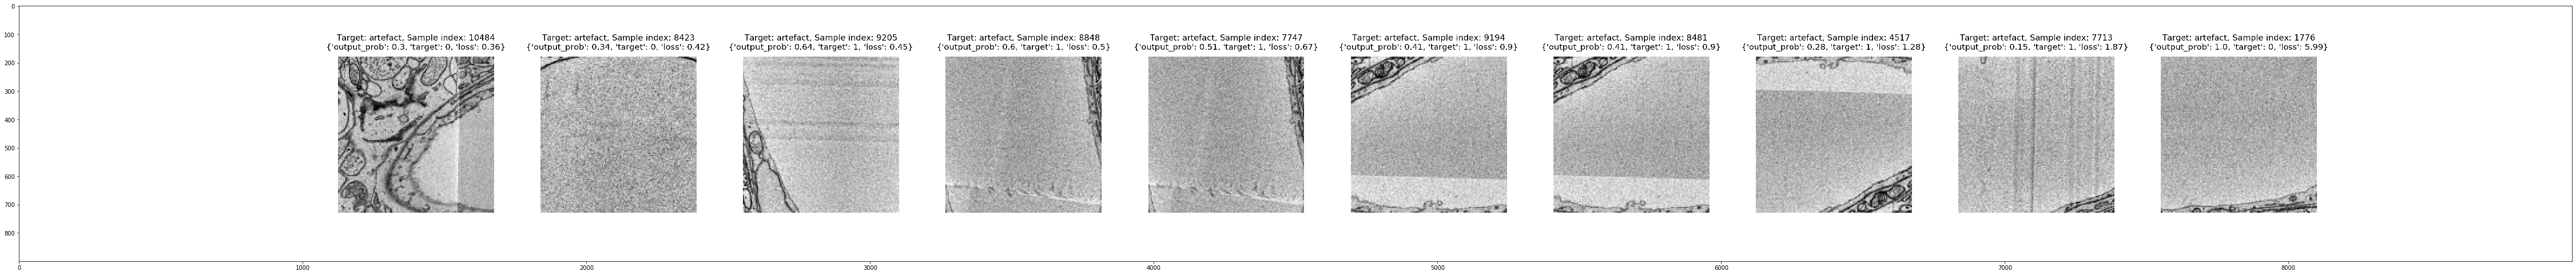

In [15]:
# Load the highest loss images 
img_path = os.path.join(epoch_dir, 'Examples_with_highest_loss_train.png')
img = plt.imread(img_path)
plt.figure(figsize=(80,80))
plt.imshow(img)

20087


In [19]:
# Load the dataset
json_names = ['dense_3X_10_10_2_um/original_merged_double_binary_v01.json', 
              '10x_test_bboxes/10X_9_9_1_um_double_binary_v01.json']
ds_names = [os.path.join(get_data_dir(), j_name) for j_name in json_names]
data_sources = WkwData.concat_datasources(ds_names)
print(len(data_sources))
# run_root = '/gaba/u/alik/code/genEM3/runs/training/classification_double_binary_v01'
input_shape = (140, 140, 1)
output_shape = (140, 140, 1)
cache_RAM = True
cache_HDD = False
batch_size = 1024
num_workers = 8


dataset = WkwData(
    input_shape=input_shape,
    target_shape=output_shape,
    data_sources=data_sources,
    cache_RAM=cache_RAM,
    cache_HDD=cache_HDD)

20087
Filling caches ... data source 1/20087 input
Filling caches ... data source 1/20087 target
Filling caches ... data source 2/20087 input
Filling caches ... data source 2/20087 target
Filling caches ... data source 3/20087 input
Filling caches ... data source 3/20087 target
Filling caches ... data source 4/20087 input
Filling caches ... data source 4/20087 target
Filling caches ... data source 5/20087 input
Filling caches ... data source 5/20087 target
Filling caches ... data source 6/20087 input
Filling caches ... data source 6/20087 target
Filling caches ... data source 7/20087 input
Filling caches ... data source 7/20087 target
Filling caches ... data source 8/20087 input
Filling caches ... data source 8/20087 target
Filling caches ... data source 9/20087 input
Filling caches ... data source 9/20087 target
Filling caches ... data source 10/20087 input
Filling caches ... data source 10/20087 target
Filling caches ... data source 11/20087 input
Filling caches ... data source 11/20

Filling caches ... data source 94/20087 target
Filling caches ... data source 95/20087 input
Filling caches ... data source 95/20087 target
Filling caches ... data source 96/20087 input
Filling caches ... data source 96/20087 target
Filling caches ... data source 97/20087 input
Filling caches ... data source 97/20087 target
Filling caches ... data source 98/20087 input
Filling caches ... data source 98/20087 target
Filling caches ... data source 99/20087 input
Filling caches ... data source 99/20087 target
Filling caches ... data source 100/20087 input
Filling caches ... data source 100/20087 target
Filling caches ... data source 101/20087 input
Filling caches ... data source 101/20087 target
Filling caches ... data source 102/20087 input
Filling caches ... data source 102/20087 target
Filling caches ... data source 103/20087 input
Filling caches ... data source 103/20087 target
Filling caches ... data source 104/20087 input
Filling caches ... data source 104/20087 target
Filling cache

Filling caches ... data source 181/20087 target
Filling caches ... data source 182/20087 input
Filling caches ... data source 182/20087 target
Filling caches ... data source 183/20087 input
Filling caches ... data source 183/20087 target
Filling caches ... data source 184/20087 input
Filling caches ... data source 184/20087 target
Filling caches ... data source 185/20087 input
Filling caches ... data source 185/20087 target
Filling caches ... data source 186/20087 input
Filling caches ... data source 186/20087 target
Filling caches ... data source 187/20087 input
Filling caches ... data source 187/20087 target
Filling caches ... data source 188/20087 input
Filling caches ... data source 188/20087 target
Filling caches ... data source 189/20087 input
Filling caches ... data source 189/20087 target
Filling caches ... data source 190/20087 input
Filling caches ... data source 190/20087 target
Filling caches ... data source 191/20087 input
Filling caches ... data source 191/20087 target
Fi

Filling caches ... data source 271/20087 target
Filling caches ... data source 272/20087 input
Filling caches ... data source 272/20087 target
Filling caches ... data source 273/20087 input
Filling caches ... data source 273/20087 target
Filling caches ... data source 274/20087 input
Filling caches ... data source 274/20087 target
Filling caches ... data source 275/20087 input
Filling caches ... data source 275/20087 target
Filling caches ... data source 276/20087 input
Filling caches ... data source 276/20087 target
Filling caches ... data source 277/20087 input
Filling caches ... data source 277/20087 target
Filling caches ... data source 278/20087 input
Filling caches ... data source 278/20087 target
Filling caches ... data source 279/20087 input
Filling caches ... data source 279/20087 target
Filling caches ... data source 280/20087 input
Filling caches ... data source 280/20087 target
Filling caches ... data source 281/20087 input
Filling caches ... data source 281/20087 target
Fi

Filling caches ... data source 371/20087 target
Filling caches ... data source 372/20087 input
Filling caches ... data source 372/20087 target
Filling caches ... data source 373/20087 input
Filling caches ... data source 373/20087 target
Filling caches ... data source 374/20087 input
Filling caches ... data source 374/20087 target
Filling caches ... data source 375/20087 input
Filling caches ... data source 375/20087 target
Filling caches ... data source 376/20087 input
Filling caches ... data source 376/20087 target
Filling caches ... data source 377/20087 input
Filling caches ... data source 377/20087 target
Filling caches ... data source 378/20087 input
Filling caches ... data source 378/20087 target
Filling caches ... data source 379/20087 input
Filling caches ... data source 379/20087 target
Filling caches ... data source 380/20087 input
Filling caches ... data source 380/20087 target
Filling caches ... data source 381/20087 input
Filling caches ... data source 381/20087 target
Fi

Filling caches ... data source 461/20087 target
Filling caches ... data source 462/20087 input
Filling caches ... data source 462/20087 target
Filling caches ... data source 463/20087 input
Filling caches ... data source 463/20087 target
Filling caches ... data source 464/20087 input
Filling caches ... data source 464/20087 target
Filling caches ... data source 465/20087 input
Filling caches ... data source 465/20087 target
Filling caches ... data source 466/20087 input
Filling caches ... data source 466/20087 target
Filling caches ... data source 467/20087 input
Filling caches ... data source 467/20087 target
Filling caches ... data source 468/20087 input
Filling caches ... data source 468/20087 target
Filling caches ... data source 469/20087 input
Filling caches ... data source 469/20087 target
Filling caches ... data source 470/20087 input
Filling caches ... data source 470/20087 target
Filling caches ... data source 471/20087 input
Filling caches ... data source 471/20087 target
Fi

Filling caches ... data source 552/20087 target
Filling caches ... data source 553/20087 input
Filling caches ... data source 553/20087 target
Filling caches ... data source 554/20087 input
Filling caches ... data source 554/20087 target
Filling caches ... data source 555/20087 input
Filling caches ... data source 555/20087 target
Filling caches ... data source 556/20087 input
Filling caches ... data source 556/20087 target
Filling caches ... data source 557/20087 input
Filling caches ... data source 557/20087 target
Filling caches ... data source 558/20087 input
Filling caches ... data source 558/20087 target
Filling caches ... data source 559/20087 input
Filling caches ... data source 559/20087 target
Filling caches ... data source 560/20087 input
Filling caches ... data source 560/20087 target
Filling caches ... data source 561/20087 input
Filling caches ... data source 561/20087 target
Filling caches ... data source 562/20087 input
Filling caches ... data source 562/20087 target
Fi

Filling caches ... data source 641/20087 target
Filling caches ... data source 642/20087 input
Filling caches ... data source 642/20087 target
Filling caches ... data source 643/20087 input
Filling caches ... data source 643/20087 target
Filling caches ... data source 644/20087 input
Filling caches ... data source 644/20087 target
Filling caches ... data source 645/20087 input
Filling caches ... data source 645/20087 target
Filling caches ... data source 646/20087 input
Filling caches ... data source 646/20087 target
Filling caches ... data source 647/20087 input
Filling caches ... data source 647/20087 target
Filling caches ... data source 648/20087 input
Filling caches ... data source 648/20087 target
Filling caches ... data source 649/20087 input
Filling caches ... data source 649/20087 target
Filling caches ... data source 650/20087 input
Filling caches ... data source 650/20087 target
Filling caches ... data source 651/20087 input
Filling caches ... data source 651/20087 target
Fi

Filling caches ... data source 730/20087 target
Filling caches ... data source 731/20087 input
Filling caches ... data source 731/20087 target
Filling caches ... data source 732/20087 input
Filling caches ... data source 732/20087 target
Filling caches ... data source 733/20087 input
Filling caches ... data source 733/20087 target
Filling caches ... data source 734/20087 input
Filling caches ... data source 734/20087 target
Filling caches ... data source 735/20087 input
Filling caches ... data source 735/20087 target
Filling caches ... data source 736/20087 input
Filling caches ... data source 736/20087 target
Filling caches ... data source 737/20087 input
Filling caches ... data source 737/20087 target
Filling caches ... data source 738/20087 input
Filling caches ... data source 738/20087 target
Filling caches ... data source 739/20087 input
Filling caches ... data source 739/20087 target
Filling caches ... data source 740/20087 input
Filling caches ... data source 740/20087 target
Fi

Filling caches ... data source 823/20087 input
Filling caches ... data source 823/20087 target
Filling caches ... data source 824/20087 input
Filling caches ... data source 824/20087 target
Filling caches ... data source 825/20087 input
Filling caches ... data source 825/20087 target
Filling caches ... data source 826/20087 input
Filling caches ... data source 826/20087 target
Filling caches ... data source 827/20087 input
Filling caches ... data source 827/20087 target
Filling caches ... data source 828/20087 input
Filling caches ... data source 828/20087 target
Filling caches ... data source 829/20087 input
Filling caches ... data source 829/20087 target
Filling caches ... data source 830/20087 input
Filling caches ... data source 830/20087 target
Filling caches ... data source 831/20087 input
Filling caches ... data source 831/20087 target
Filling caches ... data source 832/20087 input
Filling caches ... data source 832/20087 target
Filling caches ... data source 833/20087 input
Fil

Filling caches ... data source 911/20087 target
Filling caches ... data source 912/20087 input
Filling caches ... data source 912/20087 target
Filling caches ... data source 913/20087 input
Filling caches ... data source 913/20087 target
Filling caches ... data source 914/20087 input
Filling caches ... data source 914/20087 target
Filling caches ... data source 915/20087 input
Filling caches ... data source 915/20087 target
Filling caches ... data source 916/20087 input
Filling caches ... data source 916/20087 target
Filling caches ... data source 917/20087 input
Filling caches ... data source 917/20087 target
Filling caches ... data source 918/20087 input
Filling caches ... data source 918/20087 target
Filling caches ... data source 919/20087 input
Filling caches ... data source 919/20087 target
Filling caches ... data source 920/20087 input
Filling caches ... data source 920/20087 target
Filling caches ... data source 921/20087 input
Filling caches ... data source 921/20087 target
Fi

Filling caches ... data source 1013/20087 input
Filling caches ... data source 1013/20087 target
Filling caches ... data source 1014/20087 input
Filling caches ... data source 1014/20087 target
Filling caches ... data source 1015/20087 input
Filling caches ... data source 1015/20087 target
Filling caches ... data source 1016/20087 input
Filling caches ... data source 1016/20087 target
Filling caches ... data source 1017/20087 input
Filling caches ... data source 1017/20087 target
Filling caches ... data source 1018/20087 input
Filling caches ... data source 1018/20087 target
Filling caches ... data source 1019/20087 input
Filling caches ... data source 1019/20087 target
Filling caches ... data source 1020/20087 input
Filling caches ... data source 1020/20087 target
Filling caches ... data source 1021/20087 input
Filling caches ... data source 1021/20087 target
Filling caches ... data source 1022/20087 input
Filling caches ... data source 1022/20087 target
Filling caches ... data source

Filling caches ... data source 1101/20087 target
Filling caches ... data source 1102/20087 input
Filling caches ... data source 1102/20087 target
Filling caches ... data source 1103/20087 input
Filling caches ... data source 1103/20087 target
Filling caches ... data source 1104/20087 input
Filling caches ... data source 1104/20087 target
Filling caches ... data source 1105/20087 input
Filling caches ... data source 1105/20087 target
Filling caches ... data source 1106/20087 input
Filling caches ... data source 1106/20087 target
Filling caches ... data source 1107/20087 input
Filling caches ... data source 1107/20087 target
Filling caches ... data source 1108/20087 input
Filling caches ... data source 1108/20087 target
Filling caches ... data source 1109/20087 input
Filling caches ... data source 1109/20087 target
Filling caches ... data source 1110/20087 input
Filling caches ... data source 1110/20087 target
Filling caches ... data source 1111/20087 input
Filling caches ... data source

Filling caches ... data source 1191/20087 target
Filling caches ... data source 1192/20087 input
Filling caches ... data source 1192/20087 target
Filling caches ... data source 1193/20087 input
Filling caches ... data source 1193/20087 target
Filling caches ... data source 1194/20087 input
Filling caches ... data source 1194/20087 target
Filling caches ... data source 1195/20087 input
Filling caches ... data source 1195/20087 target
Filling caches ... data source 1196/20087 input
Filling caches ... data source 1196/20087 target
Filling caches ... data source 1197/20087 input
Filling caches ... data source 1197/20087 target
Filling caches ... data source 1198/20087 input
Filling caches ... data source 1198/20087 target
Filling caches ... data source 1199/20087 input
Filling caches ... data source 1199/20087 target
Filling caches ... data source 1200/20087 input
Filling caches ... data source 1200/20087 target
Filling caches ... data source 1201/20087 input
Filling caches ... data source

Filling caches ... data source 1291/20087 target
Filling caches ... data source 1292/20087 input
Filling caches ... data source 1292/20087 target
Filling caches ... data source 1293/20087 input
Filling caches ... data source 1293/20087 target
Filling caches ... data source 1294/20087 input
Filling caches ... data source 1294/20087 target
Filling caches ... data source 1295/20087 input
Filling caches ... data source 1295/20087 target
Filling caches ... data source 1296/20087 input
Filling caches ... data source 1296/20087 target
Filling caches ... data source 1297/20087 input
Filling caches ... data source 1297/20087 target
Filling caches ... data source 1298/20087 input
Filling caches ... data source 1298/20087 target
Filling caches ... data source 1299/20087 input
Filling caches ... data source 1299/20087 target
Filling caches ... data source 1300/20087 input
Filling caches ... data source 1300/20087 target
Filling caches ... data source 1301/20087 input
Filling caches ... data source

Filling caches ... data source 1377/20087 target
Filling caches ... data source 1378/20087 input
Filling caches ... data source 1378/20087 target
Filling caches ... data source 1379/20087 input
Filling caches ... data source 1379/20087 target
Filling caches ... data source 1380/20087 input
Filling caches ... data source 1380/20087 target
Filling caches ... data source 1381/20087 input
Filling caches ... data source 1381/20087 target
Filling caches ... data source 1382/20087 input
Filling caches ... data source 1382/20087 target
Filling caches ... data source 1383/20087 input
Filling caches ... data source 1383/20087 target
Filling caches ... data source 1384/20087 input
Filling caches ... data source 1384/20087 target
Filling caches ... data source 1385/20087 input
Filling caches ... data source 1385/20087 target
Filling caches ... data source 1386/20087 input
Filling caches ... data source 1386/20087 target
Filling caches ... data source 1387/20087 input
Filling caches ... data source

Filling caches ... data source 1467/20087 target
Filling caches ... data source 1468/20087 input
Filling caches ... data source 1468/20087 target
Filling caches ... data source 1469/20087 input
Filling caches ... data source 1469/20087 target
Filling caches ... data source 1470/20087 input
Filling caches ... data source 1470/20087 target
Filling caches ... data source 1471/20087 input
Filling caches ... data source 1471/20087 target
Filling caches ... data source 1472/20087 input
Filling caches ... data source 1472/20087 target
Filling caches ... data source 1473/20087 input
Filling caches ... data source 1473/20087 target
Filling caches ... data source 1474/20087 input
Filling caches ... data source 1474/20087 target
Filling caches ... data source 1475/20087 input
Filling caches ... data source 1475/20087 target
Filling caches ... data source 1476/20087 input
Filling caches ... data source 1476/20087 target
Filling caches ... data source 1477/20087 input
Filling caches ... data source

Filling caches ... data source 1552/20087 target
Filling caches ... data source 1553/20087 input
Filling caches ... data source 1553/20087 target
Filling caches ... data source 1554/20087 input
Filling caches ... data source 1554/20087 target
Filling caches ... data source 1555/20087 input
Filling caches ... data source 1555/20087 target
Filling caches ... data source 1556/20087 input
Filling caches ... data source 1556/20087 target
Filling caches ... data source 1557/20087 input
Filling caches ... data source 1557/20087 target
Filling caches ... data source 1558/20087 input
Filling caches ... data source 1558/20087 target
Filling caches ... data source 1559/20087 input
Filling caches ... data source 1559/20087 target
Filling caches ... data source 1560/20087 input
Filling caches ... data source 1560/20087 target
Filling caches ... data source 1561/20087 input
Filling caches ... data source 1561/20087 target
Filling caches ... data source 1562/20087 input
Filling caches ... data source

Filling caches ... data source 1646/20087 target
Filling caches ... data source 1647/20087 input
Filling caches ... data source 1647/20087 target
Filling caches ... data source 1648/20087 input
Filling caches ... data source 1648/20087 target
Filling caches ... data source 1649/20087 input
Filling caches ... data source 1649/20087 target
Filling caches ... data source 1650/20087 input
Filling caches ... data source 1650/20087 target
Filling caches ... data source 1651/20087 input
Filling caches ... data source 1651/20087 target
Filling caches ... data source 1652/20087 input
Filling caches ... data source 1652/20087 target
Filling caches ... data source 1653/20087 input
Filling caches ... data source 1653/20087 target
Filling caches ... data source 1654/20087 input
Filling caches ... data source 1654/20087 target
Filling caches ... data source 1655/20087 input
Filling caches ... data source 1655/20087 target
Filling caches ... data source 1656/20087 input
Filling caches ... data source

Filling caches ... data source 1731/20087 target
Filling caches ... data source 1732/20087 input
Filling caches ... data source 1732/20087 target
Filling caches ... data source 1733/20087 input
Filling caches ... data source 1733/20087 target
Filling caches ... data source 1734/20087 input
Filling caches ... data source 1734/20087 target
Filling caches ... data source 1735/20087 input
Filling caches ... data source 1735/20087 target
Filling caches ... data source 1736/20087 input
Filling caches ... data source 1736/20087 target
Filling caches ... data source 1737/20087 input
Filling caches ... data source 1737/20087 target
Filling caches ... data source 1738/20087 input
Filling caches ... data source 1738/20087 target
Filling caches ... data source 1739/20087 input
Filling caches ... data source 1739/20087 target
Filling caches ... data source 1740/20087 input
Filling caches ... data source 1740/20087 target
Filling caches ... data source 1741/20087 input
Filling caches ... data source

Filling caches ... data source 1829/20087 target
Filling caches ... data source 1830/20087 input
Filling caches ... data source 1830/20087 target
Filling caches ... data source 1831/20087 input
Filling caches ... data source 1831/20087 target
Filling caches ... data source 1832/20087 input
Filling caches ... data source 1832/20087 target
Filling caches ... data source 1833/20087 input
Filling caches ... data source 1833/20087 target
Filling caches ... data source 1834/20087 input
Filling caches ... data source 1834/20087 target
Filling caches ... data source 1835/20087 input
Filling caches ... data source 1835/20087 target
Filling caches ... data source 1836/20087 input
Filling caches ... data source 1836/20087 target
Filling caches ... data source 1837/20087 input
Filling caches ... data source 1837/20087 target
Filling caches ... data source 1838/20087 input
Filling caches ... data source 1838/20087 target
Filling caches ... data source 1839/20087 input
Filling caches ... data source

Filling caches ... data source 1916/20087 target
Filling caches ... data source 1917/20087 input
Filling caches ... data source 1917/20087 target
Filling caches ... data source 1918/20087 input
Filling caches ... data source 1918/20087 target
Filling caches ... data source 1919/20087 input
Filling caches ... data source 1919/20087 target
Filling caches ... data source 1920/20087 input
Filling caches ... data source 1920/20087 target
Filling caches ... data source 1921/20087 input
Filling caches ... data source 1921/20087 target
Filling caches ... data source 1922/20087 input
Filling caches ... data source 1922/20087 target
Filling caches ... data source 1923/20087 input
Filling caches ... data source 1923/20087 target
Filling caches ... data source 1924/20087 input
Filling caches ... data source 1924/20087 target
Filling caches ... data source 1925/20087 input
Filling caches ... data source 1925/20087 target
Filling caches ... data source 1926/20087 input
Filling caches ... data source

Filling caches ... data source 2001/20087 target
Filling caches ... data source 2002/20087 input
Filling caches ... data source 2002/20087 target
Filling caches ... data source 2003/20087 input
Filling caches ... data source 2003/20087 target
Filling caches ... data source 2004/20087 input
Filling caches ... data source 2004/20087 target
Filling caches ... data source 2005/20087 input
Filling caches ... data source 2005/20087 target
Filling caches ... data source 2006/20087 input
Filling caches ... data source 2006/20087 target
Filling caches ... data source 2007/20087 input
Filling caches ... data source 2007/20087 target
Filling caches ... data source 2008/20087 input
Filling caches ... data source 2008/20087 target
Filling caches ... data source 2009/20087 input
Filling caches ... data source 2009/20087 target
Filling caches ... data source 2010/20087 input
Filling caches ... data source 2010/20087 target
Filling caches ... data source 2011/20087 input
Filling caches ... data source

Filling caches ... data source 2090/20087 target
Filling caches ... data source 2091/20087 input
Filling caches ... data source 2091/20087 target
Filling caches ... data source 2092/20087 input
Filling caches ... data source 2092/20087 target
Filling caches ... data source 2093/20087 input
Filling caches ... data source 2093/20087 target
Filling caches ... data source 2094/20087 input
Filling caches ... data source 2094/20087 target
Filling caches ... data source 2095/20087 input
Filling caches ... data source 2095/20087 target
Filling caches ... data source 2096/20087 input
Filling caches ... data source 2096/20087 target
Filling caches ... data source 2097/20087 input
Filling caches ... data source 2097/20087 target
Filling caches ... data source 2098/20087 input
Filling caches ... data source 2098/20087 target
Filling caches ... data source 2099/20087 input
Filling caches ... data source 2099/20087 target
Filling caches ... data source 2100/20087 input
Filling caches ... data source

Filling caches ... data source 2176/20087 target
Filling caches ... data source 2177/20087 input
Filling caches ... data source 2177/20087 target
Filling caches ... data source 2178/20087 input
Filling caches ... data source 2178/20087 target
Filling caches ... data source 2179/20087 input
Filling caches ... data source 2179/20087 target
Filling caches ... data source 2180/20087 input
Filling caches ... data source 2180/20087 target
Filling caches ... data source 2181/20087 input
Filling caches ... data source 2181/20087 target
Filling caches ... data source 2182/20087 input
Filling caches ... data source 2182/20087 target
Filling caches ... data source 2183/20087 input
Filling caches ... data source 2183/20087 target
Filling caches ... data source 2184/20087 input
Filling caches ... data source 2184/20087 target
Filling caches ... data source 2185/20087 input
Filling caches ... data source 2185/20087 target
Filling caches ... data source 2186/20087 input
Filling caches ... data source

Filling caches ... data source 2281/20087 target
Filling caches ... data source 2282/20087 input
Filling caches ... data source 2282/20087 target
Filling caches ... data source 2283/20087 input
Filling caches ... data source 2283/20087 target
Filling caches ... data source 2284/20087 input
Filling caches ... data source 2284/20087 target
Filling caches ... data source 2285/20087 input
Filling caches ... data source 2285/20087 target
Filling caches ... data source 2286/20087 input
Filling caches ... data source 2286/20087 target
Filling caches ... data source 2287/20087 input
Filling caches ... data source 2287/20087 target
Filling caches ... data source 2288/20087 input
Filling caches ... data source 2288/20087 target
Filling caches ... data source 2289/20087 input
Filling caches ... data source 2289/20087 target
Filling caches ... data source 2290/20087 input
Filling caches ... data source 2290/20087 target
Filling caches ... data source 2291/20087 input
Filling caches ... data source

Filling caches ... data source 2369/20087 target
Filling caches ... data source 2370/20087 input
Filling caches ... data source 2370/20087 target
Filling caches ... data source 2371/20087 input
Filling caches ... data source 2371/20087 target
Filling caches ... data source 2372/20087 input
Filling caches ... data source 2372/20087 target
Filling caches ... data source 2373/20087 input
Filling caches ... data source 2373/20087 target
Filling caches ... data source 2374/20087 input
Filling caches ... data source 2374/20087 target
Filling caches ... data source 2375/20087 input
Filling caches ... data source 2375/20087 target
Filling caches ... data source 2376/20087 input
Filling caches ... data source 2376/20087 target
Filling caches ... data source 2377/20087 input
Filling caches ... data source 2377/20087 target
Filling caches ... data source 2378/20087 input
Filling caches ... data source 2378/20087 target
Filling caches ... data source 2379/20087 input
Filling caches ... data source

Filling caches ... data source 2464/20087 target
Filling caches ... data source 2465/20087 input
Filling caches ... data source 2465/20087 target
Filling caches ... data source 2466/20087 input
Filling caches ... data source 2466/20087 target
Filling caches ... data source 2467/20087 input
Filling caches ... data source 2467/20087 target
Filling caches ... data source 2468/20087 input
Filling caches ... data source 2468/20087 target
Filling caches ... data source 2469/20087 input
Filling caches ... data source 2469/20087 target
Filling caches ... data source 2470/20087 input
Filling caches ... data source 2470/20087 target
Filling caches ... data source 2471/20087 input
Filling caches ... data source 2471/20087 target
Filling caches ... data source 2472/20087 input
Filling caches ... data source 2472/20087 target
Filling caches ... data source 2473/20087 input
Filling caches ... data source 2473/20087 target
Filling caches ... data source 2474/20087 input
Filling caches ... data source

Filling caches ... data source 2551/20087 target
Filling caches ... data source 2552/20087 input
Filling caches ... data source 2552/20087 target
Filling caches ... data source 2553/20087 input
Filling caches ... data source 2553/20087 target
Filling caches ... data source 2554/20087 input
Filling caches ... data source 2554/20087 target
Filling caches ... data source 2555/20087 input
Filling caches ... data source 2555/20087 target
Filling caches ... data source 2556/20087 input
Filling caches ... data source 2556/20087 target
Filling caches ... data source 2557/20087 input
Filling caches ... data source 2557/20087 target
Filling caches ... data source 2558/20087 input
Filling caches ... data source 2558/20087 target
Filling caches ... data source 2559/20087 input
Filling caches ... data source 2559/20087 target
Filling caches ... data source 2560/20087 input
Filling caches ... data source 2560/20087 target
Filling caches ... data source 2561/20087 input
Filling caches ... data source

Filling caches ... data source 2636/20087 target
Filling caches ... data source 2637/20087 input
Filling caches ... data source 2637/20087 target
Filling caches ... data source 2638/20087 input
Filling caches ... data source 2638/20087 target
Filling caches ... data source 2639/20087 input
Filling caches ... data source 2639/20087 target
Filling caches ... data source 2640/20087 input
Filling caches ... data source 2640/20087 target
Filling caches ... data source 2641/20087 input
Filling caches ... data source 2641/20087 target
Filling caches ... data source 2642/20087 input
Filling caches ... data source 2642/20087 target
Filling caches ... data source 2643/20087 input
Filling caches ... data source 2643/20087 target
Filling caches ... data source 2644/20087 input
Filling caches ... data source 2644/20087 target
Filling caches ... data source 2645/20087 input
Filling caches ... data source 2645/20087 target
Filling caches ... data source 2646/20087 input
Filling caches ... data source

Filling caches ... data source 2736/20087 target
Filling caches ... data source 2737/20087 input
Filling caches ... data source 2737/20087 target
Filling caches ... data source 2738/20087 input
Filling caches ... data source 2738/20087 target
Filling caches ... data source 2739/20087 input
Filling caches ... data source 2739/20087 target
Filling caches ... data source 2740/20087 input
Filling caches ... data source 2740/20087 target
Filling caches ... data source 2741/20087 input
Filling caches ... data source 2741/20087 target
Filling caches ... data source 2742/20087 input
Filling caches ... data source 2742/20087 target
Filling caches ... data source 2743/20087 input
Filling caches ... data source 2743/20087 target
Filling caches ... data source 2744/20087 input
Filling caches ... data source 2744/20087 target
Filling caches ... data source 2745/20087 input
Filling caches ... data source 2745/20087 target
Filling caches ... data source 2746/20087 input
Filling caches ... data source

Filling caches ... data source 2831/20087 target
Filling caches ... data source 2832/20087 input
Filling caches ... data source 2832/20087 target
Filling caches ... data source 2833/20087 input
Filling caches ... data source 2833/20087 target
Filling caches ... data source 2834/20087 input
Filling caches ... data source 2834/20087 target
Filling caches ... data source 2835/20087 input
Filling caches ... data source 2835/20087 target
Filling caches ... data source 2836/20087 input
Filling caches ... data source 2836/20087 target
Filling caches ... data source 2837/20087 input
Filling caches ... data source 2837/20087 target
Filling caches ... data source 2838/20087 input
Filling caches ... data source 2838/20087 target
Filling caches ... data source 2839/20087 input
Filling caches ... data source 2839/20087 target
Filling caches ... data source 2840/20087 input
Filling caches ... data source 2840/20087 target
Filling caches ... data source 2841/20087 input
Filling caches ... data source

Filling caches ... data source 2916/20087 target
Filling caches ... data source 2917/20087 input
Filling caches ... data source 2917/20087 target
Filling caches ... data source 2918/20087 input
Filling caches ... data source 2918/20087 target
Filling caches ... data source 2919/20087 input
Filling caches ... data source 2919/20087 target
Filling caches ... data source 2920/20087 input
Filling caches ... data source 2920/20087 target
Filling caches ... data source 2921/20087 input
Filling caches ... data source 2921/20087 target
Filling caches ... data source 2922/20087 input
Filling caches ... data source 2922/20087 target
Filling caches ... data source 2923/20087 input
Filling caches ... data source 2923/20087 target
Filling caches ... data source 2924/20087 input
Filling caches ... data source 2924/20087 target
Filling caches ... data source 2925/20087 input
Filling caches ... data source 2925/20087 target
Filling caches ... data source 2926/20087 input
Filling caches ... data source

Filling caches ... data source 3001/20087 target
Filling caches ... data source 3002/20087 input
Filling caches ... data source 3002/20087 target
Filling caches ... data source 3003/20087 input
Filling caches ... data source 3003/20087 target
Filling caches ... data source 3004/20087 input
Filling caches ... data source 3004/20087 target
Filling caches ... data source 3005/20087 input
Filling caches ... data source 3005/20087 target
Filling caches ... data source 3006/20087 input
Filling caches ... data source 3006/20087 target
Filling caches ... data source 3007/20087 input
Filling caches ... data source 3007/20087 target
Filling caches ... data source 3008/20087 input
Filling caches ... data source 3008/20087 target
Filling caches ... data source 3009/20087 input
Filling caches ... data source 3009/20087 target
Filling caches ... data source 3010/20087 input
Filling caches ... data source 3010/20087 target
Filling caches ... data source 3011/20087 input
Filling caches ... data source

Filling caches ... data source 3101/20087 target
Filling caches ... data source 3102/20087 input
Filling caches ... data source 3102/20087 target
Filling caches ... data source 3103/20087 input
Filling caches ... data source 3103/20087 target
Filling caches ... data source 3104/20087 input
Filling caches ... data source 3104/20087 target
Filling caches ... data source 3105/20087 input
Filling caches ... data source 3105/20087 target
Filling caches ... data source 3106/20087 input
Filling caches ... data source 3106/20087 target
Filling caches ... data source 3107/20087 input
Filling caches ... data source 3107/20087 target
Filling caches ... data source 3108/20087 input
Filling caches ... data source 3108/20087 target
Filling caches ... data source 3109/20087 input
Filling caches ... data source 3109/20087 target
Filling caches ... data source 3110/20087 input
Filling caches ... data source 3110/20087 target
Filling caches ... data source 3111/20087 input
Filling caches ... data source

Filling caches ... data source 3201/20087 target
Filling caches ... data source 3202/20087 input
Filling caches ... data source 3202/20087 target
Filling caches ... data source 3203/20087 input
Filling caches ... data source 3203/20087 target
Filling caches ... data source 3204/20087 input
Filling caches ... data source 3204/20087 target
Filling caches ... data source 3205/20087 input
Filling caches ... data source 3205/20087 target
Filling caches ... data source 3206/20087 input
Filling caches ... data source 3206/20087 target
Filling caches ... data source 3207/20087 input
Filling caches ... data source 3207/20087 target
Filling caches ... data source 3208/20087 input
Filling caches ... data source 3208/20087 target
Filling caches ... data source 3209/20087 input
Filling caches ... data source 3209/20087 target
Filling caches ... data source 3210/20087 input
Filling caches ... data source 3210/20087 target
Filling caches ... data source 3211/20087 input
Filling caches ... data source

Filling caches ... data source 3330/20087 target
Filling caches ... data source 3331/20087 input
Filling caches ... data source 3331/20087 target
Filling caches ... data source 3332/20087 input
Filling caches ... data source 3332/20087 target
Filling caches ... data source 3333/20087 input
Filling caches ... data source 3333/20087 target
Filling caches ... data source 3334/20087 input
Filling caches ... data source 3334/20087 target
Filling caches ... data source 3335/20087 input
Filling caches ... data source 3335/20087 target
Filling caches ... data source 3336/20087 input
Filling caches ... data source 3336/20087 target
Filling caches ... data source 3337/20087 input
Filling caches ... data source 3337/20087 target
Filling caches ... data source 3338/20087 input
Filling caches ... data source 3338/20087 target
Filling caches ... data source 3339/20087 input
Filling caches ... data source 3339/20087 target
Filling caches ... data source 3340/20087 input
Filling caches ... data source

Filling caches ... data source 3428/20087 target
Filling caches ... data source 3429/20087 input
Filling caches ... data source 3429/20087 target
Filling caches ... data source 3430/20087 input
Filling caches ... data source 3430/20087 target
Filling caches ... data source 3431/20087 input
Filling caches ... data source 3431/20087 target
Filling caches ... data source 3432/20087 input
Filling caches ... data source 3432/20087 target
Filling caches ... data source 3433/20087 input
Filling caches ... data source 3433/20087 target
Filling caches ... data source 3434/20087 input
Filling caches ... data source 3434/20087 target
Filling caches ... data source 3435/20087 input
Filling caches ... data source 3435/20087 target
Filling caches ... data source 3436/20087 input
Filling caches ... data source 3436/20087 target
Filling caches ... data source 3437/20087 input
Filling caches ... data source 3437/20087 target
Filling caches ... data source 3438/20087 input
Filling caches ... data source

Filling caches ... data source 3551/20087 target
Filling caches ... data source 3552/20087 input
Filling caches ... data source 3552/20087 target
Filling caches ... data source 3553/20087 input
Filling caches ... data source 3553/20087 target
Filling caches ... data source 3554/20087 input
Filling caches ... data source 3554/20087 target
Filling caches ... data source 3555/20087 input
Filling caches ... data source 3555/20087 target
Filling caches ... data source 3556/20087 input
Filling caches ... data source 3556/20087 target
Filling caches ... data source 3557/20087 input
Filling caches ... data source 3557/20087 target
Filling caches ... data source 3558/20087 input
Filling caches ... data source 3558/20087 target
Filling caches ... data source 3559/20087 input
Filling caches ... data source 3559/20087 target
Filling caches ... data source 3560/20087 input
Filling caches ... data source 3560/20087 target
Filling caches ... data source 3561/20087 input
Filling caches ... data source

Filling caches ... data source 3651/20087 target
Filling caches ... data source 3652/20087 input
Filling caches ... data source 3652/20087 target
Filling caches ... data source 3653/20087 input
Filling caches ... data source 3653/20087 target
Filling caches ... data source 3654/20087 input
Filling caches ... data source 3654/20087 target
Filling caches ... data source 3655/20087 input
Filling caches ... data source 3655/20087 target
Filling caches ... data source 3656/20087 input
Filling caches ... data source 3656/20087 target
Filling caches ... data source 3657/20087 input
Filling caches ... data source 3657/20087 target
Filling caches ... data source 3658/20087 input
Filling caches ... data source 3658/20087 target
Filling caches ... data source 3659/20087 input
Filling caches ... data source 3659/20087 target
Filling caches ... data source 3660/20087 input
Filling caches ... data source 3660/20087 target
Filling caches ... data source 3661/20087 input
Filling caches ... data source

Filling caches ... data source 3806/20087 input
Filling caches ... data source 3806/20087 target
Filling caches ... data source 3807/20087 input
Filling caches ... data source 3807/20087 target
Filling caches ... data source 3808/20087 input
Filling caches ... data source 3808/20087 target
Filling caches ... data source 3809/20087 input
Filling caches ... data source 3809/20087 target
Filling caches ... data source 3810/20087 input
Filling caches ... data source 3810/20087 target
Filling caches ... data source 3811/20087 input
Filling caches ... data source 3811/20087 target
Filling caches ... data source 3812/20087 input
Filling caches ... data source 3812/20087 target
Filling caches ... data source 3813/20087 input
Filling caches ... data source 3813/20087 target
Filling caches ... data source 3814/20087 input
Filling caches ... data source 3814/20087 target
Filling caches ... data source 3815/20087 input
Filling caches ... data source 3815/20087 target
Filling caches ... data source

Filling caches ... data source 3998/20087 input
Filling caches ... data source 3998/20087 target
Filling caches ... data source 3999/20087 input
Filling caches ... data source 3999/20087 target
Filling caches ... data source 4000/20087 input
Filling caches ... data source 4000/20087 target
Filling caches ... data source 4001/20087 input
Filling caches ... data source 4001/20087 target
Filling caches ... data source 4002/20087 input
Filling caches ... data source 4002/20087 target
Filling caches ... data source 4003/20087 input
Filling caches ... data source 4003/20087 target
Filling caches ... data source 4004/20087 input
Filling caches ... data source 4004/20087 target
Filling caches ... data source 4005/20087 input
Filling caches ... data source 4005/20087 target
Filling caches ... data source 4006/20087 input
Filling caches ... data source 4006/20087 target
Filling caches ... data source 4007/20087 input
Filling caches ... data source 4007/20087 target
Filling caches ... data source

Filling caches ... data source 4094/20087 target
Filling caches ... data source 4095/20087 input
Filling caches ... data source 4095/20087 target
Filling caches ... data source 4096/20087 input
Filling caches ... data source 4096/20087 target
Filling caches ... data source 4097/20087 input
Filling caches ... data source 4097/20087 target
Filling caches ... data source 4098/20087 input
Filling caches ... data source 4098/20087 target
Filling caches ... data source 4099/20087 input
Filling caches ... data source 4099/20087 target
Filling caches ... data source 4100/20087 input
Filling caches ... data source 4100/20087 target
Filling caches ... data source 4101/20087 input
Filling caches ... data source 4101/20087 target
Filling caches ... data source 4102/20087 input
Filling caches ... data source 4102/20087 target
Filling caches ... data source 4103/20087 input
Filling caches ... data source 4103/20087 target
Filling caches ... data source 4104/20087 input
Filling caches ... data source

Filling caches ... data source 4199/20087 target
Filling caches ... data source 4200/20087 input
Filling caches ... data source 4200/20087 target
Filling caches ... data source 4201/20087 input
Filling caches ... data source 4201/20087 target
Filling caches ... data source 4202/20087 input
Filling caches ... data source 4202/20087 target
Filling caches ... data source 4203/20087 input
Filling caches ... data source 4203/20087 target
Filling caches ... data source 4204/20087 input
Filling caches ... data source 4204/20087 target
Filling caches ... data source 4205/20087 input
Filling caches ... data source 4205/20087 target
Filling caches ... data source 4206/20087 input
Filling caches ... data source 4206/20087 target
Filling caches ... data source 4207/20087 input
Filling caches ... data source 4207/20087 target
Filling caches ... data source 4208/20087 input
Filling caches ... data source 4208/20087 target
Filling caches ... data source 4209/20087 input
Filling caches ... data source

Filling caches ... data source 4478/20087 target
Filling caches ... data source 4479/20087 input
Filling caches ... data source 4479/20087 target
Filling caches ... data source 4480/20087 input
Filling caches ... data source 4480/20087 target
Filling caches ... data source 4481/20087 input
Filling caches ... data source 4481/20087 target
Filling caches ... data source 4482/20087 input
Filling caches ... data source 4482/20087 target
Filling caches ... data source 4483/20087 input
Filling caches ... data source 4483/20087 target
Filling caches ... data source 4484/20087 input
Filling caches ... data source 4484/20087 target
Filling caches ... data source 4485/20087 input
Filling caches ... data source 4485/20087 target
Filling caches ... data source 4486/20087 input
Filling caches ... data source 4486/20087 target
Filling caches ... data source 4487/20087 input
Filling caches ... data source 4487/20087 target
Filling caches ... data source 4488/20087 input
Filling caches ... data source

Filling caches ... data source 4651/20087 target
Filling caches ... data source 4652/20087 input
Filling caches ... data source 4652/20087 target
Filling caches ... data source 4653/20087 input
Filling caches ... data source 4653/20087 target
Filling caches ... data source 4654/20087 input
Filling caches ... data source 4654/20087 target
Filling caches ... data source 4655/20087 input
Filling caches ... data source 4655/20087 target
Filling caches ... data source 4656/20087 input
Filling caches ... data source 4656/20087 target
Filling caches ... data source 4657/20087 input
Filling caches ... data source 4657/20087 target
Filling caches ... data source 4658/20087 input
Filling caches ... data source 4658/20087 target
Filling caches ... data source 4659/20087 input
Filling caches ... data source 4659/20087 target
Filling caches ... data source 4660/20087 input
Filling caches ... data source 4660/20087 target
Filling caches ... data source 4661/20087 input
Filling caches ... data source

Filling caches ... data source 4737/20087 target
Filling caches ... data source 4738/20087 input
Filling caches ... data source 4738/20087 target
Filling caches ... data source 4739/20087 input
Filling caches ... data source 4739/20087 target
Filling caches ... data source 4740/20087 input
Filling caches ... data source 4740/20087 target
Filling caches ... data source 4741/20087 input
Filling caches ... data source 4741/20087 target
Filling caches ... data source 4742/20087 input
Filling caches ... data source 4742/20087 target
Filling caches ... data source 4743/20087 input
Filling caches ... data source 4743/20087 target
Filling caches ... data source 4744/20087 input
Filling caches ... data source 4744/20087 target
Filling caches ... data source 4745/20087 input
Filling caches ... data source 4745/20087 target
Filling caches ... data source 4746/20087 input
Filling caches ... data source 4746/20087 target
Filling caches ... data source 4747/20087 input
Filling caches ... data source

Filling caches ... data source 4849/20087 target
Filling caches ... data source 4850/20087 input
Filling caches ... data source 4850/20087 target
Filling caches ... data source 4851/20087 input
Filling caches ... data source 4851/20087 target
Filling caches ... data source 4852/20087 input
Filling caches ... data source 4852/20087 target
Filling caches ... data source 4853/20087 input
Filling caches ... data source 4853/20087 target
Filling caches ... data source 4854/20087 input
Filling caches ... data source 4854/20087 target
Filling caches ... data source 4855/20087 input
Filling caches ... data source 4855/20087 target
Filling caches ... data source 4856/20087 input
Filling caches ... data source 4856/20087 target
Filling caches ... data source 4857/20087 input
Filling caches ... data source 4857/20087 target
Filling caches ... data source 4858/20087 input
Filling caches ... data source 4858/20087 target
Filling caches ... data source 4859/20087 input
Filling caches ... data source

Filling caches ... data source 4937/20087 target
Filling caches ... data source 4938/20087 input
Filling caches ... data source 4938/20087 target
Filling caches ... data source 4939/20087 input
Filling caches ... data source 4939/20087 target
Filling caches ... data source 4940/20087 input
Filling caches ... data source 4940/20087 target
Filling caches ... data source 4941/20087 input
Filling caches ... data source 4941/20087 target
Filling caches ... data source 4942/20087 input
Filling caches ... data source 4942/20087 target
Filling caches ... data source 4943/20087 input
Filling caches ... data source 4943/20087 target
Filling caches ... data source 4944/20087 input
Filling caches ... data source 4944/20087 target
Filling caches ... data source 4945/20087 input
Filling caches ... data source 4945/20087 target
Filling caches ... data source 4946/20087 input
Filling caches ... data source 4946/20087 target
Filling caches ... data source 4947/20087 input
Filling caches ... data source

Filling caches ... data source 5048/20087 target
Filling caches ... data source 5049/20087 input
Filling caches ... data source 5049/20087 target
Filling caches ... data source 5050/20087 input
Filling caches ... data source 5050/20087 target
Filling caches ... data source 5051/20087 input
Filling caches ... data source 5051/20087 target
Filling caches ... data source 5052/20087 input
Filling caches ... data source 5052/20087 target
Filling caches ... data source 5053/20087 input
Filling caches ... data source 5053/20087 target
Filling caches ... data source 5054/20087 input
Filling caches ... data source 5054/20087 target
Filling caches ... data source 5055/20087 input
Filling caches ... data source 5055/20087 target
Filling caches ... data source 5056/20087 input
Filling caches ... data source 5056/20087 target
Filling caches ... data source 5057/20087 input
Filling caches ... data source 5057/20087 target
Filling caches ... data source 5058/20087 input
Filling caches ... data source

Filling caches ... data source 5217/20087 target
Filling caches ... data source 5218/20087 input
Filling caches ... data source 5218/20087 target
Filling caches ... data source 5219/20087 input
Filling caches ... data source 5219/20087 target
Filling caches ... data source 5220/20087 input
Filling caches ... data source 5220/20087 target
Filling caches ... data source 5221/20087 input
Filling caches ... data source 5221/20087 target
Filling caches ... data source 5222/20087 input
Filling caches ... data source 5222/20087 target
Filling caches ... data source 5223/20087 input
Filling caches ... data source 5223/20087 target
Filling caches ... data source 5224/20087 input
Filling caches ... data source 5224/20087 target
Filling caches ... data source 5225/20087 input
Filling caches ... data source 5225/20087 target
Filling caches ... data source 5226/20087 input
Filling caches ... data source 5226/20087 target
Filling caches ... data source 5227/20087 input
Filling caches ... data source

Filling caches ... data source 5304/20087 input
Filling caches ... data source 5304/20087 target
Filling caches ... data source 5305/20087 input
Filling caches ... data source 5305/20087 target
Filling caches ... data source 5306/20087 input
Filling caches ... data source 5306/20087 target
Filling caches ... data source 5307/20087 input
Filling caches ... data source 5307/20087 target
Filling caches ... data source 5308/20087 input
Filling caches ... data source 5308/20087 target
Filling caches ... data source 5309/20087 input
Filling caches ... data source 5309/20087 target
Filling caches ... data source 5310/20087 input
Filling caches ... data source 5310/20087 target
Filling caches ... data source 5311/20087 input
Filling caches ... data source 5311/20087 target
Filling caches ... data source 5312/20087 input
Filling caches ... data source 5312/20087 target
Filling caches ... data source 5313/20087 input
Filling caches ... data source 5313/20087 target
Filling caches ... data source

Filling caches ... data source 5443/20087 target
Filling caches ... data source 5444/20087 input
Filling caches ... data source 5444/20087 target
Filling caches ... data source 5445/20087 input
Filling caches ... data source 5445/20087 target
Filling caches ... data source 5446/20087 input
Filling caches ... data source 5446/20087 target
Filling caches ... data source 5447/20087 input
Filling caches ... data source 5447/20087 target
Filling caches ... data source 5448/20087 input
Filling caches ... data source 5448/20087 target
Filling caches ... data source 5449/20087 input
Filling caches ... data source 5449/20087 target
Filling caches ... data source 5450/20087 input
Filling caches ... data source 5450/20087 target
Filling caches ... data source 5451/20087 input
Filling caches ... data source 5451/20087 target
Filling caches ... data source 5452/20087 input
Filling caches ... data source 5452/20087 target
Filling caches ... data source 5453/20087 input
Filling caches ... data source

Filling caches ... data source 5629/20087 input
Filling caches ... data source 5629/20087 target
Filling caches ... data source 5630/20087 input
Filling caches ... data source 5630/20087 target
Filling caches ... data source 5631/20087 input
Filling caches ... data source 5631/20087 target
Filling caches ... data source 5632/20087 input
Filling caches ... data source 5632/20087 target
Filling caches ... data source 5633/20087 input
Filling caches ... data source 5633/20087 target
Filling caches ... data source 5634/20087 input
Filling caches ... data source 5634/20087 target
Filling caches ... data source 5635/20087 input
Filling caches ... data source 5635/20087 target
Filling caches ... data source 5636/20087 input
Filling caches ... data source 5636/20087 target
Filling caches ... data source 5637/20087 input
Filling caches ... data source 5637/20087 target
Filling caches ... data source 5638/20087 input
Filling caches ... data source 5638/20087 target
Filling caches ... data source

Filling caches ... data source 5729/20087 input
Filling caches ... data source 5729/20087 target
Filling caches ... data source 5730/20087 input
Filling caches ... data source 5730/20087 target
Filling caches ... data source 5731/20087 input
Filling caches ... data source 5731/20087 target
Filling caches ... data source 5732/20087 input
Filling caches ... data source 5732/20087 target
Filling caches ... data source 5733/20087 input
Filling caches ... data source 5733/20087 target
Filling caches ... data source 5734/20087 input
Filling caches ... data source 5734/20087 target
Filling caches ... data source 5735/20087 input
Filling caches ... data source 5735/20087 target
Filling caches ... data source 5736/20087 input
Filling caches ... data source 5736/20087 target
Filling caches ... data source 5737/20087 input
Filling caches ... data source 5737/20087 target
Filling caches ... data source 5738/20087 input
Filling caches ... data source 5738/20087 target
Filling caches ... data source

Filling caches ... data source 5858/20087 input
Filling caches ... data source 5858/20087 target
Filling caches ... data source 5859/20087 input
Filling caches ... data source 5859/20087 target
Filling caches ... data source 5860/20087 input
Filling caches ... data source 5860/20087 target
Filling caches ... data source 5861/20087 input
Filling caches ... data source 5861/20087 target
Filling caches ... data source 5862/20087 input
Filling caches ... data source 5862/20087 target
Filling caches ... data source 5863/20087 input
Filling caches ... data source 5863/20087 target
Filling caches ... data source 5864/20087 input
Filling caches ... data source 5864/20087 target
Filling caches ... data source 5865/20087 input
Filling caches ... data source 5865/20087 target
Filling caches ... data source 5866/20087 input
Filling caches ... data source 5866/20087 target
Filling caches ... data source 5867/20087 input
Filling caches ... data source 5867/20087 target
Filling caches ... data source

Filling caches ... data source 6067/20087 target
Filling caches ... data source 6068/20087 input
Filling caches ... data source 6068/20087 target
Filling caches ... data source 6069/20087 input
Filling caches ... data source 6069/20087 target
Filling caches ... data source 6070/20087 input
Filling caches ... data source 6070/20087 target
Filling caches ... data source 6071/20087 input
Filling caches ... data source 6071/20087 target
Filling caches ... data source 6072/20087 input
Filling caches ... data source 6072/20087 target
Filling caches ... data source 6073/20087 input
Filling caches ... data source 6073/20087 target
Filling caches ... data source 6074/20087 input
Filling caches ... data source 6074/20087 target
Filling caches ... data source 6075/20087 input
Filling caches ... data source 6075/20087 target
Filling caches ... data source 6076/20087 input
Filling caches ... data source 6076/20087 target
Filling caches ... data source 6077/20087 input
Filling caches ... data source

Filling caches ... data source 6316/20087 input
Filling caches ... data source 6316/20087 target
Filling caches ... data source 6317/20087 input
Filling caches ... data source 6317/20087 target
Filling caches ... data source 6318/20087 input
Filling caches ... data source 6318/20087 target
Filling caches ... data source 6319/20087 input
Filling caches ... data source 6319/20087 target
Filling caches ... data source 6320/20087 input
Filling caches ... data source 6320/20087 target
Filling caches ... data source 6321/20087 input
Filling caches ... data source 6321/20087 target
Filling caches ... data source 6322/20087 input
Filling caches ... data source 6322/20087 target
Filling caches ... data source 6323/20087 input
Filling caches ... data source 6323/20087 target
Filling caches ... data source 6324/20087 input
Filling caches ... data source 6324/20087 target
Filling caches ... data source 6325/20087 input
Filling caches ... data source 6325/20087 target
Filling caches ... data source

Filling caches ... data source 6513/20087 target
Filling caches ... data source 6514/20087 input
Filling caches ... data source 6514/20087 target
Filling caches ... data source 6515/20087 input
Filling caches ... data source 6515/20087 target
Filling caches ... data source 6516/20087 input
Filling caches ... data source 6516/20087 target
Filling caches ... data source 6517/20087 input
Filling caches ... data source 6517/20087 target
Filling caches ... data source 6518/20087 input
Filling caches ... data source 6518/20087 target
Filling caches ... data source 6519/20087 input
Filling caches ... data source 6519/20087 target
Filling caches ... data source 6520/20087 input
Filling caches ... data source 6520/20087 target
Filling caches ... data source 6521/20087 input
Filling caches ... data source 6521/20087 target
Filling caches ... data source 6522/20087 input
Filling caches ... data source 6522/20087 target
Filling caches ... data source 6523/20087 input
Filling caches ... data source

Filling caches ... data source 6675/20087 target
Filling caches ... data source 6676/20087 input
Filling caches ... data source 6676/20087 target
Filling caches ... data source 6677/20087 input
Filling caches ... data source 6677/20087 target
Filling caches ... data source 6678/20087 input
Filling caches ... data source 6678/20087 target
Filling caches ... data source 6679/20087 input
Filling caches ... data source 6679/20087 target
Filling caches ... data source 6680/20087 input
Filling caches ... data source 6680/20087 target
Filling caches ... data source 6681/20087 input
Filling caches ... data source 6681/20087 target
Filling caches ... data source 6682/20087 input
Filling caches ... data source 6682/20087 target
Filling caches ... data source 6683/20087 input
Filling caches ... data source 6683/20087 target
Filling caches ... data source 6684/20087 input
Filling caches ... data source 6684/20087 target
Filling caches ... data source 6685/20087 input
Filling caches ... data source

Filling caches ... data source 6794/20087 target
Filling caches ... data source 6795/20087 input
Filling caches ... data source 6795/20087 target
Filling caches ... data source 6796/20087 input
Filling caches ... data source 6796/20087 target
Filling caches ... data source 6797/20087 input
Filling caches ... data source 6797/20087 target
Filling caches ... data source 6798/20087 input
Filling caches ... data source 6798/20087 target
Filling caches ... data source 6799/20087 input
Filling caches ... data source 6799/20087 target
Filling caches ... data source 6800/20087 input
Filling caches ... data source 6800/20087 target
Filling caches ... data source 6801/20087 input
Filling caches ... data source 6801/20087 target
Filling caches ... data source 6802/20087 input
Filling caches ... data source 6802/20087 target
Filling caches ... data source 6803/20087 input
Filling caches ... data source 6803/20087 target
Filling caches ... data source 6804/20087 input
Filling caches ... data source

Filling caches ... data source 6954/20087 input
Filling caches ... data source 6954/20087 target
Filling caches ... data source 6955/20087 input
Filling caches ... data source 6955/20087 target
Filling caches ... data source 6956/20087 input
Filling caches ... data source 6956/20087 target
Filling caches ... data source 6957/20087 input
Filling caches ... data source 6957/20087 target
Filling caches ... data source 6958/20087 input
Filling caches ... data source 6958/20087 target
Filling caches ... data source 6959/20087 input
Filling caches ... data source 6959/20087 target
Filling caches ... data source 6960/20087 input
Filling caches ... data source 6960/20087 target
Filling caches ... data source 6961/20087 input
Filling caches ... data source 6961/20087 target
Filling caches ... data source 6962/20087 input
Filling caches ... data source 6962/20087 target
Filling caches ... data source 6963/20087 input
Filling caches ... data source 6963/20087 target
Filling caches ... data source

Filling caches ... data source 7167/20087 input
Filling caches ... data source 7167/20087 target
Filling caches ... data source 7168/20087 input
Filling caches ... data source 7168/20087 target
Filling caches ... data source 7169/20087 input
Filling caches ... data source 7169/20087 target
Filling caches ... data source 7170/20087 input
Filling caches ... data source 7170/20087 target
Filling caches ... data source 7171/20087 input
Filling caches ... data source 7171/20087 target
Filling caches ... data source 7172/20087 input
Filling caches ... data source 7172/20087 target
Filling caches ... data source 7173/20087 input
Filling caches ... data source 7173/20087 target
Filling caches ... data source 7174/20087 input
Filling caches ... data source 7174/20087 target
Filling caches ... data source 7175/20087 input
Filling caches ... data source 7175/20087 target
Filling caches ... data source 7176/20087 input
Filling caches ... data source 7176/20087 target
Filling caches ... data source

Filling caches ... data source 7370/20087 target
Filling caches ... data source 7371/20087 input
Filling caches ... data source 7371/20087 target
Filling caches ... data source 7372/20087 input
Filling caches ... data source 7372/20087 target
Filling caches ... data source 7373/20087 input
Filling caches ... data source 7373/20087 target
Filling caches ... data source 7374/20087 input
Filling caches ... data source 7374/20087 target
Filling caches ... data source 7375/20087 input
Filling caches ... data source 7375/20087 target
Filling caches ... data source 7376/20087 input
Filling caches ... data source 7376/20087 target
Filling caches ... data source 7377/20087 input
Filling caches ... data source 7377/20087 target
Filling caches ... data source 7378/20087 input
Filling caches ... data source 7378/20087 target
Filling caches ... data source 7379/20087 input
Filling caches ... data source 7379/20087 target
Filling caches ... data source 7380/20087 input
Filling caches ... data source

Filling caches ... data source 7569/20087 input
Filling caches ... data source 7569/20087 target
Filling caches ... data source 7570/20087 input
Filling caches ... data source 7570/20087 target
Filling caches ... data source 7571/20087 input
Filling caches ... data source 7571/20087 target
Filling caches ... data source 7572/20087 input
Filling caches ... data source 7572/20087 target
Filling caches ... data source 7573/20087 input
Filling caches ... data source 7573/20087 target
Filling caches ... data source 7574/20087 input
Filling caches ... data source 7574/20087 target
Filling caches ... data source 7575/20087 input
Filling caches ... data source 7575/20087 target
Filling caches ... data source 7576/20087 input
Filling caches ... data source 7576/20087 target
Filling caches ... data source 7577/20087 input
Filling caches ... data source 7577/20087 target
Filling caches ... data source 7578/20087 input
Filling caches ... data source 7578/20087 target
Filling caches ... data source

Filling caches ... data source 7787/20087 target
Filling caches ... data source 7788/20087 input
Filling caches ... data source 7788/20087 target
Filling caches ... data source 7789/20087 input
Filling caches ... data source 7789/20087 target
Filling caches ... data source 7790/20087 input
Filling caches ... data source 7790/20087 target
Filling caches ... data source 7791/20087 input
Filling caches ... data source 7791/20087 target
Filling caches ... data source 7792/20087 input
Filling caches ... data source 7792/20087 target
Filling caches ... data source 7793/20087 input
Filling caches ... data source 7793/20087 target
Filling caches ... data source 7794/20087 input
Filling caches ... data source 7794/20087 target
Filling caches ... data source 7795/20087 input
Filling caches ... data source 7795/20087 target
Filling caches ... data source 7796/20087 input
Filling caches ... data source 7796/20087 target
Filling caches ... data source 7797/20087 input
Filling caches ... data source

Filling caches ... data source 8029/20087 target
Filling caches ... data source 8030/20087 input
Filling caches ... data source 8030/20087 target
Filling caches ... data source 8031/20087 input
Filling caches ... data source 8031/20087 target
Filling caches ... data source 8032/20087 input
Filling caches ... data source 8032/20087 target
Filling caches ... data source 8033/20087 input
Filling caches ... data source 8033/20087 target
Filling caches ... data source 8034/20087 input
Filling caches ... data source 8034/20087 target
Filling caches ... data source 8035/20087 input
Filling caches ... data source 8035/20087 target
Filling caches ... data source 8036/20087 input
Filling caches ... data source 8036/20087 target
Filling caches ... data source 8037/20087 input
Filling caches ... data source 8037/20087 target
Filling caches ... data source 8038/20087 input
Filling caches ... data source 8038/20087 target
Filling caches ... data source 8039/20087 input
Filling caches ... data source

Filling caches ... data source 8207/20087 target
Filling caches ... data source 8208/20087 input
Filling caches ... data source 8208/20087 target
Filling caches ... data source 8209/20087 input
Filling caches ... data source 8209/20087 target
Filling caches ... data source 8210/20087 input
Filling caches ... data source 8210/20087 target
Filling caches ... data source 8211/20087 input
Filling caches ... data source 8211/20087 target
Filling caches ... data source 8212/20087 input
Filling caches ... data source 8212/20087 target
Filling caches ... data source 8213/20087 input
Filling caches ... data source 8213/20087 target
Filling caches ... data source 8214/20087 input
Filling caches ... data source 8214/20087 target
Filling caches ... data source 8215/20087 input
Filling caches ... data source 8215/20087 target
Filling caches ... data source 8216/20087 input
Filling caches ... data source 8216/20087 target
Filling caches ... data source 8217/20087 input
Filling caches ... data source

Filling caches ... data source 8324/20087 target
Filling caches ... data source 8325/20087 input
Filling caches ... data source 8325/20087 target
Filling caches ... data source 8326/20087 input
Filling caches ... data source 8326/20087 target
Filling caches ... data source 8327/20087 input
Filling caches ... data source 8327/20087 target
Filling caches ... data source 8328/20087 input
Filling caches ... data source 8328/20087 target
Filling caches ... data source 8329/20087 input
Filling caches ... data source 8329/20087 target
Filling caches ... data source 8330/20087 input
Filling caches ... data source 8330/20087 target
Filling caches ... data source 8331/20087 input
Filling caches ... data source 8331/20087 target
Filling caches ... data source 8332/20087 input
Filling caches ... data source 8332/20087 target
Filling caches ... data source 8333/20087 input
Filling caches ... data source 8333/20087 target
Filling caches ... data source 8334/20087 input
Filling caches ... data source

Filling caches ... data source 8559/20087 input
Filling caches ... data source 8559/20087 target
Filling caches ... data source 8560/20087 input
Filling caches ... data source 8560/20087 target
Filling caches ... data source 8561/20087 input
Filling caches ... data source 8561/20087 target
Filling caches ... data source 8562/20087 input
Filling caches ... data source 8562/20087 target
Filling caches ... data source 8563/20087 input
Filling caches ... data source 8563/20087 target
Filling caches ... data source 8564/20087 input
Filling caches ... data source 8564/20087 target
Filling caches ... data source 8565/20087 input
Filling caches ... data source 8565/20087 target
Filling caches ... data source 8566/20087 input
Filling caches ... data source 8566/20087 target
Filling caches ... data source 8567/20087 input
Filling caches ... data source 8567/20087 target
Filling caches ... data source 8568/20087 input
Filling caches ... data source 8568/20087 target
Filling caches ... data source

Filling caches ... data source 8684/20087 input
Filling caches ... data source 8684/20087 target
Filling caches ... data source 8685/20087 input
Filling caches ... data source 8685/20087 target
Filling caches ... data source 8686/20087 input
Filling caches ... data source 8686/20087 target
Filling caches ... data source 8687/20087 input
Filling caches ... data source 8687/20087 target
Filling caches ... data source 8688/20087 input
Filling caches ... data source 8688/20087 target
Filling caches ... data source 8689/20087 input
Filling caches ... data source 8689/20087 target
Filling caches ... data source 8690/20087 input
Filling caches ... data source 8690/20087 target
Filling caches ... data source 8691/20087 input
Filling caches ... data source 8691/20087 target
Filling caches ... data source 8692/20087 input
Filling caches ... data source 8692/20087 target
Filling caches ... data source 8693/20087 input
Filling caches ... data source 8693/20087 target
Filling caches ... data source

Filling caches ... data source 8870/20087 input
Filling caches ... data source 8870/20087 target
Filling caches ... data source 8871/20087 input
Filling caches ... data source 8871/20087 target
Filling caches ... data source 8872/20087 input
Filling caches ... data source 8872/20087 target
Filling caches ... data source 8873/20087 input
Filling caches ... data source 8873/20087 target
Filling caches ... data source 8874/20087 input
Filling caches ... data source 8874/20087 target
Filling caches ... data source 8875/20087 input
Filling caches ... data source 8875/20087 target
Filling caches ... data source 8876/20087 input
Filling caches ... data source 8876/20087 target
Filling caches ... data source 8877/20087 input
Filling caches ... data source 8877/20087 target
Filling caches ... data source 8878/20087 input
Filling caches ... data source 8878/20087 target
Filling caches ... data source 8879/20087 input
Filling caches ... data source 8879/20087 target
Filling caches ... data source

Filling caches ... data source 9084/20087 target
Filling caches ... data source 9085/20087 input
Filling caches ... data source 9085/20087 target
Filling caches ... data source 9086/20087 input
Filling caches ... data source 9086/20087 target
Filling caches ... data source 9087/20087 input
Filling caches ... data source 9087/20087 target
Filling caches ... data source 9088/20087 input
Filling caches ... data source 9088/20087 target
Filling caches ... data source 9089/20087 input
Filling caches ... data source 9089/20087 target
Filling caches ... data source 9090/20087 input
Filling caches ... data source 9090/20087 target
Filling caches ... data source 9091/20087 input
Filling caches ... data source 9091/20087 target
Filling caches ... data source 9092/20087 input
Filling caches ... data source 9092/20087 target
Filling caches ... data source 9093/20087 input
Filling caches ... data source 9093/20087 target
Filling caches ... data source 9094/20087 input
Filling caches ... data source

Filling caches ... data source 9288/20087 target
Filling caches ... data source 9289/20087 input
Filling caches ... data source 9289/20087 target
Filling caches ... data source 9290/20087 input
Filling caches ... data source 9290/20087 target
Filling caches ... data source 9291/20087 input
Filling caches ... data source 9291/20087 target
Filling caches ... data source 9292/20087 input
Filling caches ... data source 9292/20087 target
Filling caches ... data source 9293/20087 input
Filling caches ... data source 9293/20087 target
Filling caches ... data source 9294/20087 input
Filling caches ... data source 9294/20087 target
Filling caches ... data source 9295/20087 input
Filling caches ... data source 9295/20087 target
Filling caches ... data source 9296/20087 input
Filling caches ... data source 9296/20087 target
Filling caches ... data source 9297/20087 input
Filling caches ... data source 9297/20087 target
Filling caches ... data source 9298/20087 input
Filling caches ... data source

Filling caches ... data source 9415/20087 input
Filling caches ... data source 9415/20087 target
Filling caches ... data source 9416/20087 input
Filling caches ... data source 9416/20087 target
Filling caches ... data source 9417/20087 input
Filling caches ... data source 9417/20087 target
Filling caches ... data source 9418/20087 input
Filling caches ... data source 9418/20087 target
Filling caches ... data source 9419/20087 input
Filling caches ... data source 9419/20087 target
Filling caches ... data source 9420/20087 input
Filling caches ... data source 9420/20087 target
Filling caches ... data source 9421/20087 input
Filling caches ... data source 9421/20087 target
Filling caches ... data source 9422/20087 input
Filling caches ... data source 9422/20087 target
Filling caches ... data source 9423/20087 input
Filling caches ... data source 9423/20087 target
Filling caches ... data source 9424/20087 input
Filling caches ... data source 9424/20087 target
Filling caches ... data source

Filling caches ... data source 9673/20087 input
Filling caches ... data source 9673/20087 target
Filling caches ... data source 9674/20087 input
Filling caches ... data source 9674/20087 target
Filling caches ... data source 9675/20087 input
Filling caches ... data source 9675/20087 target
Filling caches ... data source 9676/20087 input
Filling caches ... data source 9676/20087 target
Filling caches ... data source 9677/20087 input
Filling caches ... data source 9677/20087 target
Filling caches ... data source 9678/20087 input
Filling caches ... data source 9678/20087 target
Filling caches ... data source 9679/20087 input
Filling caches ... data source 9679/20087 target
Filling caches ... data source 9680/20087 input
Filling caches ... data source 9680/20087 target
Filling caches ... data source 9681/20087 input
Filling caches ... data source 9681/20087 target
Filling caches ... data source 9682/20087 input
Filling caches ... data source 9682/20087 target
Filling caches ... data source

Filling caches ... data source 9932/20087 target
Filling caches ... data source 9933/20087 input
Filling caches ... data source 9933/20087 target
Filling caches ... data source 9934/20087 input
Filling caches ... data source 9934/20087 target
Filling caches ... data source 9935/20087 input
Filling caches ... data source 9935/20087 target
Filling caches ... data source 9936/20087 input
Filling caches ... data source 9936/20087 target
Filling caches ... data source 9937/20087 input
Filling caches ... data source 9937/20087 target
Filling caches ... data source 9938/20087 input
Filling caches ... data source 9938/20087 target
Filling caches ... data source 9939/20087 input
Filling caches ... data source 9939/20087 target
Filling caches ... data source 9940/20087 input
Filling caches ... data source 9940/20087 target
Filling caches ... data source 9941/20087 input
Filling caches ... data source 9941/20087 target
Filling caches ... data source 9942/20087 input
Filling caches ... data source

Filling caches ... data source 10044/20087 input
Filling caches ... data source 10044/20087 target
Filling caches ... data source 10045/20087 input
Filling caches ... data source 10045/20087 target
Filling caches ... data source 10046/20087 input
Filling caches ... data source 10046/20087 target
Filling caches ... data source 10047/20087 input
Filling caches ... data source 10047/20087 target
Filling caches ... data source 10048/20087 input
Filling caches ... data source 10048/20087 target
Filling caches ... data source 10049/20087 input
Filling caches ... data source 10049/20087 target
Filling caches ... data source 10050/20087 input
Filling caches ... data source 10050/20087 target
Filling caches ... data source 10051/20087 input
Filling caches ... data source 10051/20087 target
Filling caches ... data source 10052/20087 input
Filling caches ... data source 10052/20087 target
Filling caches ... data source 10053/20087 input
Filling caches ... data source 10053/20087 target
Filling ca

Filling caches ... data source 10260/20087 target
Filling caches ... data source 10261/20087 input
Filling caches ... data source 10261/20087 target
Filling caches ... data source 10262/20087 input
Filling caches ... data source 10262/20087 target
Filling caches ... data source 10263/20087 input
Filling caches ... data source 10263/20087 target
Filling caches ... data source 10264/20087 input
Filling caches ... data source 10264/20087 target
Filling caches ... data source 10265/20087 input
Filling caches ... data source 10265/20087 target
Filling caches ... data source 10266/20087 input
Filling caches ... data source 10266/20087 target
Filling caches ... data source 10267/20087 input
Filling caches ... data source 10267/20087 target
Filling caches ... data source 10268/20087 input
Filling caches ... data source 10268/20087 target
Filling caches ... data source 10269/20087 input
Filling caches ... data source 10269/20087 target
Filling caches ... data source 10270/20087 input
Filling ca

Filling caches ... data source 10468/20087 input
Filling caches ... data source 10468/20087 target
Filling caches ... data source 10469/20087 input
Filling caches ... data source 10469/20087 target
Filling caches ... data source 10470/20087 input
Filling caches ... data source 10470/20087 target
Filling caches ... data source 10471/20087 input
Filling caches ... data source 10471/20087 target
Filling caches ... data source 10472/20087 input
Filling caches ... data source 10472/20087 target
Filling caches ... data source 10473/20087 input
Filling caches ... data source 10473/20087 target
Filling caches ... data source 10474/20087 input
Filling caches ... data source 10474/20087 target
Filling caches ... data source 10475/20087 input
Filling caches ... data source 10475/20087 target
Filling caches ... data source 10476/20087 input
Filling caches ... data source 10476/20087 target
Filling caches ... data source 10477/20087 input
Filling caches ... data source 10477/20087 target
Filling ca

Filling caches ... data source 10671/20087 input
Filling caches ... data source 10671/20087 target
Filling caches ... data source 10672/20087 input
Filling caches ... data source 10672/20087 target
Filling caches ... data source 10673/20087 input
Filling caches ... data source 10673/20087 target
Filling caches ... data source 10674/20087 input
Filling caches ... data source 10674/20087 target
Filling caches ... data source 10675/20087 input
Filling caches ... data source 10675/20087 target
Filling caches ... data source 10676/20087 input
Filling caches ... data source 10676/20087 target
Filling caches ... data source 10677/20087 input
Filling caches ... data source 10677/20087 target
Filling caches ... data source 10678/20087 input
Filling caches ... data source 10678/20087 target
Filling caches ... data source 10679/20087 input
Filling caches ... data source 10679/20087 target
Filling caches ... data source 10680/20087 input
Filling caches ... data source 10680/20087 target
Filling ca

Filling caches ... data source 10956/20087 input
Filling caches ... data source 10956/20087 target
Filling caches ... data source 10957/20087 input
Filling caches ... data source 10957/20087 target
Filling caches ... data source 10958/20087 input
Filling caches ... data source 10958/20087 target
Filling caches ... data source 10959/20087 input
Filling caches ... data source 10959/20087 target
Filling caches ... data source 10960/20087 input
Filling caches ... data source 10960/20087 target
Filling caches ... data source 10961/20087 input
Filling caches ... data source 10961/20087 target
Filling caches ... data source 10962/20087 input
Filling caches ... data source 10962/20087 target
Filling caches ... data source 10963/20087 input
Filling caches ... data source 10963/20087 target
Filling caches ... data source 10964/20087 input
Filling caches ... data source 10964/20087 target
Filling caches ... data source 10965/20087 input
Filling caches ... data source 10965/20087 target
Filling ca

Filling caches ... data source 11169/20087 input
Filling caches ... data source 11169/20087 target
Filling caches ... data source 11170/20087 input
Filling caches ... data source 11170/20087 target
Filling caches ... data source 11171/20087 input
Filling caches ... data source 11171/20087 target
Filling caches ... data source 11172/20087 input
Filling caches ... data source 11172/20087 target
Filling caches ... data source 11173/20087 input
Filling caches ... data source 11173/20087 target
Filling caches ... data source 11174/20087 input
Filling caches ... data source 11174/20087 target
Filling caches ... data source 11175/20087 input
Filling caches ... data source 11175/20087 target
Filling caches ... data source 11176/20087 input
Filling caches ... data source 11176/20087 target
Filling caches ... data source 11177/20087 input
Filling caches ... data source 11177/20087 target
Filling caches ... data source 11178/20087 input
Filling caches ... data source 11178/20087 target
Filling ca

Filling caches ... data source 11374/20087 target
Filling caches ... data source 11375/20087 input
Filling caches ... data source 11375/20087 target
Filling caches ... data source 11376/20087 input
Filling caches ... data source 11376/20087 target
Filling caches ... data source 11377/20087 input
Filling caches ... data source 11377/20087 target
Filling caches ... data source 11378/20087 input
Filling caches ... data source 11378/20087 target
Filling caches ... data source 11379/20087 input
Filling caches ... data source 11379/20087 target
Filling caches ... data source 11380/20087 input
Filling caches ... data source 11380/20087 target
Filling caches ... data source 11381/20087 input
Filling caches ... data source 11381/20087 target
Filling caches ... data source 11382/20087 input
Filling caches ... data source 11382/20087 target
Filling caches ... data source 11383/20087 input
Filling caches ... data source 11383/20087 target
Filling caches ... data source 11384/20087 input
Filling ca

Filling caches ... data source 11549/20087 input
Filling caches ... data source 11549/20087 target
Filling caches ... data source 11550/20087 input
Filling caches ... data source 11550/20087 target
Filling caches ... data source 11551/20087 input
Filling caches ... data source 11551/20087 target
Filling caches ... data source 11552/20087 input
Filling caches ... data source 11552/20087 target
Filling caches ... data source 11553/20087 input
Filling caches ... data source 11553/20087 target
Filling caches ... data source 11554/20087 input
Filling caches ... data source 11554/20087 target
Filling caches ... data source 11555/20087 input
Filling caches ... data source 11555/20087 target
Filling caches ... data source 11556/20087 input
Filling caches ... data source 11556/20087 target
Filling caches ... data source 11557/20087 input
Filling caches ... data source 11557/20087 target
Filling caches ... data source 11558/20087 input
Filling caches ... data source 11558/20087 target
Filling ca

Filling caches ... data source 11775/20087 input
Filling caches ... data source 11775/20087 target
Filling caches ... data source 11776/20087 input
Filling caches ... data source 11776/20087 target
Filling caches ... data source 11777/20087 input
Filling caches ... data source 11777/20087 target
Filling caches ... data source 11778/20087 input
Filling caches ... data source 11778/20087 target
Filling caches ... data source 11779/20087 input
Filling caches ... data source 11779/20087 target
Filling caches ... data source 11780/20087 input
Filling caches ... data source 11780/20087 target
Filling caches ... data source 11781/20087 input
Filling caches ... data source 11781/20087 target
Filling caches ... data source 11782/20087 input
Filling caches ... data source 11782/20087 target
Filling caches ... data source 11783/20087 input
Filling caches ... data source 11783/20087 target
Filling caches ... data source 11784/20087 input
Filling caches ... data source 11784/20087 target
Filling ca

Filling caches ... data source 11968/20087 target
Filling caches ... data source 11969/20087 input
Filling caches ... data source 11969/20087 target
Filling caches ... data source 11970/20087 input
Filling caches ... data source 11970/20087 target
Filling caches ... data source 11971/20087 input
Filling caches ... data source 11971/20087 target
Filling caches ... data source 11972/20087 input
Filling caches ... data source 11972/20087 target
Filling caches ... data source 11973/20087 input
Filling caches ... data source 11973/20087 target
Filling caches ... data source 11974/20087 input
Filling caches ... data source 11974/20087 target
Filling caches ... data source 11975/20087 input
Filling caches ... data source 11975/20087 target
Filling caches ... data source 11976/20087 input
Filling caches ... data source 11976/20087 target
Filling caches ... data source 11977/20087 input
Filling caches ... data source 11977/20087 target
Filling caches ... data source 11978/20087 input
Filling ca

Filling caches ... data source 12138/20087 target
Filling caches ... data source 12139/20087 input
Filling caches ... data source 12139/20087 target
Filling caches ... data source 12140/20087 input
Filling caches ... data source 12140/20087 target
Filling caches ... data source 12141/20087 input
Filling caches ... data source 12141/20087 target
Filling caches ... data source 12142/20087 input
Filling caches ... data source 12142/20087 target
Filling caches ... data source 12143/20087 input
Filling caches ... data source 12143/20087 target
Filling caches ... data source 12144/20087 input
Filling caches ... data source 12144/20087 target
Filling caches ... data source 12145/20087 input
Filling caches ... data source 12145/20087 target
Filling caches ... data source 12146/20087 input
Filling caches ... data source 12146/20087 target
Filling caches ... data source 12147/20087 input
Filling caches ... data source 12147/20087 target
Filling caches ... data source 12148/20087 input
Filling ca

Filling caches ... data source 12351/20087 input
Filling caches ... data source 12351/20087 target
Filling caches ... data source 12352/20087 input
Filling caches ... data source 12352/20087 target
Filling caches ... data source 12353/20087 input
Filling caches ... data source 12353/20087 target
Filling caches ... data source 12354/20087 input
Filling caches ... data source 12354/20087 target
Filling caches ... data source 12355/20087 input
Filling caches ... data source 12355/20087 target
Filling caches ... data source 12356/20087 input
Filling caches ... data source 12356/20087 target
Filling caches ... data source 12357/20087 input
Filling caches ... data source 12357/20087 target
Filling caches ... data source 12358/20087 input
Filling caches ... data source 12358/20087 target
Filling caches ... data source 12359/20087 input
Filling caches ... data source 12359/20087 target
Filling caches ... data source 12360/20087 input
Filling caches ... data source 12360/20087 target
Filling ca

Filling caches ... data source 12561/20087 input
Filling caches ... data source 12561/20087 target
Filling caches ... data source 12562/20087 input
Filling caches ... data source 12562/20087 target
Filling caches ... data source 12563/20087 input
Filling caches ... data source 12563/20087 target
Filling caches ... data source 12564/20087 input
Filling caches ... data source 12564/20087 target
Filling caches ... data source 12565/20087 input
Filling caches ... data source 12565/20087 target
Filling caches ... data source 12566/20087 input
Filling caches ... data source 12566/20087 target
Filling caches ... data source 12567/20087 input
Filling caches ... data source 12567/20087 target
Filling caches ... data source 12568/20087 input
Filling caches ... data source 12568/20087 target
Filling caches ... data source 12569/20087 input
Filling caches ... data source 12569/20087 target
Filling caches ... data source 12570/20087 input
Filling caches ... data source 12570/20087 target
Filling ca

Filling caches ... data source 12791/20087 input
Filling caches ... data source 12791/20087 target
Filling caches ... data source 12792/20087 input
Filling caches ... data source 12792/20087 target
Filling caches ... data source 12793/20087 input
Filling caches ... data source 12793/20087 target
Filling caches ... data source 12794/20087 input
Filling caches ... data source 12794/20087 target
Filling caches ... data source 12795/20087 input
Filling caches ... data source 12795/20087 target
Filling caches ... data source 12796/20087 input
Filling caches ... data source 12796/20087 target
Filling caches ... data source 12797/20087 input
Filling caches ... data source 12797/20087 target
Filling caches ... data source 12798/20087 input
Filling caches ... data source 12798/20087 target
Filling caches ... data source 12799/20087 input
Filling caches ... data source 12799/20087 target
Filling caches ... data source 12800/20087 input
Filling caches ... data source 12800/20087 target
Filling ca

Filling caches ... data source 12943/20087 input
Filling caches ... data source 12943/20087 target
Filling caches ... data source 12944/20087 input
Filling caches ... data source 12944/20087 target
Filling caches ... data source 12945/20087 input
Filling caches ... data source 12945/20087 target
Filling caches ... data source 12946/20087 input
Filling caches ... data source 12946/20087 target
Filling caches ... data source 12947/20087 input
Filling caches ... data source 12947/20087 target
Filling caches ... data source 12948/20087 input
Filling caches ... data source 12948/20087 target
Filling caches ... data source 12949/20087 input
Filling caches ... data source 12949/20087 target
Filling caches ... data source 12950/20087 input
Filling caches ... data source 12950/20087 target
Filling caches ... data source 12951/20087 input
Filling caches ... data source 12951/20087 target
Filling caches ... data source 12952/20087 input
Filling caches ... data source 12952/20087 target
Filling ca

Filling caches ... data source 13143/20087 input
Filling caches ... data source 13143/20087 target
Filling caches ... data source 13144/20087 input
Filling caches ... data source 13144/20087 target
Filling caches ... data source 13145/20087 input
Filling caches ... data source 13145/20087 target
Filling caches ... data source 13146/20087 input
Filling caches ... data source 13146/20087 target
Filling caches ... data source 13147/20087 input
Filling caches ... data source 13147/20087 target
Filling caches ... data source 13148/20087 input
Filling caches ... data source 13148/20087 target
Filling caches ... data source 13149/20087 input
Filling caches ... data source 13149/20087 target
Filling caches ... data source 13150/20087 input
Filling caches ... data source 13150/20087 target
Filling caches ... data source 13151/20087 input
Filling caches ... data source 13151/20087 target
Filling caches ... data source 13152/20087 input
Filling caches ... data source 13152/20087 target
Filling ca

Filling caches ... data source 13384/20087 input
Filling caches ... data source 13384/20087 target
Filling caches ... data source 13385/20087 input
Filling caches ... data source 13385/20087 target
Filling caches ... data source 13386/20087 input
Filling caches ... data source 13386/20087 target
Filling caches ... data source 13387/20087 input
Filling caches ... data source 13387/20087 target
Filling caches ... data source 13388/20087 input
Filling caches ... data source 13388/20087 target
Filling caches ... data source 13389/20087 input
Filling caches ... data source 13389/20087 target
Filling caches ... data source 13390/20087 input
Filling caches ... data source 13390/20087 target
Filling caches ... data source 13391/20087 input
Filling caches ... data source 13391/20087 target
Filling caches ... data source 13392/20087 input
Filling caches ... data source 13392/20087 target
Filling caches ... data source 13393/20087 input
Filling caches ... data source 13393/20087 target
Filling ca

Filling caches ... data source 13563/20087 target
Filling caches ... data source 13564/20087 input
Filling caches ... data source 13564/20087 target
Filling caches ... data source 13565/20087 input
Filling caches ... data source 13565/20087 target
Filling caches ... data source 13566/20087 input
Filling caches ... data source 13566/20087 target
Filling caches ... data source 13567/20087 input
Filling caches ... data source 13567/20087 target
Filling caches ... data source 13568/20087 input
Filling caches ... data source 13568/20087 target
Filling caches ... data source 13569/20087 input
Filling caches ... data source 13569/20087 target
Filling caches ... data source 13570/20087 input
Filling caches ... data source 13570/20087 target
Filling caches ... data source 13571/20087 input
Filling caches ... data source 13571/20087 target
Filling caches ... data source 13572/20087 input
Filling caches ... data source 13572/20087 target
Filling caches ... data source 13573/20087 input
Filling ca

Filling caches ... data source 13665/20087 target
Filling caches ... data source 13666/20087 input
Filling caches ... data source 13666/20087 target
Filling caches ... data source 13667/20087 input
Filling caches ... data source 13667/20087 target
Filling caches ... data source 13668/20087 input
Filling caches ... data source 13668/20087 target
Filling caches ... data source 13669/20087 input
Filling caches ... data source 13669/20087 target
Filling caches ... data source 13670/20087 input
Filling caches ... data source 13670/20087 target
Filling caches ... data source 13671/20087 input
Filling caches ... data source 13671/20087 target
Filling caches ... data source 13672/20087 input
Filling caches ... data source 13672/20087 target
Filling caches ... data source 13673/20087 input
Filling caches ... data source 13673/20087 target
Filling caches ... data source 13674/20087 input
Filling caches ... data source 13674/20087 target
Filling caches ... data source 13675/20087 input
Filling ca

Filling caches ... data source 13767/20087 target
Filling caches ... data source 13768/20087 input
Filling caches ... data source 13768/20087 target
Filling caches ... data source 13769/20087 input
Filling caches ... data source 13769/20087 target
Filling caches ... data source 13770/20087 input
Filling caches ... data source 13770/20087 target
Filling caches ... data source 13771/20087 input
Filling caches ... data source 13771/20087 target
Filling caches ... data source 13772/20087 input
Filling caches ... data source 13772/20087 target
Filling caches ... data source 13773/20087 input
Filling caches ... data source 13773/20087 target
Filling caches ... data source 13774/20087 input
Filling caches ... data source 13774/20087 target
Filling caches ... data source 13775/20087 input
Filling caches ... data source 13775/20087 target
Filling caches ... data source 13776/20087 input
Filling caches ... data source 13776/20087 target
Filling caches ... data source 13777/20087 input
Filling ca

Filling caches ... data source 13855/20087 target
Filling caches ... data source 13856/20087 input
Filling caches ... data source 13856/20087 target
Filling caches ... data source 13857/20087 input
Filling caches ... data source 13857/20087 target
Filling caches ... data source 13858/20087 input
Filling caches ... data source 13858/20087 target
Filling caches ... data source 13859/20087 input
Filling caches ... data source 13859/20087 target
Filling caches ... data source 13860/20087 input
Filling caches ... data source 13860/20087 target
Filling caches ... data source 13861/20087 input
Filling caches ... data source 13861/20087 target
Filling caches ... data source 13862/20087 input
Filling caches ... data source 13862/20087 target
Filling caches ... data source 13863/20087 input
Filling caches ... data source 13863/20087 target
Filling caches ... data source 13864/20087 input
Filling caches ... data source 13864/20087 target
Filling caches ... data source 13865/20087 input
Filling ca

Filling caches ... data source 14079/20087 target
Filling caches ... data source 14080/20087 input
Filling caches ... data source 14080/20087 target
Filling caches ... data source 14081/20087 input
Filling caches ... data source 14081/20087 target
Filling caches ... data source 14082/20087 input
Filling caches ... data source 14082/20087 target
Filling caches ... data source 14083/20087 input
Filling caches ... data source 14083/20087 target
Filling caches ... data source 14084/20087 input
Filling caches ... data source 14084/20087 target
Filling caches ... data source 14085/20087 input
Filling caches ... data source 14085/20087 target
Filling caches ... data source 14086/20087 input
Filling caches ... data source 14086/20087 target
Filling caches ... data source 14087/20087 input
Filling caches ... data source 14087/20087 target
Filling caches ... data source 14088/20087 input
Filling caches ... data source 14088/20087 target
Filling caches ... data source 14089/20087 input
Filling ca

Filling caches ... data source 14288/20087 target
Filling caches ... data source 14289/20087 input
Filling caches ... data source 14289/20087 target
Filling caches ... data source 14290/20087 input
Filling caches ... data source 14290/20087 target
Filling caches ... data source 14291/20087 input
Filling caches ... data source 14291/20087 target
Filling caches ... data source 14292/20087 input
Filling caches ... data source 14292/20087 target
Filling caches ... data source 14293/20087 input
Filling caches ... data source 14293/20087 target
Filling caches ... data source 14294/20087 input
Filling caches ... data source 14294/20087 target
Filling caches ... data source 14295/20087 input
Filling caches ... data source 14295/20087 target
Filling caches ... data source 14296/20087 input
Filling caches ... data source 14296/20087 target
Filling caches ... data source 14297/20087 input
Filling caches ... data source 14297/20087 target
Filling caches ... data source 14298/20087 input
Filling ca

Filling caches ... data source 14443/20087 input
Filling caches ... data source 14443/20087 target
Filling caches ... data source 14444/20087 input
Filling caches ... data source 14444/20087 target
Filling caches ... data source 14445/20087 input
Filling caches ... data source 14445/20087 target
Filling caches ... data source 14446/20087 input
Filling caches ... data source 14446/20087 target
Filling caches ... data source 14447/20087 input
Filling caches ... data source 14447/20087 target
Filling caches ... data source 14448/20087 input
Filling caches ... data source 14448/20087 target
Filling caches ... data source 14449/20087 input
Filling caches ... data source 14449/20087 target
Filling caches ... data source 14450/20087 input
Filling caches ... data source 14450/20087 target
Filling caches ... data source 14451/20087 input
Filling caches ... data source 14451/20087 target
Filling caches ... data source 14452/20087 input
Filling caches ... data source 14452/20087 target
Filling ca

Filling caches ... data source 14623/20087 target
Filling caches ... data source 14624/20087 input
Filling caches ... data source 14624/20087 target
Filling caches ... data source 14625/20087 input
Filling caches ... data source 14625/20087 target
Filling caches ... data source 14626/20087 input
Filling caches ... data source 14626/20087 target
Filling caches ... data source 14627/20087 input
Filling caches ... data source 14627/20087 target
Filling caches ... data source 14628/20087 input
Filling caches ... data source 14628/20087 target
Filling caches ... data source 14629/20087 input
Filling caches ... data source 14629/20087 target
Filling caches ... data source 14630/20087 input
Filling caches ... data source 14630/20087 target
Filling caches ... data source 14631/20087 input
Filling caches ... data source 14631/20087 target
Filling caches ... data source 14632/20087 input
Filling caches ... data source 14632/20087 target
Filling caches ... data source 14633/20087 input
Filling ca

Filling caches ... data source 14778/20087 target
Filling caches ... data source 14779/20087 input
Filling caches ... data source 14779/20087 target
Filling caches ... data source 14780/20087 input
Filling caches ... data source 14780/20087 target
Filling caches ... data source 14781/20087 input
Filling caches ... data source 14781/20087 target
Filling caches ... data source 14782/20087 input
Filling caches ... data source 14782/20087 target
Filling caches ... data source 14783/20087 input
Filling caches ... data source 14783/20087 target
Filling caches ... data source 14784/20087 input
Filling caches ... data source 14784/20087 target
Filling caches ... data source 14785/20087 input
Filling caches ... data source 14785/20087 target
Filling caches ... data source 14786/20087 input
Filling caches ... data source 14786/20087 target
Filling caches ... data source 14787/20087 input
Filling caches ... data source 14787/20087 target
Filling caches ... data source 14788/20087 input
Filling ca

Filling caches ... data source 15001/20087 target
Filling caches ... data source 15002/20087 input
Filling caches ... data source 15002/20087 target
Filling caches ... data source 15003/20087 input
Filling caches ... data source 15003/20087 target
Filling caches ... data source 15004/20087 input
Filling caches ... data source 15004/20087 target
Filling caches ... data source 15005/20087 input
Filling caches ... data source 15005/20087 target
Filling caches ... data source 15006/20087 input
Filling caches ... data source 15006/20087 target
Filling caches ... data source 15007/20087 input
Filling caches ... data source 15007/20087 target
Filling caches ... data source 15008/20087 input
Filling caches ... data source 15008/20087 target
Filling caches ... data source 15009/20087 input
Filling caches ... data source 15009/20087 target
Filling caches ... data source 15010/20087 input
Filling caches ... data source 15010/20087 target
Filling caches ... data source 15011/20087 input
Filling ca

Filling caches ... data source 15100/20087 target
Filling caches ... data source 15101/20087 input
Filling caches ... data source 15101/20087 target
Filling caches ... data source 15102/20087 input
Filling caches ... data source 15102/20087 target
Filling caches ... data source 15103/20087 input
Filling caches ... data source 15103/20087 target
Filling caches ... data source 15104/20087 input
Filling caches ... data source 15104/20087 target
Filling caches ... data source 15105/20087 input
Filling caches ... data source 15105/20087 target
Filling caches ... data source 15106/20087 input
Filling caches ... data source 15106/20087 target
Filling caches ... data source 15107/20087 input
Filling caches ... data source 15107/20087 target
Filling caches ... data source 15108/20087 input
Filling caches ... data source 15108/20087 target
Filling caches ... data source 15109/20087 input
Filling caches ... data source 15109/20087 target
Filling caches ... data source 15110/20087 input
Filling ca

Filling caches ... data source 15303/20087 target
Filling caches ... data source 15304/20087 input
Filling caches ... data source 15304/20087 target
Filling caches ... data source 15305/20087 input
Filling caches ... data source 15305/20087 target
Filling caches ... data source 15306/20087 input
Filling caches ... data source 15306/20087 target
Filling caches ... data source 15307/20087 input
Filling caches ... data source 15307/20087 target
Filling caches ... data source 15308/20087 input
Filling caches ... data source 15308/20087 target
Filling caches ... data source 15309/20087 input
Filling caches ... data source 15309/20087 target
Filling caches ... data source 15310/20087 input
Filling caches ... data source 15310/20087 target
Filling caches ... data source 15311/20087 input
Filling caches ... data source 15311/20087 target
Filling caches ... data source 15312/20087 input
Filling caches ... data source 15312/20087 target
Filling caches ... data source 15313/20087 input
Filling ca

Filling caches ... data source 15444/20087 target
Filling caches ... data source 15445/20087 input
Filling caches ... data source 15445/20087 target
Filling caches ... data source 15446/20087 input
Filling caches ... data source 15446/20087 target
Filling caches ... data source 15447/20087 input
Filling caches ... data source 15447/20087 target
Filling caches ... data source 15448/20087 input
Filling caches ... data source 15448/20087 target
Filling caches ... data source 15449/20087 input
Filling caches ... data source 15449/20087 target
Filling caches ... data source 15450/20087 input
Filling caches ... data source 15450/20087 target
Filling caches ... data source 15451/20087 input
Filling caches ... data source 15451/20087 target
Filling caches ... data source 15452/20087 input
Filling caches ... data source 15452/20087 target
Filling caches ... data source 15453/20087 input
Filling caches ... data source 15453/20087 target
Filling caches ... data source 15454/20087 input
Filling ca

Filling caches ... data source 15686/20087 target
Filling caches ... data source 15687/20087 input
Filling caches ... data source 15687/20087 target
Filling caches ... data source 15688/20087 input
Filling caches ... data source 15688/20087 target
Filling caches ... data source 15689/20087 input
Filling caches ... data source 15689/20087 target
Filling caches ... data source 15690/20087 input
Filling caches ... data source 15690/20087 target
Filling caches ... data source 15691/20087 input
Filling caches ... data source 15691/20087 target
Filling caches ... data source 15692/20087 input
Filling caches ... data source 15692/20087 target
Filling caches ... data source 15693/20087 input
Filling caches ... data source 15693/20087 target
Filling caches ... data source 15694/20087 input
Filling caches ... data source 15694/20087 target
Filling caches ... data source 15695/20087 input
Filling caches ... data source 15695/20087 target
Filling caches ... data source 15696/20087 input
Filling ca

Filling caches ... data source 15772/20087 target
Filling caches ... data source 15773/20087 input
Filling caches ... data source 15773/20087 target
Filling caches ... data source 15774/20087 input
Filling caches ... data source 15774/20087 target
Filling caches ... data source 15775/20087 input
Filling caches ... data source 15775/20087 target
Filling caches ... data source 15776/20087 input
Filling caches ... data source 15776/20087 target
Filling caches ... data source 15777/20087 input
Filling caches ... data source 15777/20087 target
Filling caches ... data source 15778/20087 input
Filling caches ... data source 15778/20087 target
Filling caches ... data source 15779/20087 input
Filling caches ... data source 15779/20087 target
Filling caches ... data source 15780/20087 input
Filling caches ... data source 15780/20087 target
Filling caches ... data source 15781/20087 input
Filling caches ... data source 15781/20087 target
Filling caches ... data source 15782/20087 input
Filling ca

Filling caches ... data source 15989/20087 input
Filling caches ... data source 15989/20087 target
Filling caches ... data source 15990/20087 input
Filling caches ... data source 15990/20087 target
Filling caches ... data source 15991/20087 input
Filling caches ... data source 15991/20087 target
Filling caches ... data source 15992/20087 input
Filling caches ... data source 15992/20087 target
Filling caches ... data source 15993/20087 input
Filling caches ... data source 15993/20087 target
Filling caches ... data source 15994/20087 input
Filling caches ... data source 15994/20087 target
Filling caches ... data source 15995/20087 input
Filling caches ... data source 15995/20087 target
Filling caches ... data source 15996/20087 input
Filling caches ... data source 15996/20087 target
Filling caches ... data source 15997/20087 input
Filling caches ... data source 15997/20087 target
Filling caches ... data source 15998/20087 input
Filling caches ... data source 15998/20087 target
Filling ca

Filling caches ... data source 16156/20087 target
Filling caches ... data source 16157/20087 input
Filling caches ... data source 16157/20087 target
Filling caches ... data source 16158/20087 input
Filling caches ... data source 16158/20087 target
Filling caches ... data source 16159/20087 input
Filling caches ... data source 16159/20087 target
Filling caches ... data source 16160/20087 input
Filling caches ... data source 16160/20087 target
Filling caches ... data source 16161/20087 input
Filling caches ... data source 16161/20087 target
Filling caches ... data source 16162/20087 input
Filling caches ... data source 16162/20087 target
Filling caches ... data source 16163/20087 input
Filling caches ... data source 16163/20087 target
Filling caches ... data source 16164/20087 input
Filling caches ... data source 16164/20087 target
Filling caches ... data source 16165/20087 input
Filling caches ... data source 16165/20087 target
Filling caches ... data source 16166/20087 input
Filling ca

Filling caches ... data source 16323/20087 target
Filling caches ... data source 16324/20087 input
Filling caches ... data source 16324/20087 target
Filling caches ... data source 16325/20087 input
Filling caches ... data source 16325/20087 target
Filling caches ... data source 16326/20087 input
Filling caches ... data source 16326/20087 target
Filling caches ... data source 16327/20087 input
Filling caches ... data source 16327/20087 target
Filling caches ... data source 16328/20087 input
Filling caches ... data source 16328/20087 target
Filling caches ... data source 16329/20087 input
Filling caches ... data source 16329/20087 target
Filling caches ... data source 16330/20087 input
Filling caches ... data source 16330/20087 target
Filling caches ... data source 16331/20087 input
Filling caches ... data source 16331/20087 target
Filling caches ... data source 16332/20087 input
Filling caches ... data source 16332/20087 target
Filling caches ... data source 16333/20087 input
Filling ca

Filling caches ... data source 16463/20087 target
Filling caches ... data source 16464/20087 input
Filling caches ... data source 16464/20087 target
Filling caches ... data source 16465/20087 input
Filling caches ... data source 16465/20087 target
Filling caches ... data source 16466/20087 input
Filling caches ... data source 16466/20087 target
Filling caches ... data source 16467/20087 input
Filling caches ... data source 16467/20087 target
Filling caches ... data source 16468/20087 input
Filling caches ... data source 16468/20087 target
Filling caches ... data source 16469/20087 input
Filling caches ... data source 16469/20087 target
Filling caches ... data source 16470/20087 input
Filling caches ... data source 16470/20087 target
Filling caches ... data source 16471/20087 input
Filling caches ... data source 16471/20087 target
Filling caches ... data source 16472/20087 input
Filling caches ... data source 16472/20087 target
Filling caches ... data source 16473/20087 input
Filling ca

Filling caches ... data source 16627/20087 target
Filling caches ... data source 16628/20087 input
Filling caches ... data source 16628/20087 target
Filling caches ... data source 16629/20087 input
Filling caches ... data source 16629/20087 target
Filling caches ... data source 16630/20087 input
Filling caches ... data source 16630/20087 target
Filling caches ... data source 16631/20087 input
Filling caches ... data source 16631/20087 target
Filling caches ... data source 16632/20087 input
Filling caches ... data source 16632/20087 target
Filling caches ... data source 16633/20087 input
Filling caches ... data source 16633/20087 target
Filling caches ... data source 16634/20087 input
Filling caches ... data source 16634/20087 target
Filling caches ... data source 16635/20087 input
Filling caches ... data source 16635/20087 target
Filling caches ... data source 16636/20087 input
Filling caches ... data source 16636/20087 target
Filling caches ... data source 16637/20087 input
Filling ca

Filling caches ... data source 16818/20087 input
Filling caches ... data source 16818/20087 target
Filling caches ... data source 16819/20087 input
Filling caches ... data source 16819/20087 target
Filling caches ... data source 16820/20087 input
Filling caches ... data source 16820/20087 target
Filling caches ... data source 16821/20087 input
Filling caches ... data source 16821/20087 target
Filling caches ... data source 16822/20087 input
Filling caches ... data source 16822/20087 target
Filling caches ... data source 16823/20087 input
Filling caches ... data source 16823/20087 target
Filling caches ... data source 16824/20087 input
Filling caches ... data source 16824/20087 target
Filling caches ... data source 16825/20087 input
Filling caches ... data source 16825/20087 target
Filling caches ... data source 16826/20087 input
Filling caches ... data source 16826/20087 target
Filling caches ... data source 16827/20087 input
Filling caches ... data source 16827/20087 target
Filling ca

Filling caches ... data source 17050/20087 input
Filling caches ... data source 17050/20087 target
Filling caches ... data source 17051/20087 input
Filling caches ... data source 17051/20087 target
Filling caches ... data source 17052/20087 input
Filling caches ... data source 17052/20087 target
Filling caches ... data source 17053/20087 input
Filling caches ... data source 17053/20087 target
Filling caches ... data source 17054/20087 input
Filling caches ... data source 17054/20087 target
Filling caches ... data source 17055/20087 input
Filling caches ... data source 17055/20087 target
Filling caches ... data source 17056/20087 input
Filling caches ... data source 17056/20087 target
Filling caches ... data source 17057/20087 input
Filling caches ... data source 17057/20087 target
Filling caches ... data source 17058/20087 input
Filling caches ... data source 17058/20087 target
Filling caches ... data source 17059/20087 input
Filling caches ... data source 17059/20087 target
Filling ca

Filling caches ... data source 17188/20087 target
Filling caches ... data source 17189/20087 input
Filling caches ... data source 17189/20087 target
Filling caches ... data source 17190/20087 input
Filling caches ... data source 17190/20087 target
Filling caches ... data source 17191/20087 input
Filling caches ... data source 17191/20087 target
Filling caches ... data source 17192/20087 input
Filling caches ... data source 17192/20087 target
Filling caches ... data source 17193/20087 input
Filling caches ... data source 17193/20087 target
Filling caches ... data source 17194/20087 input
Filling caches ... data source 17194/20087 target
Filling caches ... data source 17195/20087 input
Filling caches ... data source 17195/20087 target
Filling caches ... data source 17196/20087 input
Filling caches ... data source 17196/20087 target
Filling caches ... data source 17197/20087 input
Filling caches ... data source 17197/20087 target
Filling caches ... data source 17198/20087 input
Filling ca

Filling caches ... data source 17307/20087 target
Filling caches ... data source 17308/20087 input
Filling caches ... data source 17308/20087 target
Filling caches ... data source 17309/20087 input
Filling caches ... data source 17309/20087 target
Filling caches ... data source 17310/20087 input
Filling caches ... data source 17310/20087 target
Filling caches ... data source 17311/20087 input
Filling caches ... data source 17311/20087 target
Filling caches ... data source 17312/20087 input
Filling caches ... data source 17312/20087 target
Filling caches ... data source 17313/20087 input
Filling caches ... data source 17313/20087 target
Filling caches ... data source 17314/20087 input
Filling caches ... data source 17314/20087 target
Filling caches ... data source 17315/20087 input
Filling caches ... data source 17315/20087 target
Filling caches ... data source 17316/20087 input
Filling caches ... data source 17316/20087 target
Filling caches ... data source 17317/20087 input
Filling ca

Filling caches ... data source 17531/20087 target
Filling caches ... data source 17532/20087 input
Filling caches ... data source 17532/20087 target
Filling caches ... data source 17533/20087 input
Filling caches ... data source 17533/20087 target
Filling caches ... data source 17534/20087 input
Filling caches ... data source 17534/20087 target
Filling caches ... data source 17535/20087 input
Filling caches ... data source 17535/20087 target
Filling caches ... data source 17536/20087 input
Filling caches ... data source 17536/20087 target
Filling caches ... data source 17537/20087 input
Filling caches ... data source 17537/20087 target
Filling caches ... data source 17538/20087 input
Filling caches ... data source 17538/20087 target
Filling caches ... data source 17539/20087 input
Filling caches ... data source 17539/20087 target
Filling caches ... data source 17540/20087 input
Filling caches ... data source 17540/20087 target
Filling caches ... data source 17541/20087 input
Filling ca

Filling caches ... data source 17708/20087 input
Filling caches ... data source 17708/20087 target
Filling caches ... data source 17709/20087 input
Filling caches ... data source 17709/20087 target
Filling caches ... data source 17710/20087 input
Filling caches ... data source 17710/20087 target
Filling caches ... data source 17711/20087 input
Filling caches ... data source 17711/20087 target
Filling caches ... data source 17712/20087 input
Filling caches ... data source 17712/20087 target
Filling caches ... data source 17713/20087 input
Filling caches ... data source 17713/20087 target
Filling caches ... data source 17714/20087 input
Filling caches ... data source 17714/20087 target
Filling caches ... data source 17715/20087 input
Filling caches ... data source 17715/20087 target
Filling caches ... data source 17716/20087 input
Filling caches ... data source 17716/20087 target
Filling caches ... data source 17717/20087 input
Filling caches ... data source 17717/20087 target
Filling ca

Filling caches ... data source 17821/20087 input
Filling caches ... data source 17821/20087 target
Filling caches ... data source 17822/20087 input
Filling caches ... data source 17822/20087 target
Filling caches ... data source 17823/20087 input
Filling caches ... data source 17823/20087 target
Filling caches ... data source 17824/20087 input
Filling caches ... data source 17824/20087 target
Filling caches ... data source 17825/20087 input
Filling caches ... data source 17825/20087 target
Filling caches ... data source 17826/20087 input
Filling caches ... data source 17826/20087 target
Filling caches ... data source 17827/20087 input
Filling caches ... data source 17827/20087 target
Filling caches ... data source 17828/20087 input
Filling caches ... data source 17828/20087 target
Filling caches ... data source 17829/20087 input
Filling caches ... data source 17829/20087 target
Filling caches ... data source 17830/20087 input
Filling caches ... data source 17830/20087 target
Filling ca

Filling caches ... data source 17913/20087 target
Filling caches ... data source 17914/20087 input
Filling caches ... data source 17914/20087 target
Filling caches ... data source 17915/20087 input
Filling caches ... data source 17915/20087 target
Filling caches ... data source 17916/20087 input
Filling caches ... data source 17916/20087 target
Filling caches ... data source 17917/20087 input
Filling caches ... data source 17917/20087 target
Filling caches ... data source 17918/20087 input
Filling caches ... data source 17918/20087 target
Filling caches ... data source 17919/20087 input
Filling caches ... data source 17919/20087 target
Filling caches ... data source 17920/20087 input
Filling caches ... data source 17920/20087 target
Filling caches ... data source 17921/20087 input
Filling caches ... data source 17921/20087 target
Filling caches ... data source 17922/20087 input
Filling caches ... data source 17922/20087 target
Filling caches ... data source 17923/20087 input
Filling ca

Filling caches ... data source 18008/20087 target
Filling caches ... data source 18009/20087 input
Filling caches ... data source 18009/20087 target
Filling caches ... data source 18010/20087 input
Filling caches ... data source 18010/20087 target
Filling caches ... data source 18011/20087 input
Filling caches ... data source 18011/20087 target
Filling caches ... data source 18012/20087 input
Filling caches ... data source 18012/20087 target
Filling caches ... data source 18013/20087 input
Filling caches ... data source 18013/20087 target
Filling caches ... data source 18014/20087 input
Filling caches ... data source 18014/20087 target
Filling caches ... data source 18015/20087 input
Filling caches ... data source 18015/20087 target
Filling caches ... data source 18016/20087 input
Filling caches ... data source 18016/20087 target
Filling caches ... data source 18017/20087 input
Filling caches ... data source 18017/20087 target
Filling caches ... data source 18018/20087 input
Filling ca

Filling caches ... data source 18289/20087 input
Filling caches ... data source 18289/20087 target
Filling caches ... data source 18290/20087 input
Filling caches ... data source 18290/20087 target
Filling caches ... data source 18291/20087 input
Filling caches ... data source 18291/20087 target
Filling caches ... data source 18292/20087 input
Filling caches ... data source 18292/20087 target
Filling caches ... data source 18293/20087 input
Filling caches ... data source 18293/20087 target
Filling caches ... data source 18294/20087 input
Filling caches ... data source 18294/20087 target
Filling caches ... data source 18295/20087 input
Filling caches ... data source 18295/20087 target
Filling caches ... data source 18296/20087 input
Filling caches ... data source 18296/20087 target
Filling caches ... data source 18297/20087 input
Filling caches ... data source 18297/20087 target
Filling caches ... data source 18298/20087 input
Filling caches ... data source 18298/20087 target
Filling ca

Filling caches ... data source 18510/20087 input
Filling caches ... data source 18510/20087 target
Filling caches ... data source 18511/20087 input
Filling caches ... data source 18511/20087 target
Filling caches ... data source 18512/20087 input
Filling caches ... data source 18512/20087 target
Filling caches ... data source 18513/20087 input
Filling caches ... data source 18513/20087 target
Filling caches ... data source 18514/20087 input
Filling caches ... data source 18514/20087 target
Filling caches ... data source 18515/20087 input
Filling caches ... data source 18515/20087 target
Filling caches ... data source 18516/20087 input
Filling caches ... data source 18516/20087 target
Filling caches ... data source 18517/20087 input
Filling caches ... data source 18517/20087 target
Filling caches ... data source 18518/20087 input
Filling caches ... data source 18518/20087 target
Filling caches ... data source 18519/20087 input
Filling caches ... data source 18519/20087 target
Filling ca

Filling caches ... data source 18638/20087 target
Filling caches ... data source 18639/20087 input
Filling caches ... data source 18639/20087 target
Filling caches ... data source 18640/20087 input
Filling caches ... data source 18640/20087 target
Filling caches ... data source 18641/20087 input
Filling caches ... data source 18641/20087 target
Filling caches ... data source 18642/20087 input
Filling caches ... data source 18642/20087 target
Filling caches ... data source 18643/20087 input
Filling caches ... data source 18643/20087 target
Filling caches ... data source 18644/20087 input
Filling caches ... data source 18644/20087 target
Filling caches ... data source 18645/20087 input
Filling caches ... data source 18645/20087 target
Filling caches ... data source 18646/20087 input
Filling caches ... data source 18646/20087 target
Filling caches ... data source 18647/20087 input
Filling caches ... data source 18647/20087 target
Filling caches ... data source 18648/20087 input
Filling ca

Filling caches ... data source 18725/20087 target
Filling caches ... data source 18726/20087 input
Filling caches ... data source 18726/20087 target
Filling caches ... data source 18727/20087 input
Filling caches ... data source 18727/20087 target
Filling caches ... data source 18728/20087 input
Filling caches ... data source 18728/20087 target
Filling caches ... data source 18729/20087 input
Filling caches ... data source 18729/20087 target
Filling caches ... data source 18730/20087 input
Filling caches ... data source 18730/20087 target
Filling caches ... data source 18731/20087 input
Filling caches ... data source 18731/20087 target
Filling caches ... data source 18732/20087 input
Filling caches ... data source 18732/20087 target
Filling caches ... data source 18733/20087 input
Filling caches ... data source 18733/20087 target
Filling caches ... data source 18734/20087 input
Filling caches ... data source 18734/20087 target
Filling caches ... data source 18735/20087 input
Filling ca

Filling caches ... data source 18948/20087 target
Filling caches ... data source 18949/20087 input
Filling caches ... data source 18949/20087 target
Filling caches ... data source 18950/20087 input
Filling caches ... data source 18950/20087 target
Filling caches ... data source 18951/20087 input
Filling caches ... data source 18951/20087 target
Filling caches ... data source 18952/20087 input
Filling caches ... data source 18952/20087 target
Filling caches ... data source 18953/20087 input
Filling caches ... data source 18953/20087 target
Filling caches ... data source 18954/20087 input
Filling caches ... data source 18954/20087 target
Filling caches ... data source 18955/20087 input
Filling caches ... data source 18955/20087 target
Filling caches ... data source 18956/20087 input
Filling caches ... data source 18956/20087 target
Filling caches ... data source 18957/20087 input
Filling caches ... data source 18957/20087 target
Filling caches ... data source 18958/20087 input
Filling ca

Filling caches ... data source 19117/20087 input
Filling caches ... data source 19117/20087 target
Filling caches ... data source 19118/20087 input
Filling caches ... data source 19118/20087 target
Filling caches ... data source 19119/20087 input
Filling caches ... data source 19119/20087 target
Filling caches ... data source 19120/20087 input
Filling caches ... data source 19120/20087 target
Filling caches ... data source 19121/20087 input
Filling caches ... data source 19121/20087 target
Filling caches ... data source 19122/20087 input
Filling caches ... data source 19122/20087 target
Filling caches ... data source 19123/20087 input
Filling caches ... data source 19123/20087 target
Filling caches ... data source 19124/20087 input
Filling caches ... data source 19124/20087 target
Filling caches ... data source 19125/20087 input
Filling caches ... data source 19125/20087 target
Filling caches ... data source 19126/20087 input
Filling caches ... data source 19126/20087 target
Filling ca

Filling caches ... data source 19347/20087 input
Filling caches ... data source 19347/20087 target
Filling caches ... data source 19348/20087 input
Filling caches ... data source 19348/20087 target
Filling caches ... data source 19349/20087 input
Filling caches ... data source 19349/20087 target
Filling caches ... data source 19350/20087 input
Filling caches ... data source 19350/20087 target
Filling caches ... data source 19351/20087 input
Filling caches ... data source 19351/20087 target
Filling caches ... data source 19352/20087 input
Filling caches ... data source 19352/20087 target
Filling caches ... data source 19353/20087 input
Filling caches ... data source 19353/20087 target
Filling caches ... data source 19354/20087 input
Filling caches ... data source 19354/20087 target
Filling caches ... data source 19355/20087 input
Filling caches ... data source 19355/20087 target
Filling caches ... data source 19356/20087 input
Filling caches ... data source 19356/20087 target
Filling ca

Filling caches ... data source 19508/20087 target
Filling caches ... data source 19509/20087 input
Filling caches ... data source 19509/20087 target
Filling caches ... data source 19510/20087 input
Filling caches ... data source 19510/20087 target
Filling caches ... data source 19511/20087 input
Filling caches ... data source 19511/20087 target
Filling caches ... data source 19512/20087 input
Filling caches ... data source 19512/20087 target
Filling caches ... data source 19513/20087 input
Filling caches ... data source 19513/20087 target
Filling caches ... data source 19514/20087 input
Filling caches ... data source 19514/20087 target
Filling caches ... data source 19515/20087 input
Filling caches ... data source 19515/20087 target
Filling caches ... data source 19516/20087 input
Filling caches ... data source 19516/20087 target
Filling caches ... data source 19517/20087 input
Filling caches ... data source 19517/20087 target
Filling caches ... data source 19518/20087 input
Filling ca

Filling caches ... data source 19735/20087 input
Filling caches ... data source 19735/20087 target
Filling caches ... data source 19736/20087 input
Filling caches ... data source 19736/20087 target
Filling caches ... data source 19737/20087 input
Filling caches ... data source 19737/20087 target
Filling caches ... data source 19738/20087 input
Filling caches ... data source 19738/20087 target
Filling caches ... data source 19739/20087 input
Filling caches ... data source 19739/20087 target
Filling caches ... data source 19740/20087 input
Filling caches ... data source 19740/20087 target
Filling caches ... data source 19741/20087 input
Filling caches ... data source 19741/20087 target
Filling caches ... data source 19742/20087 input
Filling caches ... data source 19742/20087 target
Filling caches ... data source 19743/20087 input
Filling caches ... data source 19743/20087 target
Filling caches ... data source 19744/20087 input
Filling caches ... data source 19744/20087 target
Filling ca

Filling caches ... data source 19951/20087 target
Filling caches ... data source 19952/20087 input
Filling caches ... data source 19952/20087 target
Filling caches ... data source 19953/20087 input
Filling caches ... data source 19953/20087 target
Filling caches ... data source 19954/20087 input
Filling caches ... data source 19954/20087 target
Filling caches ... data source 19955/20087 input
Filling caches ... data source 19955/20087 target
Filling caches ... data source 19956/20087 input
Filling caches ... data source 19956/20087 target
Filling caches ... data source 19957/20087 input
Filling caches ... data source 19957/20087 target
Filling caches ... data source 19958/20087 input
Filling caches ... data source 19958/20087 target
Filling caches ... data source 19959/20087 input
Filling caches ... data source 19959/20087 target
Filling caches ... data source 19960/20087 input
Filling caches ... data source 19960/20087 target
Filling caches ... data source 19961/20087 input
Filling ca

In [24]:
margin = 35
roi_size = 140
button_names = [['No', 'Yes'], ['No', 'Yes']]
target_classes = ['Myelin', 'Debris']#

source_dict = annotation.patch_source_list_from_dataset(dataset=dataset,
                                                        margin=margin,
                                                        roi_size=roi_size)

# Create the datasets
dataset_dict = dict.fromkeys(source_dict)
for key in source_dict:
    cur_source = source_dict[key]
    cur_patch_shape = tuple(cur_source[0].input_bbox[3:6])
    cache_RAM = True if key == 'large' else False
    cur_config = WkwData.config_wkwdata(datasources_json_path=None,
                                        input_shape=cur_patch_shape,
                                        output_shape=cur_patch_shape,
                                        cache_RAM=cache_RAM)
    dataset_dict[key] = WkwData.init_from_config(cur_config, source_dict[key])


Filling caches ... data source 1/20087 input
Filling caches ... data source 1/20087 target
Filling caches ... data source 2/20087 input
Filling caches ... data source 2/20087 target
Filling caches ... data source 3/20087 input
Filling caches ... data source 3/20087 target
Filling caches ... data source 4/20087 input
Filling caches ... data source 4/20087 target
Filling caches ... data source 5/20087 input
Filling caches ... data source 5/20087 target
Filling caches ... data source 6/20087 input
Filling caches ... data source 6/20087 target
Filling caches ... data source 7/20087 input
Filling caches ... data source 7/20087 target
Filling caches ... data source 8/20087 input
Filling caches ... data source 8/20087 target
Filling caches ... data source 9/20087 input
Filling caches ... data source 9/20087 target
Filling caches ... data source 10/20087 input
Filling caches ... data source 10/20087 target
Filling caches ... data source 11/20087 input
Filling caches ... data source 11/20087 ta

Filling caches ... data source 92/20087 target
Filling caches ... data source 93/20087 input
Filling caches ... data source 93/20087 target
Filling caches ... data source 94/20087 input
Filling caches ... data source 94/20087 target
Filling caches ... data source 95/20087 input
Filling caches ... data source 95/20087 target
Filling caches ... data source 96/20087 input
Filling caches ... data source 96/20087 target
Filling caches ... data source 97/20087 input
Filling caches ... data source 97/20087 target
Filling caches ... data source 98/20087 input
Filling caches ... data source 98/20087 target
Filling caches ... data source 99/20087 input
Filling caches ... data source 99/20087 target
Filling caches ... data source 100/20087 input
Filling caches ... data source 100/20087 target
Filling caches ... data source 101/20087 input
Filling caches ... data source 101/20087 target
Filling caches ... data source 102/20087 input
Filling caches ... data source 102/20087 target
Filling caches ..

Filling caches ... data source 181/20087 target
Filling caches ... data source 182/20087 input
Filling caches ... data source 182/20087 target
Filling caches ... data source 183/20087 input
Filling caches ... data source 183/20087 target
Filling caches ... data source 184/20087 input
Filling caches ... data source 184/20087 target
Filling caches ... data source 185/20087 input
Filling caches ... data source 185/20087 target
Filling caches ... data source 186/20087 input
Filling caches ... data source 186/20087 target
Filling caches ... data source 187/20087 input
Filling caches ... data source 187/20087 target
Filling caches ... data source 188/20087 input
Filling caches ... data source 188/20087 target
Filling caches ... data source 189/20087 input
Filling caches ... data source 189/20087 target
Filling caches ... data source 190/20087 input
Filling caches ... data source 190/20087 target
Filling caches ... data source 191/20087 input
Filling caches ... data source 191/20087 target
Fi

Filling caches ... data source 271/20087 target
Filling caches ... data source 272/20087 input
Filling caches ... data source 272/20087 target
Filling caches ... data source 273/20087 input
Filling caches ... data source 273/20087 target
Filling caches ... data source 274/20087 input
Filling caches ... data source 274/20087 target
Filling caches ... data source 275/20087 input
Filling caches ... data source 275/20087 target
Filling caches ... data source 276/20087 input
Filling caches ... data source 276/20087 target
Filling caches ... data source 277/20087 input
Filling caches ... data source 277/20087 target
Filling caches ... data source 278/20087 input
Filling caches ... data source 278/20087 target
Filling caches ... data source 279/20087 input
Filling caches ... data source 279/20087 target
Filling caches ... data source 280/20087 input
Filling caches ... data source 280/20087 target
Filling caches ... data source 281/20087 input
Filling caches ... data source 281/20087 target
Fi

Filling caches ... data source 364/20087 target
Filling caches ... data source 365/20087 input
Filling caches ... data source 365/20087 target
Filling caches ... data source 366/20087 input
Filling caches ... data source 366/20087 target
Filling caches ... data source 367/20087 input
Filling caches ... data source 367/20087 target
Filling caches ... data source 368/20087 input
Filling caches ... data source 368/20087 target
Filling caches ... data source 369/20087 input
Filling caches ... data source 369/20087 target
Filling caches ... data source 370/20087 input
Filling caches ... data source 370/20087 target
Filling caches ... data source 371/20087 input
Filling caches ... data source 371/20087 target
Filling caches ... data source 372/20087 input
Filling caches ... data source 372/20087 target
Filling caches ... data source 373/20087 input
Filling caches ... data source 373/20087 target
Filling caches ... data source 374/20087 input
Filling caches ... data source 374/20087 target
Fi

Filling caches ... data source 451/20087 target
Filling caches ... data source 452/20087 input
Filling caches ... data source 452/20087 target
Filling caches ... data source 453/20087 input
Filling caches ... data source 453/20087 target
Filling caches ... data source 454/20087 input
Filling caches ... data source 454/20087 target
Filling caches ... data source 455/20087 input
Filling caches ... data source 455/20087 target
Filling caches ... data source 456/20087 input
Filling caches ... data source 456/20087 target
Filling caches ... data source 457/20087 input
Filling caches ... data source 457/20087 target
Filling caches ... data source 458/20087 input
Filling caches ... data source 458/20087 target
Filling caches ... data source 459/20087 input
Filling caches ... data source 459/20087 target
Filling caches ... data source 460/20087 input
Filling caches ... data source 460/20087 target
Filling caches ... data source 461/20087 input
Filling caches ... data source 461/20087 target
Fi

Filling caches ... data source 541/20087 target
Filling caches ... data source 542/20087 input
Filling caches ... data source 542/20087 target
Filling caches ... data source 543/20087 input
Filling caches ... data source 543/20087 target
Filling caches ... data source 544/20087 input
Filling caches ... data source 544/20087 target
Filling caches ... data source 545/20087 input
Filling caches ... data source 545/20087 target
Filling caches ... data source 546/20087 input
Filling caches ... data source 546/20087 target
Filling caches ... data source 547/20087 input
Filling caches ... data source 547/20087 target
Filling caches ... data source 548/20087 input
Filling caches ... data source 548/20087 target
Filling caches ... data source 549/20087 input
Filling caches ... data source 549/20087 target
Filling caches ... data source 550/20087 input
Filling caches ... data source 550/20087 target
Filling caches ... data source 551/20087 input
Filling caches ... data source 551/20087 target
Fi

Filling caches ... data source 636/20087 target
Filling caches ... data source 637/20087 input
Filling caches ... data source 637/20087 target
Filling caches ... data source 638/20087 input
Filling caches ... data source 638/20087 target
Filling caches ... data source 639/20087 input
Filling caches ... data source 639/20087 target
Filling caches ... data source 640/20087 input
Filling caches ... data source 640/20087 target
Filling caches ... data source 641/20087 input
Filling caches ... data source 641/20087 target
Filling caches ... data source 642/20087 input
Filling caches ... data source 642/20087 target
Filling caches ... data source 643/20087 input
Filling caches ... data source 643/20087 target
Filling caches ... data source 644/20087 input
Filling caches ... data source 644/20087 target
Filling caches ... data source 645/20087 input
Filling caches ... data source 645/20087 target
Filling caches ... data source 646/20087 input
Filling caches ... data source 646/20087 target
Fi

Filling caches ... data source 726/20087 target
Filling caches ... data source 727/20087 input
Filling caches ... data source 727/20087 target
Filling caches ... data source 728/20087 input
Filling caches ... data source 728/20087 target
Filling caches ... data source 729/20087 input
Filling caches ... data source 729/20087 target
Filling caches ... data source 730/20087 input
Filling caches ... data source 730/20087 target
Filling caches ... data source 731/20087 input
Filling caches ... data source 731/20087 target
Filling caches ... data source 732/20087 input
Filling caches ... data source 732/20087 target
Filling caches ... data source 733/20087 input
Filling caches ... data source 733/20087 target
Filling caches ... data source 734/20087 input
Filling caches ... data source 734/20087 target
Filling caches ... data source 735/20087 input
Filling caches ... data source 735/20087 target
Filling caches ... data source 736/20087 input
Filling caches ... data source 736/20087 target
Fi

Filling caches ... data source 816/20087 target
Filling caches ... data source 817/20087 input
Filling caches ... data source 817/20087 target
Filling caches ... data source 818/20087 input
Filling caches ... data source 818/20087 target
Filling caches ... data source 819/20087 input
Filling caches ... data source 819/20087 target
Filling caches ... data source 820/20087 input
Filling caches ... data source 820/20087 target
Filling caches ... data source 821/20087 input
Filling caches ... data source 821/20087 target
Filling caches ... data source 822/20087 input
Filling caches ... data source 822/20087 target
Filling caches ... data source 823/20087 input
Filling caches ... data source 823/20087 target
Filling caches ... data source 824/20087 input
Filling caches ... data source 824/20087 target
Filling caches ... data source 825/20087 input
Filling caches ... data source 825/20087 target
Filling caches ... data source 826/20087 input
Filling caches ... data source 826/20087 target
Fi

Filling caches ... data source 905/20087 input
Filling caches ... data source 905/20087 target
Filling caches ... data source 906/20087 input
Filling caches ... data source 906/20087 target
Filling caches ... data source 907/20087 input
Filling caches ... data source 907/20087 target
Filling caches ... data source 908/20087 input
Filling caches ... data source 908/20087 target
Filling caches ... data source 909/20087 input
Filling caches ... data source 909/20087 target
Filling caches ... data source 910/20087 input
Filling caches ... data source 910/20087 target
Filling caches ... data source 911/20087 input
Filling caches ... data source 911/20087 target
Filling caches ... data source 912/20087 input
Filling caches ... data source 912/20087 target
Filling caches ... data source 913/20087 input
Filling caches ... data source 913/20087 target
Filling caches ... data source 914/20087 input
Filling caches ... data source 914/20087 target
Filling caches ... data source 915/20087 input
Fil

Filling caches ... data source 996/20087 target
Filling caches ... data source 997/20087 input
Filling caches ... data source 997/20087 target
Filling caches ... data source 998/20087 input
Filling caches ... data source 998/20087 target
Filling caches ... data source 999/20087 input
Filling caches ... data source 999/20087 target
Filling caches ... data source 1000/20087 input
Filling caches ... data source 1000/20087 target
Filling caches ... data source 1001/20087 input
Filling caches ... data source 1001/20087 target
Filling caches ... data source 1002/20087 input
Filling caches ... data source 1002/20087 target
Filling caches ... data source 1003/20087 input
Filling caches ... data source 1003/20087 target
Filling caches ... data source 1004/20087 input
Filling caches ... data source 1004/20087 target
Filling caches ... data source 1005/20087 input
Filling caches ... data source 1005/20087 target
Filling caches ... data source 1006/20087 input
Filling caches ... data source 1006/2

Filling caches ... data source 1086/20087 target
Filling caches ... data source 1087/20087 input
Filling caches ... data source 1087/20087 target
Filling caches ... data source 1088/20087 input
Filling caches ... data source 1088/20087 target
Filling caches ... data source 1089/20087 input
Filling caches ... data source 1089/20087 target
Filling caches ... data source 1090/20087 input
Filling caches ... data source 1090/20087 target
Filling caches ... data source 1091/20087 input
Filling caches ... data source 1091/20087 target
Filling caches ... data source 1092/20087 input
Filling caches ... data source 1092/20087 target
Filling caches ... data source 1093/20087 input
Filling caches ... data source 1093/20087 target
Filling caches ... data source 1094/20087 input
Filling caches ... data source 1094/20087 target
Filling caches ... data source 1095/20087 input
Filling caches ... data source 1095/20087 target
Filling caches ... data source 1096/20087 input
Filling caches ... data source

Filling caches ... data source 1181/20087 target
Filling caches ... data source 1182/20087 input
Filling caches ... data source 1182/20087 target
Filling caches ... data source 1183/20087 input
Filling caches ... data source 1183/20087 target
Filling caches ... data source 1184/20087 input
Filling caches ... data source 1184/20087 target
Filling caches ... data source 1185/20087 input
Filling caches ... data source 1185/20087 target
Filling caches ... data source 1186/20087 input
Filling caches ... data source 1186/20087 target
Filling caches ... data source 1187/20087 input
Filling caches ... data source 1187/20087 target
Filling caches ... data source 1188/20087 input
Filling caches ... data source 1188/20087 target
Filling caches ... data source 1189/20087 input
Filling caches ... data source 1189/20087 target
Filling caches ... data source 1190/20087 input
Filling caches ... data source 1190/20087 target
Filling caches ... data source 1191/20087 input
Filling caches ... data source

Filling caches ... data source 1266/20087 target
Filling caches ... data source 1267/20087 input
Filling caches ... data source 1267/20087 target
Filling caches ... data source 1268/20087 input
Filling caches ... data source 1268/20087 target
Filling caches ... data source 1269/20087 input
Filling caches ... data source 1269/20087 target
Filling caches ... data source 1270/20087 input
Filling caches ... data source 1270/20087 target
Filling caches ... data source 1271/20087 input
Filling caches ... data source 1271/20087 target
Filling caches ... data source 1272/20087 input
Filling caches ... data source 1272/20087 target
Filling caches ... data source 1273/20087 input
Filling caches ... data source 1273/20087 target
Filling caches ... data source 1274/20087 input
Filling caches ... data source 1274/20087 target
Filling caches ... data source 1275/20087 input
Filling caches ... data source 1275/20087 target
Filling caches ... data source 1276/20087 input
Filling caches ... data source

Filling caches ... data source 1351/20087 target
Filling caches ... data source 1352/20087 input
Filling caches ... data source 1352/20087 target
Filling caches ... data source 1353/20087 input
Filling caches ... data source 1353/20087 target
Filling caches ... data source 1354/20087 input
Filling caches ... data source 1354/20087 target
Filling caches ... data source 1355/20087 input
Filling caches ... data source 1355/20087 target
Filling caches ... data source 1356/20087 input
Filling caches ... data source 1356/20087 target
Filling caches ... data source 1357/20087 input
Filling caches ... data source 1357/20087 target
Filling caches ... data source 1358/20087 input
Filling caches ... data source 1358/20087 target
Filling caches ... data source 1359/20087 input
Filling caches ... data source 1359/20087 target
Filling caches ... data source 1360/20087 input
Filling caches ... data source 1360/20087 target
Filling caches ... data source 1361/20087 input
Filling caches ... data source

Filling caches ... data source 1441/20087 target
Filling caches ... data source 1442/20087 input
Filling caches ... data source 1442/20087 target
Filling caches ... data source 1443/20087 input
Filling caches ... data source 1443/20087 target
Filling caches ... data source 1444/20087 input
Filling caches ... data source 1444/20087 target
Filling caches ... data source 1445/20087 input
Filling caches ... data source 1445/20087 target
Filling caches ... data source 1446/20087 input
Filling caches ... data source 1446/20087 target
Filling caches ... data source 1447/20087 input
Filling caches ... data source 1447/20087 target
Filling caches ... data source 1448/20087 input
Filling caches ... data source 1448/20087 target
Filling caches ... data source 1449/20087 input
Filling caches ... data source 1449/20087 target
Filling caches ... data source 1450/20087 input
Filling caches ... data source 1450/20087 target
Filling caches ... data source 1451/20087 input
Filling caches ... data source

Filling caches ... data source 1537/20087 target
Filling caches ... data source 1538/20087 input
Filling caches ... data source 1538/20087 target
Filling caches ... data source 1539/20087 input
Filling caches ... data source 1539/20087 target
Filling caches ... data source 1540/20087 input
Filling caches ... data source 1540/20087 target
Filling caches ... data source 1541/20087 input
Filling caches ... data source 1541/20087 target
Filling caches ... data source 1542/20087 input
Filling caches ... data source 1542/20087 target
Filling caches ... data source 1543/20087 input
Filling caches ... data source 1543/20087 target
Filling caches ... data source 1544/20087 input
Filling caches ... data source 1544/20087 target
Filling caches ... data source 1545/20087 input
Filling caches ... data source 1545/20087 target
Filling caches ... data source 1546/20087 input
Filling caches ... data source 1546/20087 target
Filling caches ... data source 1547/20087 input
Filling caches ... data source

Filling caches ... data source 1641/20087 target
Filling caches ... data source 1642/20087 input
Filling caches ... data source 1642/20087 target
Filling caches ... data source 1643/20087 input
Filling caches ... data source 1643/20087 target
Filling caches ... data source 1644/20087 input
Filling caches ... data source 1644/20087 target
Filling caches ... data source 1645/20087 input
Filling caches ... data source 1645/20087 target
Filling caches ... data source 1646/20087 input
Filling caches ... data source 1646/20087 target
Filling caches ... data source 1647/20087 input
Filling caches ... data source 1647/20087 target
Filling caches ... data source 1648/20087 input
Filling caches ... data source 1648/20087 target
Filling caches ... data source 1649/20087 input
Filling caches ... data source 1649/20087 target
Filling caches ... data source 1650/20087 input
Filling caches ... data source 1650/20087 target
Filling caches ... data source 1651/20087 input
Filling caches ... data source

Filling caches ... data source 1726/20087 target
Filling caches ... data source 1727/20087 input
Filling caches ... data source 1727/20087 target
Filling caches ... data source 1728/20087 input
Filling caches ... data source 1728/20087 target
Filling caches ... data source 1729/20087 input
Filling caches ... data source 1729/20087 target
Filling caches ... data source 1730/20087 input
Filling caches ... data source 1730/20087 target
Filling caches ... data source 1731/20087 input
Filling caches ... data source 1731/20087 target
Filling caches ... data source 1732/20087 input
Filling caches ... data source 1732/20087 target
Filling caches ... data source 1733/20087 input
Filling caches ... data source 1733/20087 target
Filling caches ... data source 1734/20087 input
Filling caches ... data source 1734/20087 target
Filling caches ... data source 1735/20087 input
Filling caches ... data source 1735/20087 target
Filling caches ... data source 1736/20087 input
Filling caches ... data source

Filling caches ... data source 1826/20087 target
Filling caches ... data source 1827/20087 input
Filling caches ... data source 1827/20087 target
Filling caches ... data source 1828/20087 input
Filling caches ... data source 1828/20087 target
Filling caches ... data source 1829/20087 input
Filling caches ... data source 1829/20087 target
Filling caches ... data source 1830/20087 input
Filling caches ... data source 1830/20087 target
Filling caches ... data source 1831/20087 input
Filling caches ... data source 1831/20087 target
Filling caches ... data source 1832/20087 input
Filling caches ... data source 1832/20087 target
Filling caches ... data source 1833/20087 input
Filling caches ... data source 1833/20087 target
Filling caches ... data source 1834/20087 input
Filling caches ... data source 1834/20087 target
Filling caches ... data source 1835/20087 input
Filling caches ... data source 1835/20087 target
Filling caches ... data source 1836/20087 input
Filling caches ... data source

Filling caches ... data source 1911/20087 target
Filling caches ... data source 1912/20087 input
Filling caches ... data source 1912/20087 target
Filling caches ... data source 1913/20087 input
Filling caches ... data source 1913/20087 target
Filling caches ... data source 1914/20087 input
Filling caches ... data source 1914/20087 target
Filling caches ... data source 1915/20087 input
Filling caches ... data source 1915/20087 target
Filling caches ... data source 1916/20087 input
Filling caches ... data source 1916/20087 target
Filling caches ... data source 1917/20087 input
Filling caches ... data source 1917/20087 target
Filling caches ... data source 1918/20087 input
Filling caches ... data source 1918/20087 target
Filling caches ... data source 1919/20087 input
Filling caches ... data source 1919/20087 target
Filling caches ... data source 1920/20087 input
Filling caches ... data source 1920/20087 target
Filling caches ... data source 1921/20087 input
Filling caches ... data source

Filling caches ... data source 2001/20087 target
Filling caches ... data source 2002/20087 input
Filling caches ... data source 2002/20087 target
Filling caches ... data source 2003/20087 input
Filling caches ... data source 2003/20087 target
Filling caches ... data source 2004/20087 input
Filling caches ... data source 2004/20087 target
Filling caches ... data source 2005/20087 input
Filling caches ... data source 2005/20087 target
Filling caches ... data source 2006/20087 input
Filling caches ... data source 2006/20087 target
Filling caches ... data source 2007/20087 input
Filling caches ... data source 2007/20087 target
Filling caches ... data source 2008/20087 input
Filling caches ... data source 2008/20087 target
Filling caches ... data source 2009/20087 input
Filling caches ... data source 2009/20087 target
Filling caches ... data source 2010/20087 input
Filling caches ... data source 2010/20087 target
Filling caches ... data source 2011/20087 input
Filling caches ... data source

Filling caches ... data source 2086/20087 target
Filling caches ... data source 2087/20087 input
Filling caches ... data source 2087/20087 target
Filling caches ... data source 2088/20087 input
Filling caches ... data source 2088/20087 target
Filling caches ... data source 2089/20087 input
Filling caches ... data source 2089/20087 target
Filling caches ... data source 2090/20087 input
Filling caches ... data source 2090/20087 target
Filling caches ... data source 2091/20087 input
Filling caches ... data source 2091/20087 target
Filling caches ... data source 2092/20087 input
Filling caches ... data source 2092/20087 target
Filling caches ... data source 2093/20087 input
Filling caches ... data source 2093/20087 target
Filling caches ... data source 2094/20087 input
Filling caches ... data source 2094/20087 target
Filling caches ... data source 2095/20087 input
Filling caches ... data source 2095/20087 target
Filling caches ... data source 2096/20087 input
Filling caches ... data source

Filling caches ... data source 2172/20087 target
Filling caches ... data source 2173/20087 input
Filling caches ... data source 2173/20087 target
Filling caches ... data source 2174/20087 input
Filling caches ... data source 2174/20087 target
Filling caches ... data source 2175/20087 input
Filling caches ... data source 2175/20087 target
Filling caches ... data source 2176/20087 input
Filling caches ... data source 2176/20087 target
Filling caches ... data source 2177/20087 input
Filling caches ... data source 2177/20087 target
Filling caches ... data source 2178/20087 input
Filling caches ... data source 2178/20087 target
Filling caches ... data source 2179/20087 input
Filling caches ... data source 2179/20087 target
Filling caches ... data source 2180/20087 input
Filling caches ... data source 2180/20087 target
Filling caches ... data source 2181/20087 input
Filling caches ... data source 2181/20087 target
Filling caches ... data source 2182/20087 input
Filling caches ... data source

Filling caches ... data source 2261/20087 target
Filling caches ... data source 2262/20087 input
Filling caches ... data source 2262/20087 target
Filling caches ... data source 2263/20087 input
Filling caches ... data source 2263/20087 target
Filling caches ... data source 2264/20087 input
Filling caches ... data source 2264/20087 target
Filling caches ... data source 2265/20087 input
Filling caches ... data source 2265/20087 target
Filling caches ... data source 2266/20087 input
Filling caches ... data source 2266/20087 target
Filling caches ... data source 2267/20087 input
Filling caches ... data source 2267/20087 target
Filling caches ... data source 2268/20087 input
Filling caches ... data source 2268/20087 target
Filling caches ... data source 2269/20087 input
Filling caches ... data source 2269/20087 target
Filling caches ... data source 2270/20087 input
Filling caches ... data source 2270/20087 target
Filling caches ... data source 2271/20087 input
Filling caches ... data source

Filling caches ... data source 2364/20087 input
Filling caches ... data source 2364/20087 target
Filling caches ... data source 2365/20087 input
Filling caches ... data source 2365/20087 target
Filling caches ... data source 2366/20087 input
Filling caches ... data source 2366/20087 target
Filling caches ... data source 2367/20087 input
Filling caches ... data source 2367/20087 target
Filling caches ... data source 2368/20087 input
Filling caches ... data source 2368/20087 target
Filling caches ... data source 2369/20087 input
Filling caches ... data source 2369/20087 target
Filling caches ... data source 2370/20087 input
Filling caches ... data source 2370/20087 target
Filling caches ... data source 2371/20087 input
Filling caches ... data source 2371/20087 target
Filling caches ... data source 2372/20087 input
Filling caches ... data source 2372/20087 target
Filling caches ... data source 2373/20087 input
Filling caches ... data source 2373/20087 target
Filling caches ... data source

Filling caches ... data source 2456/20087 target
Filling caches ... data source 2457/20087 input
Filling caches ... data source 2457/20087 target
Filling caches ... data source 2458/20087 input
Filling caches ... data source 2458/20087 target
Filling caches ... data source 2459/20087 input
Filling caches ... data source 2459/20087 target
Filling caches ... data source 2460/20087 input
Filling caches ... data source 2460/20087 target
Filling caches ... data source 2461/20087 input
Filling caches ... data source 2461/20087 target
Filling caches ... data source 2462/20087 input
Filling caches ... data source 2462/20087 target
Filling caches ... data source 2463/20087 input
Filling caches ... data source 2463/20087 target
Filling caches ... data source 2464/20087 input
Filling caches ... data source 2464/20087 target
Filling caches ... data source 2465/20087 input
Filling caches ... data source 2465/20087 target
Filling caches ... data source 2466/20087 input
Filling caches ... data source

Filling caches ... data source 2545/20087 target
Filling caches ... data source 2546/20087 input
Filling caches ... data source 2546/20087 target
Filling caches ... data source 2547/20087 input
Filling caches ... data source 2547/20087 target
Filling caches ... data source 2548/20087 input
Filling caches ... data source 2548/20087 target
Filling caches ... data source 2549/20087 input
Filling caches ... data source 2549/20087 target
Filling caches ... data source 2550/20087 input
Filling caches ... data source 2550/20087 target
Filling caches ... data source 2551/20087 input
Filling caches ... data source 2551/20087 target
Filling caches ... data source 2552/20087 input
Filling caches ... data source 2552/20087 target
Filling caches ... data source 2553/20087 input
Filling caches ... data source 2553/20087 target
Filling caches ... data source 2554/20087 input
Filling caches ... data source 2554/20087 target
Filling caches ... data source 2555/20087 input
Filling caches ... data source

Filling caches ... data source 2636/20087 target
Filling caches ... data source 2637/20087 input
Filling caches ... data source 2637/20087 target
Filling caches ... data source 2638/20087 input
Filling caches ... data source 2638/20087 target
Filling caches ... data source 2639/20087 input
Filling caches ... data source 2639/20087 target
Filling caches ... data source 2640/20087 input
Filling caches ... data source 2640/20087 target
Filling caches ... data source 2641/20087 input
Filling caches ... data source 2641/20087 target
Filling caches ... data source 2642/20087 input
Filling caches ... data source 2642/20087 target
Filling caches ... data source 2643/20087 input
Filling caches ... data source 2643/20087 target
Filling caches ... data source 2644/20087 input
Filling caches ... data source 2644/20087 target
Filling caches ... data source 2645/20087 input
Filling caches ... data source 2645/20087 target
Filling caches ... data source 2646/20087 input
Filling caches ... data source

Filling caches ... data source 2736/20087 target
Filling caches ... data source 2737/20087 input
Filling caches ... data source 2737/20087 target
Filling caches ... data source 2738/20087 input
Filling caches ... data source 2738/20087 target
Filling caches ... data source 2739/20087 input
Filling caches ... data source 2739/20087 target
Filling caches ... data source 2740/20087 input
Filling caches ... data source 2740/20087 target
Filling caches ... data source 2741/20087 input
Filling caches ... data source 2741/20087 target
Filling caches ... data source 2742/20087 input
Filling caches ... data source 2742/20087 target
Filling caches ... data source 2743/20087 input
Filling caches ... data source 2743/20087 target
Filling caches ... data source 2744/20087 input
Filling caches ... data source 2744/20087 target
Filling caches ... data source 2745/20087 input
Filling caches ... data source 2745/20087 target
Filling caches ... data source 2746/20087 input
Filling caches ... data source

Filling caches ... data source 2830/20087 target
Filling caches ... data source 2831/20087 input
Filling caches ... data source 2831/20087 target
Filling caches ... data source 2832/20087 input
Filling caches ... data source 2832/20087 target
Filling caches ... data source 2833/20087 input
Filling caches ... data source 2833/20087 target
Filling caches ... data source 2834/20087 input
Filling caches ... data source 2834/20087 target
Filling caches ... data source 2835/20087 input
Filling caches ... data source 2835/20087 target
Filling caches ... data source 2836/20087 input
Filling caches ... data source 2836/20087 target
Filling caches ... data source 2837/20087 input
Filling caches ... data source 2837/20087 target
Filling caches ... data source 2838/20087 input
Filling caches ... data source 2838/20087 target
Filling caches ... data source 2839/20087 input
Filling caches ... data source 2839/20087 target
Filling caches ... data source 2840/20087 input
Filling caches ... data source

Filling caches ... data source 2916/20087 target
Filling caches ... data source 2917/20087 input
Filling caches ... data source 2917/20087 target
Filling caches ... data source 2918/20087 input
Filling caches ... data source 2918/20087 target
Filling caches ... data source 2919/20087 input
Filling caches ... data source 2919/20087 target
Filling caches ... data source 2920/20087 input
Filling caches ... data source 2920/20087 target
Filling caches ... data source 2921/20087 input
Filling caches ... data source 2921/20087 target
Filling caches ... data source 2922/20087 input
Filling caches ... data source 2922/20087 target
Filling caches ... data source 2923/20087 input
Filling caches ... data source 2923/20087 target
Filling caches ... data source 2924/20087 input
Filling caches ... data source 2924/20087 target
Filling caches ... data source 2925/20087 input
Filling caches ... data source 2925/20087 target
Filling caches ... data source 2926/20087 input
Filling caches ... data source

Filling caches ... data source 3014/20087 input
Filling caches ... data source 3014/20087 target
Filling caches ... data source 3015/20087 input
Filling caches ... data source 3015/20087 target
Filling caches ... data source 3016/20087 input
Filling caches ... data source 3016/20087 target
Filling caches ... data source 3017/20087 input
Filling caches ... data source 3017/20087 target
Filling caches ... data source 3018/20087 input
Filling caches ... data source 3018/20087 target
Filling caches ... data source 3019/20087 input
Filling caches ... data source 3019/20087 target
Filling caches ... data source 3020/20087 input
Filling caches ... data source 3020/20087 target
Filling caches ... data source 3021/20087 input
Filling caches ... data source 3021/20087 target
Filling caches ... data source 3022/20087 input
Filling caches ... data source 3022/20087 target
Filling caches ... data source 3023/20087 input
Filling caches ... data source 3023/20087 target
Filling caches ... data source

Filling caches ... data source 3101/20087 target
Filling caches ... data source 3102/20087 input
Filling caches ... data source 3102/20087 target
Filling caches ... data source 3103/20087 input
Filling caches ... data source 3103/20087 target
Filling caches ... data source 3104/20087 input
Filling caches ... data source 3104/20087 target
Filling caches ... data source 3105/20087 input
Filling caches ... data source 3105/20087 target
Filling caches ... data source 3106/20087 input
Filling caches ... data source 3106/20087 target
Filling caches ... data source 3107/20087 input
Filling caches ... data source 3107/20087 target
Filling caches ... data source 3108/20087 input
Filling caches ... data source 3108/20087 target
Filling caches ... data source 3109/20087 input
Filling caches ... data source 3109/20087 target
Filling caches ... data source 3110/20087 input
Filling caches ... data source 3110/20087 target
Filling caches ... data source 3111/20087 input
Filling caches ... data source

Filling caches ... data source 3199/20087 target
Filling caches ... data source 3200/20087 input
Filling caches ... data source 3200/20087 target
Filling caches ... data source 3201/20087 input
Filling caches ... data source 3201/20087 target
Filling caches ... data source 3202/20087 input
Filling caches ... data source 3202/20087 target
Filling caches ... data source 3203/20087 input
Filling caches ... data source 3203/20087 target
Filling caches ... data source 3204/20087 input
Filling caches ... data source 3204/20087 target
Filling caches ... data source 3205/20087 input
Filling caches ... data source 3205/20087 target
Filling caches ... data source 3206/20087 input
Filling caches ... data source 3206/20087 target
Filling caches ... data source 3207/20087 input
Filling caches ... data source 3207/20087 target
Filling caches ... data source 3208/20087 input
Filling caches ... data source 3208/20087 target
Filling caches ... data source 3209/20087 input
Filling caches ... data source

Filling caches ... data source 3301/20087 target
Filling caches ... data source 3302/20087 input
Filling caches ... data source 3302/20087 target
Filling caches ... data source 3303/20087 input
Filling caches ... data source 3303/20087 target
Filling caches ... data source 3304/20087 input
Filling caches ... data source 3304/20087 target
Filling caches ... data source 3305/20087 input
Filling caches ... data source 3305/20087 target
Filling caches ... data source 3306/20087 input
Filling caches ... data source 3306/20087 target
Filling caches ... data source 3307/20087 input
Filling caches ... data source 3307/20087 target
Filling caches ... data source 3308/20087 input
Filling caches ... data source 3308/20087 target
Filling caches ... data source 3309/20087 input
Filling caches ... data source 3309/20087 target
Filling caches ... data source 3310/20087 input
Filling caches ... data source 3310/20087 target
Filling caches ... data source 3311/20087 input
Filling caches ... data source

Filling caches ... data source 3401/20087 target
Filling caches ... data source 3402/20087 input
Filling caches ... data source 3402/20087 target
Filling caches ... data source 3403/20087 input
Filling caches ... data source 3403/20087 target
Filling caches ... data source 3404/20087 input
Filling caches ... data source 3404/20087 target
Filling caches ... data source 3405/20087 input
Filling caches ... data source 3405/20087 target
Filling caches ... data source 3406/20087 input
Filling caches ... data source 3406/20087 target
Filling caches ... data source 3407/20087 input
Filling caches ... data source 3407/20087 target
Filling caches ... data source 3408/20087 input
Filling caches ... data source 3408/20087 target
Filling caches ... data source 3409/20087 input
Filling caches ... data source 3409/20087 target
Filling caches ... data source 3410/20087 input
Filling caches ... data source 3410/20087 target
Filling caches ... data source 3411/20087 input
Filling caches ... data source

Filling caches ... data source 3501/20087 target
Filling caches ... data source 3502/20087 input
Filling caches ... data source 3502/20087 target
Filling caches ... data source 3503/20087 input
Filling caches ... data source 3503/20087 target
Filling caches ... data source 3504/20087 input
Filling caches ... data source 3504/20087 target
Filling caches ... data source 3505/20087 input
Filling caches ... data source 3505/20087 target
Filling caches ... data source 3506/20087 input
Filling caches ... data source 3506/20087 target
Filling caches ... data source 3507/20087 input
Filling caches ... data source 3507/20087 target
Filling caches ... data source 3508/20087 input
Filling caches ... data source 3508/20087 target
Filling caches ... data source 3509/20087 input
Filling caches ... data source 3509/20087 target
Filling caches ... data source 3510/20087 input
Filling caches ... data source 3510/20087 target
Filling caches ... data source 3511/20087 input
Filling caches ... data source

Filling caches ... data source 3595/20087 target
Filling caches ... data source 3596/20087 input
Filling caches ... data source 3596/20087 target
Filling caches ... data source 3597/20087 input
Filling caches ... data source 3597/20087 target
Filling caches ... data source 3598/20087 input
Filling caches ... data source 3598/20087 target
Filling caches ... data source 3599/20087 input
Filling caches ... data source 3599/20087 target
Filling caches ... data source 3600/20087 input
Filling caches ... data source 3600/20087 target
Filling caches ... data source 3601/20087 input
Filling caches ... data source 3601/20087 target
Filling caches ... data source 3602/20087 input
Filling caches ... data source 3602/20087 target
Filling caches ... data source 3603/20087 input
Filling caches ... data source 3603/20087 target
Filling caches ... data source 3604/20087 input
Filling caches ... data source 3604/20087 target
Filling caches ... data source 3605/20087 input
Filling caches ... data source

Filling caches ... data source 3681/20087 target
Filling caches ... data source 3682/20087 input
Filling caches ... data source 3682/20087 target
Filling caches ... data source 3683/20087 input
Filling caches ... data source 3683/20087 target
Filling caches ... data source 3684/20087 input
Filling caches ... data source 3684/20087 target
Filling caches ... data source 3685/20087 input
Filling caches ... data source 3685/20087 target
Filling caches ... data source 3686/20087 input
Filling caches ... data source 3686/20087 target
Filling caches ... data source 3687/20087 input
Filling caches ... data source 3687/20087 target
Filling caches ... data source 3688/20087 input
Filling caches ... data source 3688/20087 target
Filling caches ... data source 3689/20087 input
Filling caches ... data source 3689/20087 target
Filling caches ... data source 3690/20087 input
Filling caches ... data source 3690/20087 target
Filling caches ... data source 3691/20087 input
Filling caches ... data source

Filling caches ... data source 3783/20087 input
Filling caches ... data source 3783/20087 target
Filling caches ... data source 3784/20087 input
Filling caches ... data source 3784/20087 target
Filling caches ... data source 3785/20087 input
Filling caches ... data source 3785/20087 target
Filling caches ... data source 3786/20087 input
Filling caches ... data source 3786/20087 target
Filling caches ... data source 3787/20087 input
Filling caches ... data source 3787/20087 target
Filling caches ... data source 3788/20087 input
Filling caches ... data source 3788/20087 target
Filling caches ... data source 3789/20087 input
Filling caches ... data source 3789/20087 target
Filling caches ... data source 3790/20087 input
Filling caches ... data source 3790/20087 target
Filling caches ... data source 3791/20087 input
Filling caches ... data source 3791/20087 target
Filling caches ... data source 3792/20087 input
Filling caches ... data source 3792/20087 target
Filling caches ... data source

Filling caches ... data source 3936/20087 input
Filling caches ... data source 3936/20087 target
Filling caches ... data source 3937/20087 input
Filling caches ... data source 3937/20087 target
Filling caches ... data source 3938/20087 input
Filling caches ... data source 3938/20087 target
Filling caches ... data source 3939/20087 input
Filling caches ... data source 3939/20087 target
Filling caches ... data source 3940/20087 input
Filling caches ... data source 3940/20087 target
Filling caches ... data source 3941/20087 input
Filling caches ... data source 3941/20087 target
Filling caches ... data source 3942/20087 input
Filling caches ... data source 3942/20087 target
Filling caches ... data source 3943/20087 input
Filling caches ... data source 3943/20087 target
Filling caches ... data source 3944/20087 input
Filling caches ... data source 3944/20087 target
Filling caches ... data source 3945/20087 input
Filling caches ... data source 3945/20087 target
Filling caches ... data source

Filling caches ... data source 4049/20087 target
Filling caches ... data source 4050/20087 input
Filling caches ... data source 4050/20087 target
Filling caches ... data source 4051/20087 input
Filling caches ... data source 4051/20087 target
Filling caches ... data source 4052/20087 input
Filling caches ... data source 4052/20087 target
Filling caches ... data source 4053/20087 input
Filling caches ... data source 4053/20087 target
Filling caches ... data source 4054/20087 input
Filling caches ... data source 4054/20087 target
Filling caches ... data source 4055/20087 input
Filling caches ... data source 4055/20087 target
Filling caches ... data source 4056/20087 input
Filling caches ... data source 4056/20087 target
Filling caches ... data source 4057/20087 input
Filling caches ... data source 4057/20087 target
Filling caches ... data source 4058/20087 input
Filling caches ... data source 4058/20087 target
Filling caches ... data source 4059/20087 input
Filling caches ... data source

Filling caches ... data source 4154/20087 target
Filling caches ... data source 4155/20087 input
Filling caches ... data source 4155/20087 target
Filling caches ... data source 4156/20087 input
Filling caches ... data source 4156/20087 target
Filling caches ... data source 4157/20087 input
Filling caches ... data source 4157/20087 target
Filling caches ... data source 4158/20087 input
Filling caches ... data source 4158/20087 target
Filling caches ... data source 4159/20087 input
Filling caches ... data source 4159/20087 target
Filling caches ... data source 4160/20087 input
Filling caches ... data source 4160/20087 target
Filling caches ... data source 4161/20087 input
Filling caches ... data source 4161/20087 target
Filling caches ... data source 4162/20087 input
Filling caches ... data source 4162/20087 target
Filling caches ... data source 4163/20087 input
Filling caches ... data source 4163/20087 target
Filling caches ... data source 4164/20087 input
Filling caches ... data source

Filling caches ... data source 4291/20087 input
Filling caches ... data source 4291/20087 target
Filling caches ... data source 4292/20087 input
Filling caches ... data source 4292/20087 target
Filling caches ... data source 4293/20087 input
Filling caches ... data source 4293/20087 target
Filling caches ... data source 4294/20087 input
Filling caches ... data source 4294/20087 target
Filling caches ... data source 4295/20087 input
Filling caches ... data source 4295/20087 target
Filling caches ... data source 4296/20087 input
Filling caches ... data source 4296/20087 target
Filling caches ... data source 4297/20087 input
Filling caches ... data source 4297/20087 target
Filling caches ... data source 4298/20087 input
Filling caches ... data source 4298/20087 target
Filling caches ... data source 4299/20087 input
Filling caches ... data source 4299/20087 target
Filling caches ... data source 4300/20087 input
Filling caches ... data source 4300/20087 target
Filling caches ... data source

Filling caches ... data source 4432/20087 target
Filling caches ... data source 4433/20087 input
Filling caches ... data source 4433/20087 target
Filling caches ... data source 4434/20087 input
Filling caches ... data source 4434/20087 target
Filling caches ... data source 4435/20087 input
Filling caches ... data source 4435/20087 target
Filling caches ... data source 4436/20087 input
Filling caches ... data source 4436/20087 target
Filling caches ... data source 4437/20087 input
Filling caches ... data source 4437/20087 target
Filling caches ... data source 4438/20087 input
Filling caches ... data source 4438/20087 target
Filling caches ... data source 4439/20087 input
Filling caches ... data source 4439/20087 target
Filling caches ... data source 4440/20087 input
Filling caches ... data source 4440/20087 target
Filling caches ... data source 4441/20087 input
Filling caches ... data source 4441/20087 target
Filling caches ... data source 4442/20087 input
Filling caches ... data source

Filling caches ... data source 4527/20087 input
Filling caches ... data source 4527/20087 target
Filling caches ... data source 4528/20087 input
Filling caches ... data source 4528/20087 target
Filling caches ... data source 4529/20087 input
Filling caches ... data source 4529/20087 target
Filling caches ... data source 4530/20087 input
Filling caches ... data source 4530/20087 target
Filling caches ... data source 4531/20087 input
Filling caches ... data source 4531/20087 target
Filling caches ... data source 4532/20087 input
Filling caches ... data source 4532/20087 target
Filling caches ... data source 4533/20087 input
Filling caches ... data source 4533/20087 target
Filling caches ... data source 4534/20087 input
Filling caches ... data source 4534/20087 target
Filling caches ... data source 4535/20087 input
Filling caches ... data source 4535/20087 target
Filling caches ... data source 4536/20087 input
Filling caches ... data source 4536/20087 target
Filling caches ... data source

Filling caches ... data source 4643/20087 target
Filling caches ... data source 4644/20087 input
Filling caches ... data source 4644/20087 target
Filling caches ... data source 4645/20087 input
Filling caches ... data source 4645/20087 target
Filling caches ... data source 4646/20087 input
Filling caches ... data source 4646/20087 target
Filling caches ... data source 4647/20087 input
Filling caches ... data source 4647/20087 target
Filling caches ... data source 4648/20087 input
Filling caches ... data source 4648/20087 target
Filling caches ... data source 4649/20087 input
Filling caches ... data source 4649/20087 target
Filling caches ... data source 4650/20087 input
Filling caches ... data source 4650/20087 target
Filling caches ... data source 4651/20087 input
Filling caches ... data source 4651/20087 target
Filling caches ... data source 4652/20087 input
Filling caches ... data source 4652/20087 target
Filling caches ... data source 4653/20087 input
Filling caches ... data source

Filling caches ... data source 4737/20087 target
Filling caches ... data source 4738/20087 input
Filling caches ... data source 4738/20087 target
Filling caches ... data source 4739/20087 input
Filling caches ... data source 4739/20087 target
Filling caches ... data source 4740/20087 input
Filling caches ... data source 4740/20087 target
Filling caches ... data source 4741/20087 input
Filling caches ... data source 4741/20087 target
Filling caches ... data source 4742/20087 input
Filling caches ... data source 4742/20087 target
Filling caches ... data source 4743/20087 input
Filling caches ... data source 4743/20087 target
Filling caches ... data source 4744/20087 input
Filling caches ... data source 4744/20087 target
Filling caches ... data source 4745/20087 input
Filling caches ... data source 4745/20087 target
Filling caches ... data source 4746/20087 input
Filling caches ... data source 4746/20087 target
Filling caches ... data source 4747/20087 input
Filling caches ... data source

Filling caches ... data source 4830/20087 target
Filling caches ... data source 4831/20087 input
Filling caches ... data source 4831/20087 target
Filling caches ... data source 4832/20087 input
Filling caches ... data source 4832/20087 target
Filling caches ... data source 4833/20087 input
Filling caches ... data source 4833/20087 target
Filling caches ... data source 4834/20087 input
Filling caches ... data source 4834/20087 target
Filling caches ... data source 4835/20087 input
Filling caches ... data source 4835/20087 target
Filling caches ... data source 4836/20087 input
Filling caches ... data source 4836/20087 target
Filling caches ... data source 4837/20087 input
Filling caches ... data source 4837/20087 target
Filling caches ... data source 4838/20087 input
Filling caches ... data source 4838/20087 target
Filling caches ... data source 4839/20087 input
Filling caches ... data source 4839/20087 target
Filling caches ... data source 4840/20087 input
Filling caches ... data source

Filling caches ... data source 4978/20087 input
Filling caches ... data source 4978/20087 target
Filling caches ... data source 4979/20087 input
Filling caches ... data source 4979/20087 target
Filling caches ... data source 4980/20087 input
Filling caches ... data source 4980/20087 target
Filling caches ... data source 4981/20087 input
Filling caches ... data source 4981/20087 target
Filling caches ... data source 4982/20087 input
Filling caches ... data source 4982/20087 target
Filling caches ... data source 4983/20087 input
Filling caches ... data source 4983/20087 target
Filling caches ... data source 4984/20087 input
Filling caches ... data source 4984/20087 target
Filling caches ... data source 4985/20087 input
Filling caches ... data source 4985/20087 target
Filling caches ... data source 4986/20087 input
Filling caches ... data source 4986/20087 target
Filling caches ... data source 4987/20087 input
Filling caches ... data source 4987/20087 target
Filling caches ... data source

Filling caches ... data source 5189/20087 target
Filling caches ... data source 5190/20087 input
Filling caches ... data source 5190/20087 target
Filling caches ... data source 5191/20087 input
Filling caches ... data source 5191/20087 target
Filling caches ... data source 5192/20087 input
Filling caches ... data source 5192/20087 target
Filling caches ... data source 5193/20087 input
Filling caches ... data source 5193/20087 target
Filling caches ... data source 5194/20087 input
Filling caches ... data source 5194/20087 target
Filling caches ... data source 5195/20087 input
Filling caches ... data source 5195/20087 target
Filling caches ... data source 5196/20087 input
Filling caches ... data source 5196/20087 target
Filling caches ... data source 5197/20087 input
Filling caches ... data source 5197/20087 target
Filling caches ... data source 5198/20087 input
Filling caches ... data source 5198/20087 target
Filling caches ... data source 5199/20087 input
Filling caches ... data source

Filling caches ... data source 5305/20087 target
Filling caches ... data source 5306/20087 input
Filling caches ... data source 5306/20087 target
Filling caches ... data source 5307/20087 input
Filling caches ... data source 5307/20087 target
Filling caches ... data source 5308/20087 input
Filling caches ... data source 5308/20087 target
Filling caches ... data source 5309/20087 input
Filling caches ... data source 5309/20087 target
Filling caches ... data source 5310/20087 input
Filling caches ... data source 5310/20087 target
Filling caches ... data source 5311/20087 input
Filling caches ... data source 5311/20087 target
Filling caches ... data source 5312/20087 input
Filling caches ... data source 5312/20087 target
Filling caches ... data source 5313/20087 input
Filling caches ... data source 5313/20087 target
Filling caches ... data source 5314/20087 input
Filling caches ... data source 5314/20087 target
Filling caches ... data source 5315/20087 input
Filling caches ... data source

Filling caches ... data source 5407/20087 target
Filling caches ... data source 5408/20087 input
Filling caches ... data source 5408/20087 target
Filling caches ... data source 5409/20087 input
Filling caches ... data source 5409/20087 target
Filling caches ... data source 5410/20087 input
Filling caches ... data source 5410/20087 target
Filling caches ... data source 5411/20087 input
Filling caches ... data source 5411/20087 target
Filling caches ... data source 5412/20087 input
Filling caches ... data source 5412/20087 target
Filling caches ... data source 5413/20087 input
Filling caches ... data source 5413/20087 target
Filling caches ... data source 5414/20087 input
Filling caches ... data source 5414/20087 target
Filling caches ... data source 5415/20087 input
Filling caches ... data source 5415/20087 target
Filling caches ... data source 5416/20087 input
Filling caches ... data source 5416/20087 target
Filling caches ... data source 5417/20087 input
Filling caches ... data source

Filling caches ... data source 5503/20087 target
Filling caches ... data source 5504/20087 input
Filling caches ... data source 5504/20087 target
Filling caches ... data source 5505/20087 input
Filling caches ... data source 5505/20087 target
Filling caches ... data source 5506/20087 input
Filling caches ... data source 5506/20087 target
Filling caches ... data source 5507/20087 input
Filling caches ... data source 5507/20087 target
Filling caches ... data source 5508/20087 input
Filling caches ... data source 5508/20087 target
Filling caches ... data source 5509/20087 input
Filling caches ... data source 5509/20087 target
Filling caches ... data source 5510/20087 input
Filling caches ... data source 5510/20087 target
Filling caches ... data source 5511/20087 input
Filling caches ... data source 5511/20087 target
Filling caches ... data source 5512/20087 input
Filling caches ... data source 5512/20087 target
Filling caches ... data source 5513/20087 input
Filling caches ... data source

Filling caches ... data source 5683/20087 target
Filling caches ... data source 5684/20087 input
Filling caches ... data source 5684/20087 target
Filling caches ... data source 5685/20087 input
Filling caches ... data source 5685/20087 target
Filling caches ... data source 5686/20087 input
Filling caches ... data source 5686/20087 target
Filling caches ... data source 5687/20087 input
Filling caches ... data source 5687/20087 target
Filling caches ... data source 5688/20087 input
Filling caches ... data source 5688/20087 target
Filling caches ... data source 5689/20087 input
Filling caches ... data source 5689/20087 target
Filling caches ... data source 5690/20087 input
Filling caches ... data source 5690/20087 target
Filling caches ... data source 5691/20087 input
Filling caches ... data source 5691/20087 target
Filling caches ... data source 5692/20087 input
Filling caches ... data source 5692/20087 target
Filling caches ... data source 5693/20087 input
Filling caches ... data source

Filling caches ... data source 5925/20087 target
Filling caches ... data source 5926/20087 input
Filling caches ... data source 5926/20087 target
Filling caches ... data source 5927/20087 input
Filling caches ... data source 5927/20087 target
Filling caches ... data source 5928/20087 input
Filling caches ... data source 5928/20087 target
Filling caches ... data source 5929/20087 input
Filling caches ... data source 5929/20087 target
Filling caches ... data source 5930/20087 input
Filling caches ... data source 5930/20087 target
Filling caches ... data source 5931/20087 input
Filling caches ... data source 5931/20087 target
Filling caches ... data source 5932/20087 input
Filling caches ... data source 5932/20087 target
Filling caches ... data source 5933/20087 input
Filling caches ... data source 5933/20087 target
Filling caches ... data source 5934/20087 input
Filling caches ... data source 5934/20087 target
Filling caches ... data source 5935/20087 input
Filling caches ... data source

Filling caches ... data source 6106/20087 input
Filling caches ... data source 6106/20087 target
Filling caches ... data source 6107/20087 input
Filling caches ... data source 6107/20087 target
Filling caches ... data source 6108/20087 input
Filling caches ... data source 6108/20087 target
Filling caches ... data source 6109/20087 input
Filling caches ... data source 6109/20087 target
Filling caches ... data source 6110/20087 input
Filling caches ... data source 6110/20087 target
Filling caches ... data source 6111/20087 input
Filling caches ... data source 6111/20087 target
Filling caches ... data source 6112/20087 input
Filling caches ... data source 6112/20087 target
Filling caches ... data source 6113/20087 input
Filling caches ... data source 6113/20087 target
Filling caches ... data source 6114/20087 input
Filling caches ... data source 6114/20087 target
Filling caches ... data source 6115/20087 input
Filling caches ... data source 6115/20087 target
Filling caches ... data source

Filling caches ... data source 6204/20087 input
Filling caches ... data source 6204/20087 target
Filling caches ... data source 6205/20087 input
Filling caches ... data source 6205/20087 target
Filling caches ... data source 6206/20087 input
Filling caches ... data source 6206/20087 target
Filling caches ... data source 6207/20087 input
Filling caches ... data source 6207/20087 target
Filling caches ... data source 6208/20087 input
Filling caches ... data source 6208/20087 target
Filling caches ... data source 6209/20087 input
Filling caches ... data source 6209/20087 target
Filling caches ... data source 6210/20087 input
Filling caches ... data source 6210/20087 target
Filling caches ... data source 6211/20087 input
Filling caches ... data source 6211/20087 target
Filling caches ... data source 6212/20087 input
Filling caches ... data source 6212/20087 target
Filling caches ... data source 6213/20087 input
Filling caches ... data source 6213/20087 target
Filling caches ... data source

Filling caches ... data source 6376/20087 target
Filling caches ... data source 6377/20087 input
Filling caches ... data source 6377/20087 target
Filling caches ... data source 6378/20087 input
Filling caches ... data source 6378/20087 target
Filling caches ... data source 6379/20087 input
Filling caches ... data source 6379/20087 target
Filling caches ... data source 6380/20087 input
Filling caches ... data source 6380/20087 target
Filling caches ... data source 6381/20087 input
Filling caches ... data source 6381/20087 target
Filling caches ... data source 6382/20087 input
Filling caches ... data source 6382/20087 target
Filling caches ... data source 6383/20087 input
Filling caches ... data source 6383/20087 target
Filling caches ... data source 6384/20087 input
Filling caches ... data source 6384/20087 target
Filling caches ... data source 6385/20087 input
Filling caches ... data source 6385/20087 target
Filling caches ... data source 6386/20087 input
Filling caches ... data source

Filling caches ... data source 6498/20087 target
Filling caches ... data source 6499/20087 input
Filling caches ... data source 6499/20087 target
Filling caches ... data source 6500/20087 input
Filling caches ... data source 6500/20087 target
Filling caches ... data source 6501/20087 input
Filling caches ... data source 6501/20087 target
Filling caches ... data source 6502/20087 input
Filling caches ... data source 6502/20087 target
Filling caches ... data source 6503/20087 input
Filling caches ... data source 6503/20087 target
Filling caches ... data source 6504/20087 input
Filling caches ... data source 6504/20087 target
Filling caches ... data source 6505/20087 input
Filling caches ... data source 6505/20087 target
Filling caches ... data source 6506/20087 input
Filling caches ... data source 6506/20087 target
Filling caches ... data source 6507/20087 input
Filling caches ... data source 6507/20087 target
Filling caches ... data source 6508/20087 input
Filling caches ... data source

Filling caches ... data source 6595/20087 target
Filling caches ... data source 6596/20087 input
Filling caches ... data source 6596/20087 target
Filling caches ... data source 6597/20087 input
Filling caches ... data source 6597/20087 target
Filling caches ... data source 6598/20087 input
Filling caches ... data source 6598/20087 target
Filling caches ... data source 6599/20087 input
Filling caches ... data source 6599/20087 target
Filling caches ... data source 6600/20087 input
Filling caches ... data source 6600/20087 target
Filling caches ... data source 6601/20087 input
Filling caches ... data source 6601/20087 target
Filling caches ... data source 6602/20087 input
Filling caches ... data source 6602/20087 target
Filling caches ... data source 6603/20087 input
Filling caches ... data source 6603/20087 target
Filling caches ... data source 6604/20087 input
Filling caches ... data source 6604/20087 target
Filling caches ... data source 6605/20087 input
Filling caches ... data source

Filling caches ... data source 6691/20087 target
Filling caches ... data source 6692/20087 input
Filling caches ... data source 6692/20087 target
Filling caches ... data source 6693/20087 input
Filling caches ... data source 6693/20087 target
Filling caches ... data source 6694/20087 input
Filling caches ... data source 6694/20087 target
Filling caches ... data source 6695/20087 input
Filling caches ... data source 6695/20087 target
Filling caches ... data source 6696/20087 input
Filling caches ... data source 6696/20087 target
Filling caches ... data source 6697/20087 input
Filling caches ... data source 6697/20087 target
Filling caches ... data source 6698/20087 input
Filling caches ... data source 6698/20087 target
Filling caches ... data source 6699/20087 input
Filling caches ... data source 6699/20087 target
Filling caches ... data source 6700/20087 input
Filling caches ... data source 6700/20087 target
Filling caches ... data source 6701/20087 input
Filling caches ... data source

Filling caches ... data source 6816/20087 target
Filling caches ... data source 6817/20087 input
Filling caches ... data source 6817/20087 target
Filling caches ... data source 6818/20087 input
Filling caches ... data source 6818/20087 target
Filling caches ... data source 6819/20087 input
Filling caches ... data source 6819/20087 target
Filling caches ... data source 6820/20087 input
Filling caches ... data source 6820/20087 target
Filling caches ... data source 6821/20087 input
Filling caches ... data source 6821/20087 target
Filling caches ... data source 6822/20087 input
Filling caches ... data source 6822/20087 target
Filling caches ... data source 6823/20087 input
Filling caches ... data source 6823/20087 target
Filling caches ... data source 6824/20087 input
Filling caches ... data source 6824/20087 target
Filling caches ... data source 6825/20087 input
Filling caches ... data source 6825/20087 target
Filling caches ... data source 6826/20087 input
Filling caches ... data source

Filling caches ... data source 6981/20087 target
Filling caches ... data source 6982/20087 input
Filling caches ... data source 6982/20087 target
Filling caches ... data source 6983/20087 input
Filling caches ... data source 6983/20087 target
Filling caches ... data source 6984/20087 input
Filling caches ... data source 6984/20087 target
Filling caches ... data source 6985/20087 input
Filling caches ... data source 6985/20087 target
Filling caches ... data source 6986/20087 input
Filling caches ... data source 6986/20087 target
Filling caches ... data source 6987/20087 input
Filling caches ... data source 6987/20087 target
Filling caches ... data source 6988/20087 input
Filling caches ... data source 6988/20087 target
Filling caches ... data source 6989/20087 input
Filling caches ... data source 6989/20087 target
Filling caches ... data source 6990/20087 input
Filling caches ... data source 6990/20087 target
Filling caches ... data source 6991/20087 input
Filling caches ... data source

Filling caches ... data source 7121/20087 input
Filling caches ... data source 7121/20087 target
Filling caches ... data source 7122/20087 input
Filling caches ... data source 7122/20087 target
Filling caches ... data source 7123/20087 input
Filling caches ... data source 7123/20087 target
Filling caches ... data source 7124/20087 input
Filling caches ... data source 7124/20087 target
Filling caches ... data source 7125/20087 input
Filling caches ... data source 7125/20087 target
Filling caches ... data source 7126/20087 input
Filling caches ... data source 7126/20087 target
Filling caches ... data source 7127/20087 input
Filling caches ... data source 7127/20087 target
Filling caches ... data source 7128/20087 input
Filling caches ... data source 7128/20087 target
Filling caches ... data source 7129/20087 input
Filling caches ... data source 7129/20087 target
Filling caches ... data source 7130/20087 input
Filling caches ... data source 7130/20087 target
Filling caches ... data source

Filling caches ... data source 7252/20087 input
Filling caches ... data source 7252/20087 target
Filling caches ... data source 7253/20087 input
Filling caches ... data source 7253/20087 target
Filling caches ... data source 7254/20087 input
Filling caches ... data source 7254/20087 target
Filling caches ... data source 7255/20087 input
Filling caches ... data source 7255/20087 target
Filling caches ... data source 7256/20087 input
Filling caches ... data source 7256/20087 target
Filling caches ... data source 7257/20087 input
Filling caches ... data source 7257/20087 target
Filling caches ... data source 7258/20087 input
Filling caches ... data source 7258/20087 target
Filling caches ... data source 7259/20087 input
Filling caches ... data source 7259/20087 target
Filling caches ... data source 7260/20087 input
Filling caches ... data source 7260/20087 target
Filling caches ... data source 7261/20087 input
Filling caches ... data source 7261/20087 target
Filling caches ... data source

Filling caches ... data source 7377/20087 input
Filling caches ... data source 7377/20087 target
Filling caches ... data source 7378/20087 input
Filling caches ... data source 7378/20087 target
Filling caches ... data source 7379/20087 input
Filling caches ... data source 7379/20087 target
Filling caches ... data source 7380/20087 input
Filling caches ... data source 7380/20087 target
Filling caches ... data source 7381/20087 input
Filling caches ... data source 7381/20087 target
Filling caches ... data source 7382/20087 input
Filling caches ... data source 7382/20087 target
Filling caches ... data source 7383/20087 input
Filling caches ... data source 7383/20087 target
Filling caches ... data source 7384/20087 input
Filling caches ... data source 7384/20087 target
Filling caches ... data source 7385/20087 input
Filling caches ... data source 7385/20087 target
Filling caches ... data source 7386/20087 input
Filling caches ... data source 7386/20087 target
Filling caches ... data source

Filling caches ... data source 7522/20087 input
Filling caches ... data source 7522/20087 target
Filling caches ... data source 7523/20087 input
Filling caches ... data source 7523/20087 target
Filling caches ... data source 7524/20087 input
Filling caches ... data source 7524/20087 target
Filling caches ... data source 7525/20087 input
Filling caches ... data source 7525/20087 target
Filling caches ... data source 7526/20087 input
Filling caches ... data source 7526/20087 target
Filling caches ... data source 7527/20087 input
Filling caches ... data source 7527/20087 target
Filling caches ... data source 7528/20087 input
Filling caches ... data source 7528/20087 target
Filling caches ... data source 7529/20087 input
Filling caches ... data source 7529/20087 target
Filling caches ... data source 7530/20087 input
Filling caches ... data source 7530/20087 target
Filling caches ... data source 7531/20087 input
Filling caches ... data source 7531/20087 target
Filling caches ... data source

Filling caches ... data source 7693/20087 target
Filling caches ... data source 7694/20087 input
Filling caches ... data source 7694/20087 target
Filling caches ... data source 7695/20087 input
Filling caches ... data source 7695/20087 target
Filling caches ... data source 7696/20087 input
Filling caches ... data source 7696/20087 target
Filling caches ... data source 7697/20087 input
Filling caches ... data source 7697/20087 target
Filling caches ... data source 7698/20087 input
Filling caches ... data source 7698/20087 target
Filling caches ... data source 7699/20087 input
Filling caches ... data source 7699/20087 target
Filling caches ... data source 7700/20087 input
Filling caches ... data source 7700/20087 target
Filling caches ... data source 7701/20087 input
Filling caches ... data source 7701/20087 target
Filling caches ... data source 7702/20087 input
Filling caches ... data source 7702/20087 target
Filling caches ... data source 7703/20087 input
Filling caches ... data source

Filling caches ... data source 7860/20087 target
Filling caches ... data source 7861/20087 input
Filling caches ... data source 7861/20087 target
Filling caches ... data source 7862/20087 input
Filling caches ... data source 7862/20087 target
Filling caches ... data source 7863/20087 input
Filling caches ... data source 7863/20087 target
Filling caches ... data source 7864/20087 input
Filling caches ... data source 7864/20087 target
Filling caches ... data source 7865/20087 input
Filling caches ... data source 7865/20087 target
Filling caches ... data source 7866/20087 input
Filling caches ... data source 7866/20087 target
Filling caches ... data source 7867/20087 input
Filling caches ... data source 7867/20087 target
Filling caches ... data source 7868/20087 input
Filling caches ... data source 7868/20087 target
Filling caches ... data source 7869/20087 input
Filling caches ... data source 7869/20087 target
Filling caches ... data source 7870/20087 input
Filling caches ... data source

Filling caches ... data source 8032/20087 target
Filling caches ... data source 8033/20087 input
Filling caches ... data source 8033/20087 target
Filling caches ... data source 8034/20087 input
Filling caches ... data source 8034/20087 target
Filling caches ... data source 8035/20087 input
Filling caches ... data source 8035/20087 target
Filling caches ... data source 8036/20087 input
Filling caches ... data source 8036/20087 target
Filling caches ... data source 8037/20087 input
Filling caches ... data source 8037/20087 target
Filling caches ... data source 8038/20087 input
Filling caches ... data source 8038/20087 target
Filling caches ... data source 8039/20087 input
Filling caches ... data source 8039/20087 target
Filling caches ... data source 8040/20087 input
Filling caches ... data source 8040/20087 target
Filling caches ... data source 8041/20087 input
Filling caches ... data source 8041/20087 target
Filling caches ... data source 8042/20087 input
Filling caches ... data source

Filling caches ... data source 8212/20087 target
Filling caches ... data source 8213/20087 input
Filling caches ... data source 8213/20087 target
Filling caches ... data source 8214/20087 input
Filling caches ... data source 8214/20087 target
Filling caches ... data source 8215/20087 input
Filling caches ... data source 8215/20087 target
Filling caches ... data source 8216/20087 input
Filling caches ... data source 8216/20087 target
Filling caches ... data source 8217/20087 input
Filling caches ... data source 8217/20087 target
Filling caches ... data source 8218/20087 input
Filling caches ... data source 8218/20087 target
Filling caches ... data source 8219/20087 input
Filling caches ... data source 8219/20087 target
Filling caches ... data source 8220/20087 input
Filling caches ... data source 8220/20087 target
Filling caches ... data source 8221/20087 input
Filling caches ... data source 8221/20087 target
Filling caches ... data source 8222/20087 input
Filling caches ... data source

Filling caches ... data source 8297/20087 target
Filling caches ... data source 8298/20087 input
Filling caches ... data source 8298/20087 target
Filling caches ... data source 8299/20087 input
Filling caches ... data source 8299/20087 target
Filling caches ... data source 8300/20087 input
Filling caches ... data source 8300/20087 target
Filling caches ... data source 8301/20087 input
Filling caches ... data source 8301/20087 target
Filling caches ... data source 8302/20087 input
Filling caches ... data source 8302/20087 target
Filling caches ... data source 8303/20087 input
Filling caches ... data source 8303/20087 target
Filling caches ... data source 8304/20087 input
Filling caches ... data source 8304/20087 target
Filling caches ... data source 8305/20087 input
Filling caches ... data source 8305/20087 target
Filling caches ... data source 8306/20087 input
Filling caches ... data source 8306/20087 target
Filling caches ... data source 8307/20087 input
Filling caches ... data source

Filling caches ... data source 8383/20087 input
Filling caches ... data source 8383/20087 target
Filling caches ... data source 8384/20087 input
Filling caches ... data source 8384/20087 target
Filling caches ... data source 8385/20087 input
Filling caches ... data source 8385/20087 target
Filling caches ... data source 8386/20087 input
Filling caches ... data source 8386/20087 target
Filling caches ... data source 8387/20087 input
Filling caches ... data source 8387/20087 target
Filling caches ... data source 8388/20087 input
Filling caches ... data source 8388/20087 target
Filling caches ... data source 8389/20087 input
Filling caches ... data source 8389/20087 target
Filling caches ... data source 8390/20087 input
Filling caches ... data source 8390/20087 target
Filling caches ... data source 8391/20087 input
Filling caches ... data source 8391/20087 target
Filling caches ... data source 8392/20087 input
Filling caches ... data source 8392/20087 target
Filling caches ... data source

Filling caches ... data source 8535/20087 target
Filling caches ... data source 8536/20087 input
Filling caches ... data source 8536/20087 target
Filling caches ... data source 8537/20087 input
Filling caches ... data source 8537/20087 target
Filling caches ... data source 8538/20087 input
Filling caches ... data source 8538/20087 target
Filling caches ... data source 8539/20087 input
Filling caches ... data source 8539/20087 target
Filling caches ... data source 8540/20087 input
Filling caches ... data source 8540/20087 target
Filling caches ... data source 8541/20087 input
Filling caches ... data source 8541/20087 target
Filling caches ... data source 8542/20087 input
Filling caches ... data source 8542/20087 target
Filling caches ... data source 8543/20087 input
Filling caches ... data source 8543/20087 target
Filling caches ... data source 8544/20087 input
Filling caches ... data source 8544/20087 target
Filling caches ... data source 8545/20087 input
Filling caches ... data source

Filling caches ... data source 8724/20087 target
Filling caches ... data source 8725/20087 input
Filling caches ... data source 8725/20087 target
Filling caches ... data source 8726/20087 input
Filling caches ... data source 8726/20087 target
Filling caches ... data source 8727/20087 input
Filling caches ... data source 8727/20087 target
Filling caches ... data source 8728/20087 input
Filling caches ... data source 8728/20087 target
Filling caches ... data source 8729/20087 input
Filling caches ... data source 8729/20087 target
Filling caches ... data source 8730/20087 input
Filling caches ... data source 8730/20087 target
Filling caches ... data source 8731/20087 input
Filling caches ... data source 8731/20087 target
Filling caches ... data source 8732/20087 input
Filling caches ... data source 8732/20087 target
Filling caches ... data source 8733/20087 input
Filling caches ... data source 8733/20087 target
Filling caches ... data source 8734/20087 input
Filling caches ... data source

Filling caches ... data source 8876/20087 input
Filling caches ... data source 8876/20087 target
Filling caches ... data source 8877/20087 input
Filling caches ... data source 8877/20087 target
Filling caches ... data source 8878/20087 input
Filling caches ... data source 8878/20087 target
Filling caches ... data source 8879/20087 input
Filling caches ... data source 8879/20087 target
Filling caches ... data source 8880/20087 input
Filling caches ... data source 8880/20087 target
Filling caches ... data source 8881/20087 input
Filling caches ... data source 8881/20087 target
Filling caches ... data source 8882/20087 input
Filling caches ... data source 8882/20087 target
Filling caches ... data source 8883/20087 input
Filling caches ... data source 8883/20087 target
Filling caches ... data source 8884/20087 input
Filling caches ... data source 8884/20087 target
Filling caches ... data source 8885/20087 input
Filling caches ... data source 8885/20087 target
Filling caches ... data source

Filling caches ... data source 9014/20087 input
Filling caches ... data source 9014/20087 target
Filling caches ... data source 9015/20087 input
Filling caches ... data source 9015/20087 target
Filling caches ... data source 9016/20087 input
Filling caches ... data source 9016/20087 target
Filling caches ... data source 9017/20087 input
Filling caches ... data source 9017/20087 target
Filling caches ... data source 9018/20087 input
Filling caches ... data source 9018/20087 target
Filling caches ... data source 9019/20087 input
Filling caches ... data source 9019/20087 target
Filling caches ... data source 9020/20087 input
Filling caches ... data source 9020/20087 target
Filling caches ... data source 9021/20087 input
Filling caches ... data source 9021/20087 target
Filling caches ... data source 9022/20087 input
Filling caches ... data source 9022/20087 target
Filling caches ... data source 9023/20087 input
Filling caches ... data source 9023/20087 target
Filling caches ... data source

Filling caches ... data source 9146/20087 input
Filling caches ... data source 9146/20087 target
Filling caches ... data source 9147/20087 input
Filling caches ... data source 9147/20087 target
Filling caches ... data source 9148/20087 input
Filling caches ... data source 9148/20087 target
Filling caches ... data source 9149/20087 input
Filling caches ... data source 9149/20087 target
Filling caches ... data source 9150/20087 input
Filling caches ... data source 9150/20087 target
Filling caches ... data source 9151/20087 input
Filling caches ... data source 9151/20087 target
Filling caches ... data source 9152/20087 input
Filling caches ... data source 9152/20087 target
Filling caches ... data source 9153/20087 input
Filling caches ... data source 9153/20087 target
Filling caches ... data source 9154/20087 input
Filling caches ... data source 9154/20087 target
Filling caches ... data source 9155/20087 input
Filling caches ... data source 9155/20087 target
Filling caches ... data source

Filling caches ... data source 9288/20087 target
Filling caches ... data source 9289/20087 input
Filling caches ... data source 9289/20087 target
Filling caches ... data source 9290/20087 input
Filling caches ... data source 9290/20087 target
Filling caches ... data source 9291/20087 input
Filling caches ... data source 9291/20087 target
Filling caches ... data source 9292/20087 input
Filling caches ... data source 9292/20087 target
Filling caches ... data source 9293/20087 input
Filling caches ... data source 9293/20087 target
Filling caches ... data source 9294/20087 input
Filling caches ... data source 9294/20087 target
Filling caches ... data source 9295/20087 input
Filling caches ... data source 9295/20087 target
Filling caches ... data source 9296/20087 input
Filling caches ... data source 9296/20087 target
Filling caches ... data source 9297/20087 input
Filling caches ... data source 9297/20087 target
Filling caches ... data source 9298/20087 input
Filling caches ... data source

Filling caches ... data source 9376/20087 input
Filling caches ... data source 9376/20087 target
Filling caches ... data source 9377/20087 input
Filling caches ... data source 9377/20087 target
Filling caches ... data source 9378/20087 input
Filling caches ... data source 9378/20087 target
Filling caches ... data source 9379/20087 input
Filling caches ... data source 9379/20087 target
Filling caches ... data source 9380/20087 input
Filling caches ... data source 9380/20087 target
Filling caches ... data source 9381/20087 input
Filling caches ... data source 9381/20087 target
Filling caches ... data source 9382/20087 input
Filling caches ... data source 9382/20087 target
Filling caches ... data source 9383/20087 input
Filling caches ... data source 9383/20087 target
Filling caches ... data source 9384/20087 input
Filling caches ... data source 9384/20087 target
Filling caches ... data source 9385/20087 input
Filling caches ... data source 9385/20087 target
Filling caches ... data source

Filling caches ... data source 9537/20087 input
Filling caches ... data source 9537/20087 target
Filling caches ... data source 9538/20087 input
Filling caches ... data source 9538/20087 target
Filling caches ... data source 9539/20087 input
Filling caches ... data source 9539/20087 target
Filling caches ... data source 9540/20087 input
Filling caches ... data source 9540/20087 target
Filling caches ... data source 9541/20087 input
Filling caches ... data source 9541/20087 target
Filling caches ... data source 9542/20087 input
Filling caches ... data source 9542/20087 target
Filling caches ... data source 9543/20087 input
Filling caches ... data source 9543/20087 target
Filling caches ... data source 9544/20087 input
Filling caches ... data source 9544/20087 target
Filling caches ... data source 9545/20087 input
Filling caches ... data source 9545/20087 target
Filling caches ... data source 9546/20087 input
Filling caches ... data source 9546/20087 target
Filling caches ... data source

Filling caches ... data source 9717/20087 input
Filling caches ... data source 9717/20087 target
Filling caches ... data source 9718/20087 input
Filling caches ... data source 9718/20087 target
Filling caches ... data source 9719/20087 input
Filling caches ... data source 9719/20087 target
Filling caches ... data source 9720/20087 input
Filling caches ... data source 9720/20087 target
Filling caches ... data source 9721/20087 input
Filling caches ... data source 9721/20087 target
Filling caches ... data source 9722/20087 input
Filling caches ... data source 9722/20087 target
Filling caches ... data source 9723/20087 input
Filling caches ... data source 9723/20087 target
Filling caches ... data source 9724/20087 input
Filling caches ... data source 9724/20087 target
Filling caches ... data source 9725/20087 input
Filling caches ... data source 9725/20087 target
Filling caches ... data source 9726/20087 input
Filling caches ... data source 9726/20087 target
Filling caches ... data source

Filling caches ... data source 9905/20087 target
Filling caches ... data source 9906/20087 input
Filling caches ... data source 9906/20087 target
Filling caches ... data source 9907/20087 input
Filling caches ... data source 9907/20087 target
Filling caches ... data source 9908/20087 input
Filling caches ... data source 9908/20087 target
Filling caches ... data source 9909/20087 input
Filling caches ... data source 9909/20087 target
Filling caches ... data source 9910/20087 input
Filling caches ... data source 9910/20087 target
Filling caches ... data source 9911/20087 input
Filling caches ... data source 9911/20087 target
Filling caches ... data source 9912/20087 input
Filling caches ... data source 9912/20087 target
Filling caches ... data source 9913/20087 input
Filling caches ... data source 9913/20087 target
Filling caches ... data source 9914/20087 input
Filling caches ... data source 9914/20087 target
Filling caches ... data source 9915/20087 input
Filling caches ... data source

Filling caches ... data source 9995/20087 target
Filling caches ... data source 9996/20087 input
Filling caches ... data source 9996/20087 target
Filling caches ... data source 9997/20087 input
Filling caches ... data source 9997/20087 target
Filling caches ... data source 9998/20087 input
Filling caches ... data source 9998/20087 target
Filling caches ... data source 9999/20087 input
Filling caches ... data source 9999/20087 target
Filling caches ... data source 10000/20087 input
Filling caches ... data source 10000/20087 target
Filling caches ... data source 10001/20087 input
Filling caches ... data source 10001/20087 target
Filling caches ... data source 10002/20087 input
Filling caches ... data source 10002/20087 target
Filling caches ... data source 10003/20087 input
Filling caches ... data source 10003/20087 target
Filling caches ... data source 10004/20087 input
Filling caches ... data source 10004/20087 target
Filling caches ... data source 10005/20087 input
Filling caches ... 

Filling caches ... data source 10122/20087 target
Filling caches ... data source 10123/20087 input
Filling caches ... data source 10123/20087 target
Filling caches ... data source 10124/20087 input
Filling caches ... data source 10124/20087 target
Filling caches ... data source 10125/20087 input
Filling caches ... data source 10125/20087 target
Filling caches ... data source 10126/20087 input
Filling caches ... data source 10126/20087 target
Filling caches ... data source 10127/20087 input
Filling caches ... data source 10127/20087 target
Filling caches ... data source 10128/20087 input
Filling caches ... data source 10128/20087 target
Filling caches ... data source 10129/20087 input
Filling caches ... data source 10129/20087 target
Filling caches ... data source 10130/20087 input
Filling caches ... data source 10130/20087 target
Filling caches ... data source 10131/20087 input
Filling caches ... data source 10131/20087 target
Filling caches ... data source 10132/20087 input
Filling ca

Filling caches ... data source 10245/20087 target
Filling caches ... data source 10246/20087 input
Filling caches ... data source 10246/20087 target
Filling caches ... data source 10247/20087 input
Filling caches ... data source 10247/20087 target
Filling caches ... data source 10248/20087 input
Filling caches ... data source 10248/20087 target
Filling caches ... data source 10249/20087 input
Filling caches ... data source 10249/20087 target
Filling caches ... data source 10250/20087 input
Filling caches ... data source 10250/20087 target
Filling caches ... data source 10251/20087 input
Filling caches ... data source 10251/20087 target
Filling caches ... data source 10252/20087 input
Filling caches ... data source 10252/20087 target
Filling caches ... data source 10253/20087 input
Filling caches ... data source 10253/20087 target
Filling caches ... data source 10254/20087 input
Filling caches ... data source 10254/20087 target
Filling caches ... data source 10255/20087 input
Filling ca

Filling caches ... data source 10398/20087 input
Filling caches ... data source 10398/20087 target
Filling caches ... data source 10399/20087 input
Filling caches ... data source 10399/20087 target
Filling caches ... data source 10400/20087 input
Filling caches ... data source 10400/20087 target
Filling caches ... data source 10401/20087 input
Filling caches ... data source 10401/20087 target
Filling caches ... data source 10402/20087 input
Filling caches ... data source 10402/20087 target
Filling caches ... data source 10403/20087 input
Filling caches ... data source 10403/20087 target
Filling caches ... data source 10404/20087 input
Filling caches ... data source 10404/20087 target
Filling caches ... data source 10405/20087 input
Filling caches ... data source 10405/20087 target
Filling caches ... data source 10406/20087 input
Filling caches ... data source 10406/20087 target
Filling caches ... data source 10407/20087 input
Filling caches ... data source 10407/20087 target
Filling ca

Filling caches ... data source 10548/20087 input
Filling caches ... data source 10548/20087 target
Filling caches ... data source 10549/20087 input
Filling caches ... data source 10549/20087 target
Filling caches ... data source 10550/20087 input
Filling caches ... data source 10550/20087 target
Filling caches ... data source 10551/20087 input
Filling caches ... data source 10551/20087 target
Filling caches ... data source 10552/20087 input
Filling caches ... data source 10552/20087 target
Filling caches ... data source 10553/20087 input
Filling caches ... data source 10553/20087 target
Filling caches ... data source 10554/20087 input
Filling caches ... data source 10554/20087 target
Filling caches ... data source 10555/20087 input
Filling caches ... data source 10555/20087 target
Filling caches ... data source 10556/20087 input
Filling caches ... data source 10556/20087 target
Filling caches ... data source 10557/20087 input
Filling caches ... data source 10557/20087 target
Filling ca

Filling caches ... data source 10705/20087 input
Filling caches ... data source 10705/20087 target
Filling caches ... data source 10706/20087 input
Filling caches ... data source 10706/20087 target
Filling caches ... data source 10707/20087 input
Filling caches ... data source 10707/20087 target
Filling caches ... data source 10708/20087 input
Filling caches ... data source 10708/20087 target
Filling caches ... data source 10709/20087 input
Filling caches ... data source 10709/20087 target
Filling caches ... data source 10710/20087 input
Filling caches ... data source 10710/20087 target
Filling caches ... data source 10711/20087 input
Filling caches ... data source 10711/20087 target
Filling caches ... data source 10712/20087 input
Filling caches ... data source 10712/20087 target
Filling caches ... data source 10713/20087 input
Filling caches ... data source 10713/20087 target
Filling caches ... data source 10714/20087 input
Filling caches ... data source 10714/20087 target
Filling ca

Filling caches ... data source 10827/20087 target
Filling caches ... data source 10828/20087 input
Filling caches ... data source 10828/20087 target
Filling caches ... data source 10829/20087 input
Filling caches ... data source 10829/20087 target
Filling caches ... data source 10830/20087 input
Filling caches ... data source 10830/20087 target
Filling caches ... data source 10831/20087 input
Filling caches ... data source 10831/20087 target
Filling caches ... data source 10832/20087 input
Filling caches ... data source 10832/20087 target
Filling caches ... data source 10833/20087 input
Filling caches ... data source 10833/20087 target
Filling caches ... data source 10834/20087 input
Filling caches ... data source 10834/20087 target
Filling caches ... data source 10835/20087 input
Filling caches ... data source 10835/20087 target
Filling caches ... data source 10836/20087 input
Filling caches ... data source 10836/20087 target
Filling caches ... data source 10837/20087 input
Filling ca

Filling caches ... data source 11011/20087 input
Filling caches ... data source 11011/20087 target
Filling caches ... data source 11012/20087 input
Filling caches ... data source 11012/20087 target
Filling caches ... data source 11013/20087 input
Filling caches ... data source 11013/20087 target
Filling caches ... data source 11014/20087 input
Filling caches ... data source 11014/20087 target
Filling caches ... data source 11015/20087 input
Filling caches ... data source 11015/20087 target
Filling caches ... data source 11016/20087 input
Filling caches ... data source 11016/20087 target
Filling caches ... data source 11017/20087 input
Filling caches ... data source 11017/20087 target
Filling caches ... data source 11018/20087 input
Filling caches ... data source 11018/20087 target
Filling caches ... data source 11019/20087 input
Filling caches ... data source 11019/20087 target
Filling caches ... data source 11020/20087 input
Filling caches ... data source 11020/20087 target
Filling ca

Filling caches ... data source 11200/20087 input
Filling caches ... data source 11200/20087 target
Filling caches ... data source 11201/20087 input
Filling caches ... data source 11201/20087 target
Filling caches ... data source 11202/20087 input
Filling caches ... data source 11202/20087 target
Filling caches ... data source 11203/20087 input
Filling caches ... data source 11203/20087 target
Filling caches ... data source 11204/20087 input
Filling caches ... data source 11204/20087 target
Filling caches ... data source 11205/20087 input
Filling caches ... data source 11205/20087 target
Filling caches ... data source 11206/20087 input
Filling caches ... data source 11206/20087 target
Filling caches ... data source 11207/20087 input
Filling caches ... data source 11207/20087 target
Filling caches ... data source 11208/20087 input
Filling caches ... data source 11208/20087 target
Filling caches ... data source 11209/20087 input
Filling caches ... data source 11209/20087 target
Filling ca

Filling caches ... data source 11385/20087 target
Filling caches ... data source 11386/20087 input
Filling caches ... data source 11386/20087 target
Filling caches ... data source 11387/20087 input
Filling caches ... data source 11387/20087 target
Filling caches ... data source 11388/20087 input
Filling caches ... data source 11388/20087 target
Filling caches ... data source 11389/20087 input
Filling caches ... data source 11389/20087 target
Filling caches ... data source 11390/20087 input
Filling caches ... data source 11390/20087 target
Filling caches ... data source 11391/20087 input
Filling caches ... data source 11391/20087 target
Filling caches ... data source 11392/20087 input
Filling caches ... data source 11392/20087 target
Filling caches ... data source 11393/20087 input
Filling caches ... data source 11393/20087 target
Filling caches ... data source 11394/20087 input
Filling caches ... data source 11394/20087 target
Filling caches ... data source 11395/20087 input
Filling ca

Filling caches ... data source 11514/20087 input
Filling caches ... data source 11514/20087 target
Filling caches ... data source 11515/20087 input
Filling caches ... data source 11515/20087 target
Filling caches ... data source 11516/20087 input
Filling caches ... data source 11516/20087 target
Filling caches ... data source 11517/20087 input
Filling caches ... data source 11517/20087 target
Filling caches ... data source 11518/20087 input
Filling caches ... data source 11518/20087 target
Filling caches ... data source 11519/20087 input
Filling caches ... data source 11519/20087 target
Filling caches ... data source 11520/20087 input
Filling caches ... data source 11520/20087 target
Filling caches ... data source 11521/20087 input
Filling caches ... data source 11521/20087 target
Filling caches ... data source 11522/20087 input
Filling caches ... data source 11522/20087 target
Filling caches ... data source 11523/20087 input
Filling caches ... data source 11523/20087 target
Filling ca

Filling caches ... data source 11653/20087 target
Filling caches ... data source 11654/20087 input
Filling caches ... data source 11654/20087 target
Filling caches ... data source 11655/20087 input
Filling caches ... data source 11655/20087 target
Filling caches ... data source 11656/20087 input
Filling caches ... data source 11656/20087 target
Filling caches ... data source 11657/20087 input
Filling caches ... data source 11657/20087 target
Filling caches ... data source 11658/20087 input
Filling caches ... data source 11658/20087 target
Filling caches ... data source 11659/20087 input
Filling caches ... data source 11659/20087 target
Filling caches ... data source 11660/20087 input
Filling caches ... data source 11660/20087 target
Filling caches ... data source 11661/20087 input
Filling caches ... data source 11661/20087 target
Filling caches ... data source 11662/20087 input
Filling caches ... data source 11662/20087 target
Filling caches ... data source 11663/20087 input
Filling ca

Filling caches ... data source 11816/20087 input
Filling caches ... data source 11816/20087 target
Filling caches ... data source 11817/20087 input
Filling caches ... data source 11817/20087 target
Filling caches ... data source 11818/20087 input
Filling caches ... data source 11818/20087 target
Filling caches ... data source 11819/20087 input
Filling caches ... data source 11819/20087 target
Filling caches ... data source 11820/20087 input
Filling caches ... data source 11820/20087 target
Filling caches ... data source 11821/20087 input
Filling caches ... data source 11821/20087 target
Filling caches ... data source 11822/20087 input
Filling caches ... data source 11822/20087 target
Filling caches ... data source 11823/20087 input
Filling caches ... data source 11823/20087 target
Filling caches ... data source 11824/20087 input
Filling caches ... data source 11824/20087 target
Filling caches ... data source 11825/20087 input
Filling caches ... data source 11825/20087 target
Filling ca

Filling caches ... data source 11982/20087 target
Filling caches ... data source 11983/20087 input
Filling caches ... data source 11983/20087 target
Filling caches ... data source 11984/20087 input
Filling caches ... data source 11984/20087 target
Filling caches ... data source 11985/20087 input
Filling caches ... data source 11985/20087 target
Filling caches ... data source 11986/20087 input
Filling caches ... data source 11986/20087 target
Filling caches ... data source 11987/20087 input
Filling caches ... data source 11987/20087 target
Filling caches ... data source 11988/20087 input
Filling caches ... data source 11988/20087 target
Filling caches ... data source 11989/20087 input
Filling caches ... data source 11989/20087 target
Filling caches ... data source 11990/20087 input
Filling caches ... data source 11990/20087 target
Filling caches ... data source 11991/20087 input
Filling caches ... data source 11991/20087 target
Filling caches ... data source 11992/20087 input
Filling ca

Filling caches ... data source 12138/20087 target
Filling caches ... data source 12139/20087 input
Filling caches ... data source 12139/20087 target
Filling caches ... data source 12140/20087 input
Filling caches ... data source 12140/20087 target
Filling caches ... data source 12141/20087 input
Filling caches ... data source 12141/20087 target
Filling caches ... data source 12142/20087 input
Filling caches ... data source 12142/20087 target
Filling caches ... data source 12143/20087 input
Filling caches ... data source 12143/20087 target
Filling caches ... data source 12144/20087 input
Filling caches ... data source 12144/20087 target
Filling caches ... data source 12145/20087 input
Filling caches ... data source 12145/20087 target
Filling caches ... data source 12146/20087 input
Filling caches ... data source 12146/20087 target
Filling caches ... data source 12147/20087 input
Filling caches ... data source 12147/20087 target
Filling caches ... data source 12148/20087 input
Filling ca

Filling caches ... data source 12356/20087 target
Filling caches ... data source 12357/20087 input
Filling caches ... data source 12357/20087 target
Filling caches ... data source 12358/20087 input
Filling caches ... data source 12358/20087 target
Filling caches ... data source 12359/20087 input
Filling caches ... data source 12359/20087 target
Filling caches ... data source 12360/20087 input
Filling caches ... data source 12360/20087 target
Filling caches ... data source 12361/20087 input
Filling caches ... data source 12361/20087 target
Filling caches ... data source 12362/20087 input
Filling caches ... data source 12362/20087 target
Filling caches ... data source 12363/20087 input
Filling caches ... data source 12363/20087 target
Filling caches ... data source 12364/20087 input
Filling caches ... data source 12364/20087 target
Filling caches ... data source 12365/20087 input
Filling caches ... data source 12365/20087 target
Filling caches ... data source 12366/20087 input
Filling ca

Filling caches ... data source 12474/20087 input
Filling caches ... data source 12474/20087 target
Filling caches ... data source 12475/20087 input
Filling caches ... data source 12475/20087 target
Filling caches ... data source 12476/20087 input
Filling caches ... data source 12476/20087 target
Filling caches ... data source 12477/20087 input
Filling caches ... data source 12477/20087 target
Filling caches ... data source 12478/20087 input
Filling caches ... data source 12478/20087 target
Filling caches ... data source 12479/20087 input
Filling caches ... data source 12479/20087 target
Filling caches ... data source 12480/20087 input
Filling caches ... data source 12480/20087 target
Filling caches ... data source 12481/20087 input
Filling caches ... data source 12481/20087 target
Filling caches ... data source 12482/20087 input
Filling caches ... data source 12482/20087 target
Filling caches ... data source 12483/20087 input
Filling caches ... data source 12483/20087 target
Filling ca

Filling caches ... data source 12631/20087 target
Filling caches ... data source 12632/20087 input
Filling caches ... data source 12632/20087 target
Filling caches ... data source 12633/20087 input
Filling caches ... data source 12633/20087 target
Filling caches ... data source 12634/20087 input
Filling caches ... data source 12634/20087 target
Filling caches ... data source 12635/20087 input
Filling caches ... data source 12635/20087 target
Filling caches ... data source 12636/20087 input
Filling caches ... data source 12636/20087 target
Filling caches ... data source 12637/20087 input
Filling caches ... data source 12637/20087 target
Filling caches ... data source 12638/20087 input
Filling caches ... data source 12638/20087 target
Filling caches ... data source 12639/20087 input
Filling caches ... data source 12639/20087 target
Filling caches ... data source 12640/20087 input
Filling caches ... data source 12640/20087 target
Filling caches ... data source 12641/20087 input
Filling ca

Filling caches ... data source 12778/20087 target
Filling caches ... data source 12779/20087 input
Filling caches ... data source 12779/20087 target
Filling caches ... data source 12780/20087 input
Filling caches ... data source 12780/20087 target
Filling caches ... data source 12781/20087 input
Filling caches ... data source 12781/20087 target
Filling caches ... data source 12782/20087 input
Filling caches ... data source 12782/20087 target
Filling caches ... data source 12783/20087 input
Filling caches ... data source 12783/20087 target
Filling caches ... data source 12784/20087 input
Filling caches ... data source 12784/20087 target
Filling caches ... data source 12785/20087 input
Filling caches ... data source 12785/20087 target
Filling caches ... data source 12786/20087 input
Filling caches ... data source 12786/20087 target
Filling caches ... data source 12787/20087 input
Filling caches ... data source 12787/20087 target
Filling caches ... data source 12788/20087 input
Filling ca

Filling caches ... data source 12985/20087 target
Filling caches ... data source 12986/20087 input
Filling caches ... data source 12986/20087 target
Filling caches ... data source 12987/20087 input
Filling caches ... data source 12987/20087 target
Filling caches ... data source 12988/20087 input
Filling caches ... data source 12988/20087 target
Filling caches ... data source 12989/20087 input
Filling caches ... data source 12989/20087 target
Filling caches ... data source 12990/20087 input
Filling caches ... data source 12990/20087 target
Filling caches ... data source 12991/20087 input
Filling caches ... data source 12991/20087 target
Filling caches ... data source 12992/20087 input
Filling caches ... data source 12992/20087 target
Filling caches ... data source 12993/20087 input
Filling caches ... data source 12993/20087 target
Filling caches ... data source 12994/20087 input
Filling caches ... data source 12994/20087 target
Filling caches ... data source 12995/20087 input
Filling ca

Filling caches ... data source 13141/20087 target
Filling caches ... data source 13142/20087 input
Filling caches ... data source 13142/20087 target
Filling caches ... data source 13143/20087 input
Filling caches ... data source 13143/20087 target
Filling caches ... data source 13144/20087 input
Filling caches ... data source 13144/20087 target
Filling caches ... data source 13145/20087 input
Filling caches ... data source 13145/20087 target
Filling caches ... data source 13146/20087 input
Filling caches ... data source 13146/20087 target
Filling caches ... data source 13147/20087 input
Filling caches ... data source 13147/20087 target
Filling caches ... data source 13148/20087 input
Filling caches ... data source 13148/20087 target
Filling caches ... data source 13149/20087 input
Filling caches ... data source 13149/20087 target
Filling caches ... data source 13150/20087 input
Filling caches ... data source 13150/20087 target
Filling caches ... data source 13151/20087 input
Filling ca

Filling caches ... data source 13325/20087 input
Filling caches ... data source 13325/20087 target
Filling caches ... data source 13326/20087 input
Filling caches ... data source 13326/20087 target
Filling caches ... data source 13327/20087 input
Filling caches ... data source 13327/20087 target
Filling caches ... data source 13328/20087 input
Filling caches ... data source 13328/20087 target
Filling caches ... data source 13329/20087 input
Filling caches ... data source 13329/20087 target
Filling caches ... data source 13330/20087 input
Filling caches ... data source 13330/20087 target
Filling caches ... data source 13331/20087 input
Filling caches ... data source 13331/20087 target
Filling caches ... data source 13332/20087 input
Filling caches ... data source 13332/20087 target
Filling caches ... data source 13333/20087 input
Filling caches ... data source 13333/20087 target
Filling caches ... data source 13334/20087 input
Filling caches ... data source 13334/20087 target
Filling ca

Filling caches ... data source 13511/20087 target
Filling caches ... data source 13512/20087 input
Filling caches ... data source 13512/20087 target
Filling caches ... data source 13513/20087 input
Filling caches ... data source 13513/20087 target
Filling caches ... data source 13514/20087 input
Filling caches ... data source 13514/20087 target
Filling caches ... data source 13515/20087 input
Filling caches ... data source 13515/20087 target
Filling caches ... data source 13516/20087 input
Filling caches ... data source 13516/20087 target
Filling caches ... data source 13517/20087 input
Filling caches ... data source 13517/20087 target
Filling caches ... data source 13518/20087 input
Filling caches ... data source 13518/20087 target
Filling caches ... data source 13519/20087 input
Filling caches ... data source 13519/20087 target
Filling caches ... data source 13520/20087 input
Filling caches ... data source 13520/20087 target
Filling caches ... data source 13521/20087 input
Filling ca

Filling caches ... data source 13679/20087 target
Filling caches ... data source 13680/20087 input
Filling caches ... data source 13680/20087 target
Filling caches ... data source 13681/20087 input
Filling caches ... data source 13681/20087 target
Filling caches ... data source 13682/20087 input
Filling caches ... data source 13682/20087 target
Filling caches ... data source 13683/20087 input
Filling caches ... data source 13683/20087 target
Filling caches ... data source 13684/20087 input
Filling caches ... data source 13684/20087 target
Filling caches ... data source 13685/20087 input
Filling caches ... data source 13685/20087 target
Filling caches ... data source 13686/20087 input
Filling caches ... data source 13686/20087 target
Filling caches ... data source 13687/20087 input
Filling caches ... data source 13687/20087 target
Filling caches ... data source 13688/20087 input
Filling caches ... data source 13688/20087 target
Filling caches ... data source 13689/20087 input
Filling ca

Filling caches ... data source 13915/20087 target
Filling caches ... data source 13916/20087 input
Filling caches ... data source 13916/20087 target
Filling caches ... data source 13917/20087 input
Filling caches ... data source 13917/20087 target
Filling caches ... data source 13918/20087 input
Filling caches ... data source 13918/20087 target
Filling caches ... data source 13919/20087 input
Filling caches ... data source 13919/20087 target
Filling caches ... data source 13920/20087 input
Filling caches ... data source 13920/20087 target
Filling caches ... data source 13921/20087 input
Filling caches ... data source 13921/20087 target
Filling caches ... data source 13922/20087 input
Filling caches ... data source 13922/20087 target
Filling caches ... data source 13923/20087 input
Filling caches ... data source 13923/20087 target
Filling caches ... data source 13924/20087 input
Filling caches ... data source 13924/20087 target
Filling caches ... data source 13925/20087 input
Filling ca

Filling caches ... data source 14086/20087 input
Filling caches ... data source 14086/20087 target
Filling caches ... data source 14087/20087 input
Filling caches ... data source 14087/20087 target
Filling caches ... data source 14088/20087 input
Filling caches ... data source 14088/20087 target
Filling caches ... data source 14089/20087 input
Filling caches ... data source 14089/20087 target
Filling caches ... data source 14090/20087 input
Filling caches ... data source 14090/20087 target
Filling caches ... data source 14091/20087 input
Filling caches ... data source 14091/20087 target
Filling caches ... data source 14092/20087 input
Filling caches ... data source 14092/20087 target
Filling caches ... data source 14093/20087 input
Filling caches ... data source 14093/20087 target
Filling caches ... data source 14094/20087 input
Filling caches ... data source 14094/20087 target
Filling caches ... data source 14095/20087 input
Filling caches ... data source 14095/20087 target
Filling ca

Filling caches ... data source 14260/20087 target
Filling caches ... data source 14261/20087 input
Filling caches ... data source 14261/20087 target
Filling caches ... data source 14262/20087 input
Filling caches ... data source 14262/20087 target
Filling caches ... data source 14263/20087 input
Filling caches ... data source 14263/20087 target
Filling caches ... data source 14264/20087 input
Filling caches ... data source 14264/20087 target
Filling caches ... data source 14265/20087 input
Filling caches ... data source 14265/20087 target
Filling caches ... data source 14266/20087 input
Filling caches ... data source 14266/20087 target
Filling caches ... data source 14267/20087 input
Filling caches ... data source 14267/20087 target
Filling caches ... data source 14268/20087 input
Filling caches ... data source 14268/20087 target
Filling caches ... data source 14269/20087 input
Filling caches ... data source 14269/20087 target
Filling caches ... data source 14270/20087 input
Filling ca

Filling caches ... data source 14401/20087 input
Filling caches ... data source 14401/20087 target
Filling caches ... data source 14402/20087 input
Filling caches ... data source 14402/20087 target
Filling caches ... data source 14403/20087 input
Filling caches ... data source 14403/20087 target
Filling caches ... data source 14404/20087 input
Filling caches ... data source 14404/20087 target
Filling caches ... data source 14405/20087 input
Filling caches ... data source 14405/20087 target
Filling caches ... data source 14406/20087 input
Filling caches ... data source 14406/20087 target
Filling caches ... data source 14407/20087 input
Filling caches ... data source 14407/20087 target
Filling caches ... data source 14408/20087 input
Filling caches ... data source 14408/20087 target
Filling caches ... data source 14409/20087 input
Filling caches ... data source 14409/20087 target
Filling caches ... data source 14410/20087 input
Filling caches ... data source 14410/20087 target
Filling ca

Filling caches ... data source 14527/20087 input
Filling caches ... data source 14527/20087 target
Filling caches ... data source 14528/20087 input
Filling caches ... data source 14528/20087 target
Filling caches ... data source 14529/20087 input
Filling caches ... data source 14529/20087 target
Filling caches ... data source 14530/20087 input
Filling caches ... data source 14530/20087 target
Filling caches ... data source 14531/20087 input
Filling caches ... data source 14531/20087 target
Filling caches ... data source 14532/20087 input
Filling caches ... data source 14532/20087 target
Filling caches ... data source 14533/20087 input
Filling caches ... data source 14533/20087 target
Filling caches ... data source 14534/20087 input
Filling caches ... data source 14534/20087 target
Filling caches ... data source 14535/20087 input
Filling caches ... data source 14535/20087 target
Filling caches ... data source 14536/20087 input
Filling caches ... data source 14536/20087 target
Filling ca

Filling caches ... data source 14660/20087 target
Filling caches ... data source 14661/20087 input
Filling caches ... data source 14661/20087 target
Filling caches ... data source 14662/20087 input
Filling caches ... data source 14662/20087 target
Filling caches ... data source 14663/20087 input
Filling caches ... data source 14663/20087 target
Filling caches ... data source 14664/20087 input
Filling caches ... data source 14664/20087 target
Filling caches ... data source 14665/20087 input
Filling caches ... data source 14665/20087 target
Filling caches ... data source 14666/20087 input
Filling caches ... data source 14666/20087 target
Filling caches ... data source 14667/20087 input
Filling caches ... data source 14667/20087 target
Filling caches ... data source 14668/20087 input
Filling caches ... data source 14668/20087 target
Filling caches ... data source 14669/20087 input
Filling caches ... data source 14669/20087 target
Filling caches ... data source 14670/20087 input
Filling ca

Filling caches ... data source 14786/20087 target
Filling caches ... data source 14787/20087 input
Filling caches ... data source 14787/20087 target
Filling caches ... data source 14788/20087 input
Filling caches ... data source 14788/20087 target
Filling caches ... data source 14789/20087 input
Filling caches ... data source 14789/20087 target
Filling caches ... data source 14790/20087 input
Filling caches ... data source 14790/20087 target
Filling caches ... data source 14791/20087 input
Filling caches ... data source 14791/20087 target
Filling caches ... data source 14792/20087 input
Filling caches ... data source 14792/20087 target
Filling caches ... data source 14793/20087 input
Filling caches ... data source 14793/20087 target
Filling caches ... data source 14794/20087 input
Filling caches ... data source 14794/20087 target
Filling caches ... data source 14795/20087 input
Filling caches ... data source 14795/20087 target
Filling caches ... data source 14796/20087 input
Filling ca

Filling caches ... data source 14909/20087 target
Filling caches ... data source 14910/20087 input
Filling caches ... data source 14910/20087 target
Filling caches ... data source 14911/20087 input
Filling caches ... data source 14911/20087 target
Filling caches ... data source 14912/20087 input
Filling caches ... data source 14912/20087 target
Filling caches ... data source 14913/20087 input
Filling caches ... data source 14913/20087 target
Filling caches ... data source 14914/20087 input
Filling caches ... data source 14914/20087 target
Filling caches ... data source 14915/20087 input
Filling caches ... data source 14915/20087 target
Filling caches ... data source 14916/20087 input
Filling caches ... data source 14916/20087 target
Filling caches ... data source 14917/20087 input
Filling caches ... data source 14917/20087 target
Filling caches ... data source 14918/20087 input
Filling caches ... data source 14918/20087 target
Filling caches ... data source 14919/20087 input
Filling ca

Filling caches ... data source 15013/20087 target
Filling caches ... data source 15014/20087 input
Filling caches ... data source 15014/20087 target
Filling caches ... data source 15015/20087 input
Filling caches ... data source 15015/20087 target
Filling caches ... data source 15016/20087 input
Filling caches ... data source 15016/20087 target
Filling caches ... data source 15017/20087 input
Filling caches ... data source 15017/20087 target
Filling caches ... data source 15018/20087 input
Filling caches ... data source 15018/20087 target
Filling caches ... data source 15019/20087 input
Filling caches ... data source 15019/20087 target
Filling caches ... data source 15020/20087 input
Filling caches ... data source 15020/20087 target
Filling caches ... data source 15021/20087 input
Filling caches ... data source 15021/20087 target
Filling caches ... data source 15022/20087 input
Filling caches ... data source 15022/20087 target
Filling caches ... data source 15023/20087 input
Filling ca

Filling caches ... data source 15108/20087 target
Filling caches ... data source 15109/20087 input
Filling caches ... data source 15109/20087 target
Filling caches ... data source 15110/20087 input
Filling caches ... data source 15110/20087 target
Filling caches ... data source 15111/20087 input
Filling caches ... data source 15111/20087 target
Filling caches ... data source 15112/20087 input
Filling caches ... data source 15112/20087 target
Filling caches ... data source 15113/20087 input
Filling caches ... data source 15113/20087 target
Filling caches ... data source 15114/20087 input
Filling caches ... data source 15114/20087 target
Filling caches ... data source 15115/20087 input
Filling caches ... data source 15115/20087 target
Filling caches ... data source 15116/20087 input
Filling caches ... data source 15116/20087 target
Filling caches ... data source 15117/20087 input
Filling caches ... data source 15117/20087 target
Filling caches ... data source 15118/20087 input
Filling ca

Filling caches ... data source 15268/20087 target
Filling caches ... data source 15269/20087 input
Filling caches ... data source 15269/20087 target
Filling caches ... data source 15270/20087 input
Filling caches ... data source 15270/20087 target
Filling caches ... data source 15271/20087 input
Filling caches ... data source 15271/20087 target
Filling caches ... data source 15272/20087 input
Filling caches ... data source 15272/20087 target
Filling caches ... data source 15273/20087 input
Filling caches ... data source 15273/20087 target
Filling caches ... data source 15274/20087 input
Filling caches ... data source 15274/20087 target
Filling caches ... data source 15275/20087 input
Filling caches ... data source 15275/20087 target
Filling caches ... data source 15276/20087 input
Filling caches ... data source 15276/20087 target
Filling caches ... data source 15277/20087 input
Filling caches ... data source 15277/20087 target
Filling caches ... data source 15278/20087 input
Filling ca

Filling caches ... data source 15412/20087 input
Filling caches ... data source 15412/20087 target
Filling caches ... data source 15413/20087 input
Filling caches ... data source 15413/20087 target
Filling caches ... data source 15414/20087 input
Filling caches ... data source 15414/20087 target
Filling caches ... data source 15415/20087 input
Filling caches ... data source 15415/20087 target
Filling caches ... data source 15416/20087 input
Filling caches ... data source 15416/20087 target
Filling caches ... data source 15417/20087 input
Filling caches ... data source 15417/20087 target
Filling caches ... data source 15418/20087 input
Filling caches ... data source 15418/20087 target
Filling caches ... data source 15419/20087 input
Filling caches ... data source 15419/20087 target
Filling caches ... data source 15420/20087 input
Filling caches ... data source 15420/20087 target
Filling caches ... data source 15421/20087 input
Filling caches ... data source 15421/20087 target
Filling ca

Filling caches ... data source 15575/20087 input
Filling caches ... data source 15575/20087 target
Filling caches ... data source 15576/20087 input
Filling caches ... data source 15576/20087 target
Filling caches ... data source 15577/20087 input
Filling caches ... data source 15577/20087 target
Filling caches ... data source 15578/20087 input
Filling caches ... data source 15578/20087 target
Filling caches ... data source 15579/20087 input
Filling caches ... data source 15579/20087 target
Filling caches ... data source 15580/20087 input
Filling caches ... data source 15580/20087 target
Filling caches ... data source 15581/20087 input
Filling caches ... data source 15581/20087 target
Filling caches ... data source 15582/20087 input
Filling caches ... data source 15582/20087 target
Filling caches ... data source 15583/20087 input
Filling caches ... data source 15583/20087 target
Filling caches ... data source 15584/20087 input
Filling caches ... data source 15584/20087 target
Filling ca

Filling caches ... data source 15728/20087 input
Filling caches ... data source 15728/20087 target
Filling caches ... data source 15729/20087 input
Filling caches ... data source 15729/20087 target
Filling caches ... data source 15730/20087 input
Filling caches ... data source 15730/20087 target
Filling caches ... data source 15731/20087 input
Filling caches ... data source 15731/20087 target
Filling caches ... data source 15732/20087 input
Filling caches ... data source 15732/20087 target
Filling caches ... data source 15733/20087 input
Filling caches ... data source 15733/20087 target
Filling caches ... data source 15734/20087 input
Filling caches ... data source 15734/20087 target
Filling caches ... data source 15735/20087 input
Filling caches ... data source 15735/20087 target
Filling caches ... data source 15736/20087 input
Filling caches ... data source 15736/20087 target
Filling caches ... data source 15737/20087 input
Filling caches ... data source 15737/20087 target
Filling ca

Filling caches ... data source 15854/20087 target
Filling caches ... data source 15855/20087 input
Filling caches ... data source 15855/20087 target
Filling caches ... data source 15856/20087 input
Filling caches ... data source 15856/20087 target
Filling caches ... data source 15857/20087 input
Filling caches ... data source 15857/20087 target
Filling caches ... data source 15858/20087 input
Filling caches ... data source 15858/20087 target
Filling caches ... data source 15859/20087 input
Filling caches ... data source 15859/20087 target
Filling caches ... data source 15860/20087 input
Filling caches ... data source 15860/20087 target
Filling caches ... data source 15861/20087 input
Filling caches ... data source 15861/20087 target
Filling caches ... data source 15862/20087 input
Filling caches ... data source 15862/20087 target
Filling caches ... data source 15863/20087 input
Filling caches ... data source 15863/20087 target
Filling caches ... data source 15864/20087 input
Filling ca

Filling caches ... data source 16046/20087 target
Filling caches ... data source 16047/20087 input
Filling caches ... data source 16047/20087 target
Filling caches ... data source 16048/20087 input
Filling caches ... data source 16048/20087 target
Filling caches ... data source 16049/20087 input
Filling caches ... data source 16049/20087 target
Filling caches ... data source 16050/20087 input
Filling caches ... data source 16050/20087 target
Filling caches ... data source 16051/20087 input
Filling caches ... data source 16051/20087 target
Filling caches ... data source 16052/20087 input
Filling caches ... data source 16052/20087 target
Filling caches ... data source 16053/20087 input
Filling caches ... data source 16053/20087 target
Filling caches ... data source 16054/20087 input
Filling caches ... data source 16054/20087 target
Filling caches ... data source 16055/20087 input
Filling caches ... data source 16055/20087 target
Filling caches ... data source 16056/20087 input
Filling ca

Filling caches ... data source 16213/20087 target
Filling caches ... data source 16214/20087 input
Filling caches ... data source 16214/20087 target
Filling caches ... data source 16215/20087 input
Filling caches ... data source 16215/20087 target
Filling caches ... data source 16216/20087 input
Filling caches ... data source 16216/20087 target
Filling caches ... data source 16217/20087 input
Filling caches ... data source 16217/20087 target
Filling caches ... data source 16218/20087 input
Filling caches ... data source 16218/20087 target
Filling caches ... data source 16219/20087 input
Filling caches ... data source 16219/20087 target
Filling caches ... data source 16220/20087 input
Filling caches ... data source 16220/20087 target
Filling caches ... data source 16221/20087 input
Filling caches ... data source 16221/20087 target
Filling caches ... data source 16222/20087 input
Filling caches ... data source 16222/20087 target
Filling caches ... data source 16223/20087 input
Filling ca

Filling caches ... data source 16340/20087 input
Filling caches ... data source 16340/20087 target
Filling caches ... data source 16341/20087 input
Filling caches ... data source 16341/20087 target
Filling caches ... data source 16342/20087 input
Filling caches ... data source 16342/20087 target
Filling caches ... data source 16343/20087 input
Filling caches ... data source 16343/20087 target
Filling caches ... data source 16344/20087 input
Filling caches ... data source 16344/20087 target
Filling caches ... data source 16345/20087 input
Filling caches ... data source 16345/20087 target
Filling caches ... data source 16346/20087 input
Filling caches ... data source 16346/20087 target
Filling caches ... data source 16347/20087 input
Filling caches ... data source 16347/20087 target
Filling caches ... data source 16348/20087 input
Filling caches ... data source 16348/20087 target
Filling caches ... data source 16349/20087 input
Filling caches ... data source 16349/20087 target
Filling ca

Filling caches ... data source 16463/20087 target
Filling caches ... data source 16464/20087 input
Filling caches ... data source 16464/20087 target
Filling caches ... data source 16465/20087 input
Filling caches ... data source 16465/20087 target
Filling caches ... data source 16466/20087 input
Filling caches ... data source 16466/20087 target
Filling caches ... data source 16467/20087 input
Filling caches ... data source 16467/20087 target
Filling caches ... data source 16468/20087 input
Filling caches ... data source 16468/20087 target
Filling caches ... data source 16469/20087 input
Filling caches ... data source 16469/20087 target
Filling caches ... data source 16470/20087 input
Filling caches ... data source 16470/20087 target
Filling caches ... data source 16471/20087 input
Filling caches ... data source 16471/20087 target
Filling caches ... data source 16472/20087 input
Filling caches ... data source 16472/20087 target
Filling caches ... data source 16473/20087 input
Filling ca

Filling caches ... data source 16580/20087 input
Filling caches ... data source 16580/20087 target
Filling caches ... data source 16581/20087 input
Filling caches ... data source 16581/20087 target
Filling caches ... data source 16582/20087 input
Filling caches ... data source 16582/20087 target
Filling caches ... data source 16583/20087 input
Filling caches ... data source 16583/20087 target
Filling caches ... data source 16584/20087 input
Filling caches ... data source 16584/20087 target
Filling caches ... data source 16585/20087 input
Filling caches ... data source 16585/20087 target
Filling caches ... data source 16586/20087 input
Filling caches ... data source 16586/20087 target
Filling caches ... data source 16587/20087 input
Filling caches ... data source 16587/20087 target
Filling caches ... data source 16588/20087 input
Filling caches ... data source 16588/20087 target
Filling caches ... data source 16589/20087 input
Filling caches ... data source 16589/20087 target
Filling ca

Filling caches ... data source 16727/20087 target
Filling caches ... data source 16728/20087 input
Filling caches ... data source 16728/20087 target
Filling caches ... data source 16729/20087 input
Filling caches ... data source 16729/20087 target
Filling caches ... data source 16730/20087 input
Filling caches ... data source 16730/20087 target
Filling caches ... data source 16731/20087 input
Filling caches ... data source 16731/20087 target
Filling caches ... data source 16732/20087 input
Filling caches ... data source 16732/20087 target
Filling caches ... data source 16733/20087 input
Filling caches ... data source 16733/20087 target
Filling caches ... data source 16734/20087 input
Filling caches ... data source 16734/20087 target
Filling caches ... data source 16735/20087 input
Filling caches ... data source 16735/20087 target
Filling caches ... data source 16736/20087 input
Filling caches ... data source 16736/20087 target
Filling caches ... data source 16737/20087 input
Filling ca

Filling caches ... data source 16888/20087 target
Filling caches ... data source 16889/20087 input
Filling caches ... data source 16889/20087 target
Filling caches ... data source 16890/20087 input
Filling caches ... data source 16890/20087 target
Filling caches ... data source 16891/20087 input
Filling caches ... data source 16891/20087 target
Filling caches ... data source 16892/20087 input
Filling caches ... data source 16892/20087 target
Filling caches ... data source 16893/20087 input
Filling caches ... data source 16893/20087 target
Filling caches ... data source 16894/20087 input
Filling caches ... data source 16894/20087 target
Filling caches ... data source 16895/20087 input
Filling caches ... data source 16895/20087 target
Filling caches ... data source 16896/20087 input
Filling caches ... data source 16896/20087 target
Filling caches ... data source 16897/20087 input
Filling caches ... data source 16897/20087 target
Filling caches ... data source 16898/20087 input
Filling ca

Filling caches ... data source 17043/20087 target
Filling caches ... data source 17044/20087 input
Filling caches ... data source 17044/20087 target
Filling caches ... data source 17045/20087 input
Filling caches ... data source 17045/20087 target
Filling caches ... data source 17046/20087 input
Filling caches ... data source 17046/20087 target
Filling caches ... data source 17047/20087 input
Filling caches ... data source 17047/20087 target
Filling caches ... data source 17048/20087 input
Filling caches ... data source 17048/20087 target
Filling caches ... data source 17049/20087 input
Filling caches ... data source 17049/20087 target
Filling caches ... data source 17050/20087 input
Filling caches ... data source 17050/20087 target
Filling caches ... data source 17051/20087 input
Filling caches ... data source 17051/20087 target
Filling caches ... data source 17052/20087 input
Filling caches ... data source 17052/20087 target
Filling caches ... data source 17053/20087 input
Filling ca

Filling caches ... data source 17188/20087 target
Filling caches ... data source 17189/20087 input
Filling caches ... data source 17189/20087 target
Filling caches ... data source 17190/20087 input
Filling caches ... data source 17190/20087 target
Filling caches ... data source 17191/20087 input
Filling caches ... data source 17191/20087 target
Filling caches ... data source 17192/20087 input
Filling caches ... data source 17192/20087 target
Filling caches ... data source 17193/20087 input
Filling caches ... data source 17193/20087 target
Filling caches ... data source 17194/20087 input
Filling caches ... data source 17194/20087 target
Filling caches ... data source 17195/20087 input
Filling caches ... data source 17195/20087 target
Filling caches ... data source 17196/20087 input
Filling caches ... data source 17196/20087 target
Filling caches ... data source 17197/20087 input
Filling caches ... data source 17197/20087 target
Filling caches ... data source 17198/20087 input
Filling ca

Filling caches ... data source 17272/20087 target
Filling caches ... data source 17273/20087 input
Filling caches ... data source 17273/20087 target
Filling caches ... data source 17274/20087 input
Filling caches ... data source 17274/20087 target
Filling caches ... data source 17275/20087 input
Filling caches ... data source 17275/20087 target
Filling caches ... data source 17276/20087 input
Filling caches ... data source 17276/20087 target
Filling caches ... data source 17277/20087 input
Filling caches ... data source 17277/20087 target
Filling caches ... data source 17278/20087 input
Filling caches ... data source 17278/20087 target
Filling caches ... data source 17279/20087 input
Filling caches ... data source 17279/20087 target
Filling caches ... data source 17280/20087 input
Filling caches ... data source 17280/20087 target
Filling caches ... data source 17281/20087 input
Filling caches ... data source 17281/20087 target
Filling caches ... data source 17282/20087 input
Filling ca

Filling caches ... data source 17463/20087 target
Filling caches ... data source 17464/20087 input
Filling caches ... data source 17464/20087 target
Filling caches ... data source 17465/20087 input
Filling caches ... data source 17465/20087 target
Filling caches ... data source 17466/20087 input
Filling caches ... data source 17466/20087 target
Filling caches ... data source 17467/20087 input
Filling caches ... data source 17467/20087 target
Filling caches ... data source 17468/20087 input
Filling caches ... data source 17468/20087 target
Filling caches ... data source 17469/20087 input
Filling caches ... data source 17469/20087 target
Filling caches ... data source 17470/20087 input
Filling caches ... data source 17470/20087 target
Filling caches ... data source 17471/20087 input
Filling caches ... data source 17471/20087 target
Filling caches ... data source 17472/20087 input
Filling caches ... data source 17472/20087 target
Filling caches ... data source 17473/20087 input
Filling ca

Filling caches ... data source 17565/20087 target
Filling caches ... data source 17566/20087 input
Filling caches ... data source 17566/20087 target
Filling caches ... data source 17567/20087 input
Filling caches ... data source 17567/20087 target
Filling caches ... data source 17568/20087 input
Filling caches ... data source 17568/20087 target
Filling caches ... data source 17569/20087 input
Filling caches ... data source 17569/20087 target
Filling caches ... data source 17570/20087 input
Filling caches ... data source 17570/20087 target
Filling caches ... data source 17571/20087 input
Filling caches ... data source 17571/20087 target
Filling caches ... data source 17572/20087 input
Filling caches ... data source 17572/20087 target
Filling caches ... data source 17573/20087 input
Filling caches ... data source 17573/20087 target
Filling caches ... data source 17574/20087 input
Filling caches ... data source 17574/20087 target
Filling caches ... data source 17575/20087 input
Filling ca

Filling caches ... data source 17731/20087 input
Filling caches ... data source 17731/20087 target
Filling caches ... data source 17732/20087 input
Filling caches ... data source 17732/20087 target
Filling caches ... data source 17733/20087 input
Filling caches ... data source 17733/20087 target
Filling caches ... data source 17734/20087 input
Filling caches ... data source 17734/20087 target
Filling caches ... data source 17735/20087 input
Filling caches ... data source 17735/20087 target
Filling caches ... data source 17736/20087 input
Filling caches ... data source 17736/20087 target
Filling caches ... data source 17737/20087 input
Filling caches ... data source 17737/20087 target
Filling caches ... data source 17738/20087 input
Filling caches ... data source 17738/20087 target
Filling caches ... data source 17739/20087 input
Filling caches ... data source 17739/20087 target
Filling caches ... data source 17740/20087 input
Filling caches ... data source 17740/20087 target
Filling ca

Filling caches ... data source 17913/20087 target
Filling caches ... data source 17914/20087 input
Filling caches ... data source 17914/20087 target
Filling caches ... data source 17915/20087 input
Filling caches ... data source 17915/20087 target
Filling caches ... data source 17916/20087 input
Filling caches ... data source 17916/20087 target
Filling caches ... data source 17917/20087 input
Filling caches ... data source 17917/20087 target
Filling caches ... data source 17918/20087 input
Filling caches ... data source 17918/20087 target
Filling caches ... data source 17919/20087 input
Filling caches ... data source 17919/20087 target
Filling caches ... data source 17920/20087 input
Filling caches ... data source 17920/20087 target
Filling caches ... data source 17921/20087 input
Filling caches ... data source 17921/20087 target
Filling caches ... data source 17922/20087 input
Filling caches ... data source 17922/20087 target
Filling caches ... data source 17923/20087 input
Filling ca

Filling caches ... data source 18082/20087 input
Filling caches ... data source 18082/20087 target
Filling caches ... data source 18083/20087 input
Filling caches ... data source 18083/20087 target
Filling caches ... data source 18084/20087 input
Filling caches ... data source 18084/20087 target
Filling caches ... data source 18085/20087 input
Filling caches ... data source 18085/20087 target
Filling caches ... data source 18086/20087 input
Filling caches ... data source 18086/20087 target
Filling caches ... data source 18087/20087 input
Filling caches ... data source 18087/20087 target
Filling caches ... data source 18088/20087 input
Filling caches ... data source 18088/20087 target
Filling caches ... data source 18089/20087 input
Filling caches ... data source 18089/20087 target
Filling caches ... data source 18090/20087 input
Filling caches ... data source 18090/20087 target
Filling caches ... data source 18091/20087 input
Filling caches ... data source 18091/20087 target
Filling ca

Filling caches ... data source 18230/20087 input
Filling caches ... data source 18230/20087 target
Filling caches ... data source 18231/20087 input
Filling caches ... data source 18231/20087 target
Filling caches ... data source 18232/20087 input
Filling caches ... data source 18232/20087 target
Filling caches ... data source 18233/20087 input
Filling caches ... data source 18233/20087 target
Filling caches ... data source 18234/20087 input
Filling caches ... data source 18234/20087 target
Filling caches ... data source 18235/20087 input
Filling caches ... data source 18235/20087 target
Filling caches ... data source 18236/20087 input
Filling caches ... data source 18236/20087 target
Filling caches ... data source 18237/20087 input
Filling caches ... data source 18237/20087 target
Filling caches ... data source 18238/20087 input
Filling caches ... data source 18238/20087 target
Filling caches ... data source 18239/20087 input
Filling caches ... data source 18239/20087 target
Filling ca

Filling caches ... data source 18373/20087 target
Filling caches ... data source 18374/20087 input
Filling caches ... data source 18374/20087 target
Filling caches ... data source 18375/20087 input
Filling caches ... data source 18375/20087 target
Filling caches ... data source 18376/20087 input
Filling caches ... data source 18376/20087 target
Filling caches ... data source 18377/20087 input
Filling caches ... data source 18377/20087 target
Filling caches ... data source 18378/20087 input
Filling caches ... data source 18378/20087 target
Filling caches ... data source 18379/20087 input
Filling caches ... data source 18379/20087 target
Filling caches ... data source 18380/20087 input
Filling caches ... data source 18380/20087 target
Filling caches ... data source 18381/20087 input
Filling caches ... data source 18381/20087 target
Filling caches ... data source 18382/20087 input
Filling caches ... data source 18382/20087 target
Filling caches ... data source 18383/20087 input
Filling ca

Filling caches ... data source 18500/20087 input
Filling caches ... data source 18500/20087 target
Filling caches ... data source 18501/20087 input
Filling caches ... data source 18501/20087 target
Filling caches ... data source 18502/20087 input
Filling caches ... data source 18502/20087 target
Filling caches ... data source 18503/20087 input
Filling caches ... data source 18503/20087 target
Filling caches ... data source 18504/20087 input
Filling caches ... data source 18504/20087 target
Filling caches ... data source 18505/20087 input
Filling caches ... data source 18505/20087 target
Filling caches ... data source 18506/20087 input
Filling caches ... data source 18506/20087 target
Filling caches ... data source 18507/20087 input
Filling caches ... data source 18507/20087 target
Filling caches ... data source 18508/20087 input
Filling caches ... data source 18508/20087 target
Filling caches ... data source 18509/20087 input
Filling caches ... data source 18509/20087 target
Filling ca

Filling caches ... data source 18638/20087 target
Filling caches ... data source 18639/20087 input
Filling caches ... data source 18639/20087 target
Filling caches ... data source 18640/20087 input
Filling caches ... data source 18640/20087 target
Filling caches ... data source 18641/20087 input
Filling caches ... data source 18641/20087 target
Filling caches ... data source 18642/20087 input
Filling caches ... data source 18642/20087 target
Filling caches ... data source 18643/20087 input
Filling caches ... data source 18643/20087 target
Filling caches ... data source 18644/20087 input
Filling caches ... data source 18644/20087 target
Filling caches ... data source 18645/20087 input
Filling caches ... data source 18645/20087 target
Filling caches ... data source 18646/20087 input
Filling caches ... data source 18646/20087 target
Filling caches ... data source 18647/20087 input
Filling caches ... data source 18647/20087 target
Filling caches ... data source 18648/20087 input
Filling ca

Filling caches ... data source 18863/20087 input
Filling caches ... data source 18863/20087 target
Filling caches ... data source 18864/20087 input
Filling caches ... data source 18864/20087 target
Filling caches ... data source 18865/20087 input
Filling caches ... data source 18865/20087 target
Filling caches ... data source 18866/20087 input
Filling caches ... data source 18866/20087 target
Filling caches ... data source 18867/20087 input
Filling caches ... data source 18867/20087 target
Filling caches ... data source 18868/20087 input
Filling caches ... data source 18868/20087 target
Filling caches ... data source 18869/20087 input
Filling caches ... data source 18869/20087 target
Filling caches ... data source 18870/20087 input
Filling caches ... data source 18870/20087 target
Filling caches ... data source 18871/20087 input
Filling caches ... data source 18871/20087 target
Filling caches ... data source 18872/20087 input
Filling caches ... data source 18872/20087 target
Filling ca

Filling caches ... data source 19018/20087 target
Filling caches ... data source 19019/20087 input
Filling caches ... data source 19019/20087 target
Filling caches ... data source 19020/20087 input
Filling caches ... data source 19020/20087 target
Filling caches ... data source 19021/20087 input
Filling caches ... data source 19021/20087 target
Filling caches ... data source 19022/20087 input
Filling caches ... data source 19022/20087 target
Filling caches ... data source 19023/20087 input
Filling caches ... data source 19023/20087 target
Filling caches ... data source 19024/20087 input
Filling caches ... data source 19024/20087 target
Filling caches ... data source 19025/20087 input
Filling caches ... data source 19025/20087 target
Filling caches ... data source 19026/20087 input
Filling caches ... data source 19026/20087 target
Filling caches ... data source 19027/20087 input
Filling caches ... data source 19027/20087 target
Filling caches ... data source 19028/20087 input
Filling ca

Filling caches ... data source 19193/20087 target
Filling caches ... data source 19194/20087 input
Filling caches ... data source 19194/20087 target
Filling caches ... data source 19195/20087 input
Filling caches ... data source 19195/20087 target
Filling caches ... data source 19196/20087 input
Filling caches ... data source 19196/20087 target
Filling caches ... data source 19197/20087 input
Filling caches ... data source 19197/20087 target
Filling caches ... data source 19198/20087 input
Filling caches ... data source 19198/20087 target
Filling caches ... data source 19199/20087 input
Filling caches ... data source 19199/20087 target
Filling caches ... data source 19200/20087 input
Filling caches ... data source 19200/20087 target
Filling caches ... data source 19201/20087 input
Filling caches ... data source 19201/20087 target
Filling caches ... data source 19202/20087 input
Filling caches ... data source 19202/20087 target
Filling caches ... data source 19203/20087 input
Filling ca

Filling caches ... data source 19363/20087 target
Filling caches ... data source 19364/20087 input
Filling caches ... data source 19364/20087 target
Filling caches ... data source 19365/20087 input
Filling caches ... data source 19365/20087 target
Filling caches ... data source 19366/20087 input
Filling caches ... data source 19366/20087 target
Filling caches ... data source 19367/20087 input
Filling caches ... data source 19367/20087 target
Filling caches ... data source 19368/20087 input
Filling caches ... data source 19368/20087 target
Filling caches ... data source 19369/20087 input
Filling caches ... data source 19369/20087 target
Filling caches ... data source 19370/20087 input
Filling caches ... data source 19370/20087 target
Filling caches ... data source 19371/20087 input
Filling caches ... data source 19371/20087 target
Filling caches ... data source 19372/20087 input
Filling caches ... data source 19372/20087 target
Filling caches ... data source 19373/20087 input
Filling ca

Filling caches ... data source 19479/20087 target
Filling caches ... data source 19480/20087 input
Filling caches ... data source 19480/20087 target
Filling caches ... data source 19481/20087 input
Filling caches ... data source 19481/20087 target
Filling caches ... data source 19482/20087 input
Filling caches ... data source 19482/20087 target
Filling caches ... data source 19483/20087 input
Filling caches ... data source 19483/20087 target
Filling caches ... data source 19484/20087 input
Filling caches ... data source 19484/20087 target
Filling caches ... data source 19485/20087 input
Filling caches ... data source 19485/20087 target
Filling caches ... data source 19486/20087 input
Filling caches ... data source 19486/20087 target
Filling caches ... data source 19487/20087 input
Filling caches ... data source 19487/20087 target
Filling caches ... data source 19488/20087 input
Filling caches ... data source 19488/20087 target
Filling caches ... data source 19489/20087 input
Filling ca

Filling caches ... data source 19631/20087 input
Filling caches ... data source 19631/20087 target
Filling caches ... data source 19632/20087 input
Filling caches ... data source 19632/20087 target
Filling caches ... data source 19633/20087 input
Filling caches ... data source 19633/20087 target
Filling caches ... data source 19634/20087 input
Filling caches ... data source 19634/20087 target
Filling caches ... data source 19635/20087 input
Filling caches ... data source 19635/20087 target
Filling caches ... data source 19636/20087 input
Filling caches ... data source 19636/20087 target
Filling caches ... data source 19637/20087 input
Filling caches ... data source 19637/20087 target
Filling caches ... data source 19638/20087 input
Filling caches ... data source 19638/20087 target
Filling caches ... data source 19639/20087 input
Filling caches ... data source 19639/20087 target
Filling caches ... data source 19640/20087 input
Filling caches ... data source 19640/20087 target
Filling ca

Filling caches ... data source 19785/20087 input
Filling caches ... data source 19785/20087 target
Filling caches ... data source 19786/20087 input
Filling caches ... data source 19786/20087 target
Filling caches ... data source 19787/20087 input
Filling caches ... data source 19787/20087 target
Filling caches ... data source 19788/20087 input
Filling caches ... data source 19788/20087 target
Filling caches ... data source 19789/20087 input
Filling caches ... data source 19789/20087 target
Filling caches ... data source 19790/20087 input
Filling caches ... data source 19790/20087 target
Filling caches ... data source 19791/20087 input
Filling caches ... data source 19791/20087 target
Filling caches ... data source 19792/20087 input
Filling caches ... data source 19792/20087 target
Filling caches ... data source 19793/20087 input
Filling caches ... data source 19793/20087 target
Filling caches ... data source 19794/20087 input
Filling caches ... data source 19794/20087 target
Filling ca

Filling caches ... data source 19944/20087 input
Filling caches ... data source 19944/20087 target
Filling caches ... data source 19945/20087 input
Filling caches ... data source 19945/20087 target
Filling caches ... data source 19946/20087 input
Filling caches ... data source 19946/20087 target
Filling caches ... data source 19947/20087 input
Filling caches ... data source 19947/20087 target
Filling caches ... data source 19948/20087 input
Filling caches ... data source 19948/20087 target
Filling caches ... data source 19949/20087 input
Filling caches ... data source 19949/20087 target
Filling caches ... data source 19950/20087 input
Filling caches ... data source 19950/20087 target
Filling caches ... data source 19951/20087 input
Filling caches ... data source 19951/20087 target
Filling caches ... data source 19952/20087 input
Filling caches ... data source 19952/20087 target
Filling caches ... data source 19953/20087 input
Filling caches ... data source 19953/20087 target
Filling ca

NameError: name 'ataset_dict' is not defined

In [27]:

w = annotation.Widget(dataset=dataset_dict['large'], 
                      index_range=range(len(dataset_dict['large'])),
                      button_names = button_names,
                      target_classes = target_classes,
                      margin=margin, 
                      roi_size = roi_size)
w.update_from_json_dataset()
w.show_widget()